# **Index**
1. [Imports](#Imports)
2. [Data Exploration](#Data-Exploration)
   - [Visualization](#Visualization)
<br><br>
3. [Split Binary](#Split-Binary)
4. [Data Preparation](#Data-Preparation)
   - [Aggregate Categorical Variables](#Aggregate-Categorical-variables)
   - [Drop Variables](#Drop-Variables)
<br><br>
5. [Create New Features](#Create-New-Features)
6. [Fill NaNs Mode Input](#Fill-NaNs-Mode-Input)
7. [Feature Selection Categorical Data Binary](#Feature-Selection-Categorical-Data-Binary)
8. [Target Encoding Binary](#Target-Encoding-Binary)
9. [Scale Numerical data](#Scale-Numerical-data)
10. [Feature Selection Binary](#Feature-Selection-Binary)
    - [Drops After Feature Selection Binary](#Drops-After-Feature-Selection-Binary)
<br><br>
11. [Models](#Models)
12. [Resampling](#Resampling)
    - [Oversampling](#Oversampling)
    - [Undersampling](#Undersampling)
<br><br>
13. [Models Binary W Resampling](#Models-Binary-W-Resampling)
    - [KNClassifier](#KNClassifier)
    - [Logistic Regression](#Logistic-Regression)
    - [Random Forest](#Random-Forest)
    - [Decision Trees](#Decision-Trees)
    - [Neural Networks](#Neural-Networks)
    - [Ensemble Learning](#Ensemble-Learning)
      - [Staking](#Stacking)
      - [Boosting](#Boosting)
    - [Gaussian NB](#Gaussian-NB)
<br><br>
14. [F1 Scores with Undersample Binary](#F1-Scores-with-Undersample-Binary)
15. [Multiclass](#Multiclass)
16. [F1 Scores with Undersample Multiclass](#F1-Scores-with-Undersample-Multiclass)
17. [Test](#Test)



# Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from math import ceil
import os
import sklearn
from scipy import stats
import category_encoders as ce


from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, make_scorer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, TargetEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier

pd.options.mode.chained_assignment = None  # default='warn'

In [6]:
import random

random.seed(10)
print(random.random())

0.5714025946899135


In [7]:
train = pd.read_csv('train.csv')

#test  = pd.read_csv('test.csv')

In [8]:
train

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,660160,USA,24531381,AfricanAmerican,Female,[80-90),?,MC,0,1,...,786,250,9,NaN,>7,Ch,Yes,"['metformin', 'glyburide', 'insulin']",No,No
71232,826429,USA,4663818,AfricanAmerican,Female,[70-80),?,?,0,0,...,197,V66,6,NaN,>7,Ch,Yes,"['metformin', 'glyburide']",No,No
71233,332030,USA,23397147,Caucasian,Female,[60-70),?,?,0,2,...,491,276,9,>300,NaN,Ch,Yes,"['glyburide', 'insulin']",Yes,<30 days
71234,757560,USA,52161750,Caucasian,Male,[60-70),?,BC,0,0,...,157,250.8,5,NaN,NaN,Ch,Yes,"['glyburide', 'insulin']",No,No


In [9]:
# Set 'encounter_id' as the index for the training set
train = train.set_index('encounter_id', drop=False)

In [10]:
target2 = train['readmitted_multiclass']
target1 = train['readmitted_binary']

train_copy = train.copy()
train_copy.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
426224,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
634063,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
654194,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


# Data Exploration

In [11]:
# check the head of the training dataset
train.head()

# only by looking to this fisrt rows we can see some evidences of missings/incoherences such as the '?' present in the variable payer_code

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
426224,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
634063,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
654194,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [12]:
duplicates = train.duplicated()
duplicates_df = train[duplicates]
print("Duplicate Rows except first occurrence:")
print(duplicates_df) #no duplicates

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [encounter_id, country, patient_id, race, gender, age, weight, payer_code, outpatient_visits_in_previous_year, emergency_visits_in_previous_year, inpatient_visits_in_previous_year, admission_type, medical_specialty, average_pulse_bpm, discharge_disposition, admission_source, length_of_stay_in_hospital, number_lab_tests, non_lab_procedures, number_of_medications, primary_diagnosis, secondary_diagnosis, additional_diagnosis, number_diagnoses, glucose_test_result, a1c_test_result, change_in_meds_during_hospitalization, prescribed_diabetes_meds, medication, readmitted_binary, readmitted_multiclass]
Index: []

[0 rows x 31 columns]


In [13]:
# check the data type of each column
train.info()# evidence of missing valuas among many variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71236 entries, 533253 to 459757
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           71236 non-null  int64 
 1   country                                71236 non-null  object
 2   patient_id                             71236 non-null  int64 
 3   race                                   67682 non-null  object
 4   gender                                 71236 non-null  object
 5   age                                    67679 non-null  object
 6   weight                                 71236 non-null  object
 7   payer_code                             71236 non-null  object
 8   outpatient_visits_in_previous_year     71236 non-null  int64 
 9   emergency_visits_in_previous_year      71236 non-null  int64 
 10  inpatient_visits_in_previous_year      71236 non-null  int64 
 11  admission

In [14]:
# check the central tendency measures (non-metric included)
train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,71236.0,NaN,NaN,NaN,548798.623716,259704.723154,100000.0,323118.5,548370.0,774058.5,999980.0
country,71236,1,USA,71236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_id,71236.0,NaN,NaN,NaN,54302279.330984,38795850.347332,135.0,23396510.25,45305631.0,87558374.25,189502619.0
race,67682,6,Caucasian,50693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,71236,3,Female,38228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,67679,10,[70-80),17359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,71236,10,?,68990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,71236,18,?,28201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.369588,1.287469,0.0,0.0,0.0,0.0,42.0
emergency_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.196249,0.910854,0.0,0.0,0.0,0.0,76.0


In [15]:
# replace the incoherences with NaNs in order to correctly assess the features
train = train.replace('?',np.nan)
train = train.replace('Unknown/Invalid',np.nan)
train = train.replace('[]',np.nan)

# check how many NAs we have in each column
train.isna().sum()

# we can see that race, age, weight, payer_code, admission_type, medical_speciality, discharge_disposition,
    # admission_source, primary_diagnosis, seconday_diagnosis and additonal_diagnosis have missing values
    
# as explained in the breifing when glucose_test_result and a1c_test_result is 'None' the test wasn't taken
 

encounter_id                                 0
country                                      0
patient_id                                   0
race                                      5070
gender                                       3
age                                       3557
weight                                   68990
payer_code                               28201
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3706
medical_specialty                        34922
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_dia

In [16]:
# check the % of missing values of each variable

missing_percentage = train.isna().sum()/len(train)*100
missing_percentage

encounter_id                              0.000000
country                                   0.000000
patient_id                                0.000000
race                                      7.117188
gender                                    0.004211
age                                       4.993262
weight                                   96.847100
payer_code                               39.588130
outpatient_visits_in_previous_year        0.000000
emergency_visits_in_previous_year         0.000000
inpatient_visits_in_previous_year         0.000000
admission_type                            5.202426
medical_specialty                        49.022966
average_pulse_bpm                         0.000000
discharge_disposition                     3.635802
admission_source                          6.623056
length_of_stay_in_hospital                0.000000
number_lab_tests                          0.000000
non_lab_procedures                        0.000000
number_of_medications          

### Visualization

In [17]:
# separating the variables between numerical and non-numerical

numerical_features = ['outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'average_pulse_bpm',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses']

non_numerical_features = train.columns.drop(numerical_features).to_list()

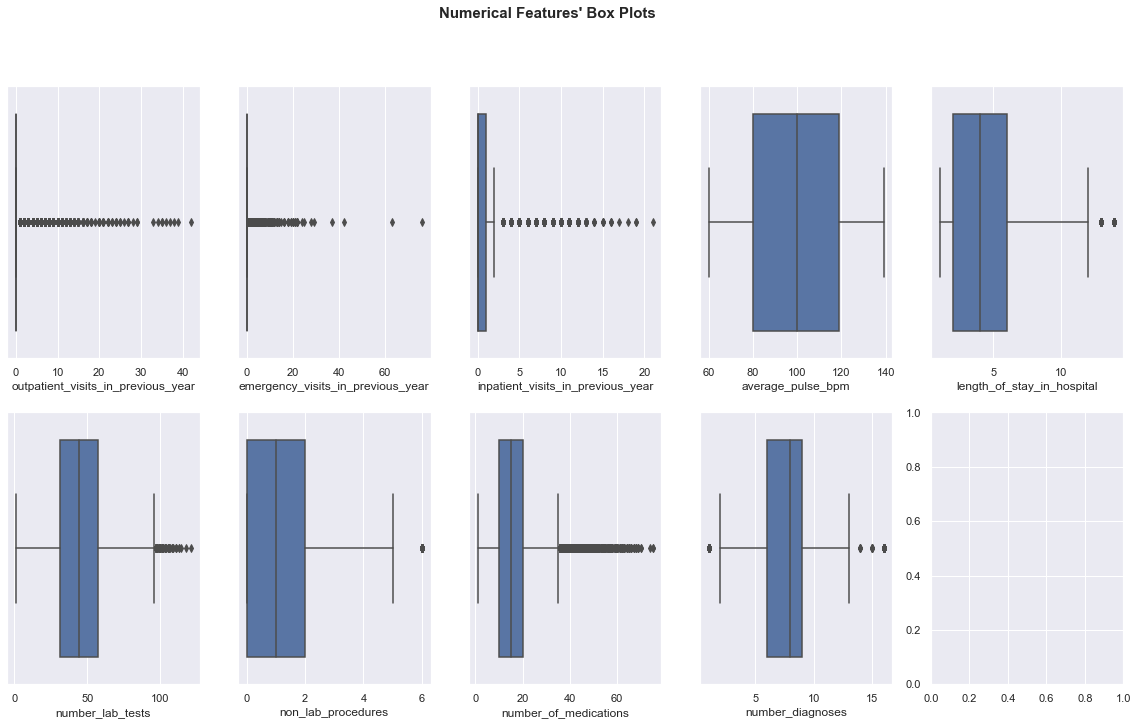

In [18]:
# Plot all variables in Boxplots to check the outliers of each variable

sns.set()

# Prepare the figures
fig, axes = plt.subplots(2, ceil(len(numerical_features) / 2), figsize=(20, 11))

# Plot data
for ax, feat in zip(axes.flatten(), numerical_features): 
    sns.boxplot(x=train[feat], ax=ax)
    
# Layout

title = "Numerical Features' Box Plots"

plt.suptitle(title, size=15, weight='bold', family='Arial')

# Save the figure
if not os.path.exists(os.path.join('..', 'figures', 'exp_analysis')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'exp_analysis'))
    
plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'numerical_features_boxplots.png'), dpi=200)

plt.show()

In [19]:

# The variables have true possible outcomes and so even if we have extreme values they make sense for the analysis. 
# Since we will not use techniques in the imputation of missing values that are influenced by outliers we will proceed without treating them 

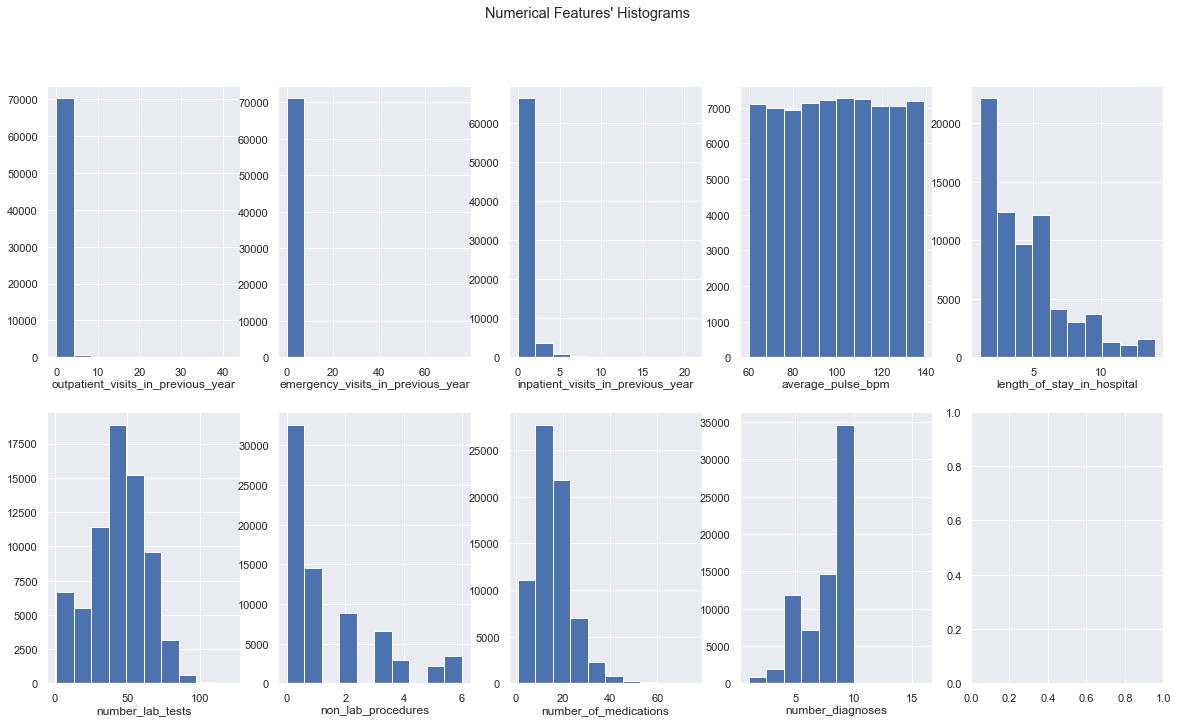

In [20]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(numerical_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), numerical_features): # Notice the zip() function and flatten() method
    ax.hist(train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout

title = "Numerical Features' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'exp_analysis')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'exp_analysis'))
    
plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'numerical_features_histograms.png'), dpi=200)

plt.show()

<AxesSubplot:xlabel='age'>

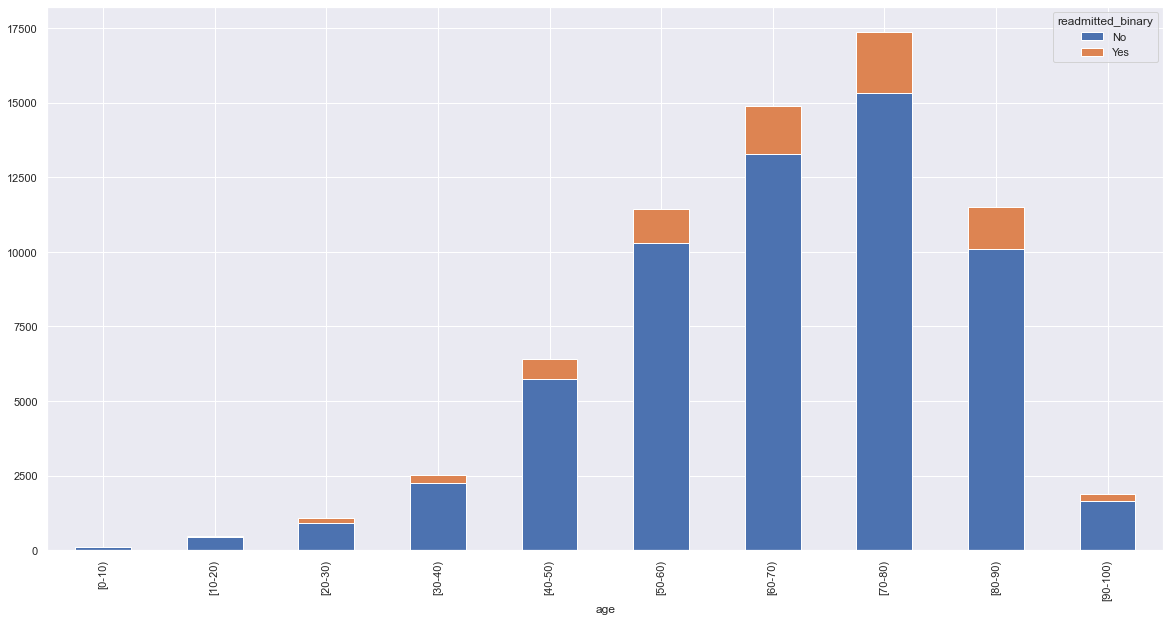

In [21]:
# check the readmissions by group of age

Sector= pd.crosstab(train['age'], train['readmitted_binary']) 

Sector.plot(kind="bar", figsize=(20,10), stacked=True)


# what can we conclude: we have more older people going to the hospital(considering the data set) 
    # and these are the ones with the higher number of readmissions (between 70 and 80 years), maybe due to the common patologies that appear at this age

<AxesSubplot:xlabel='race'>

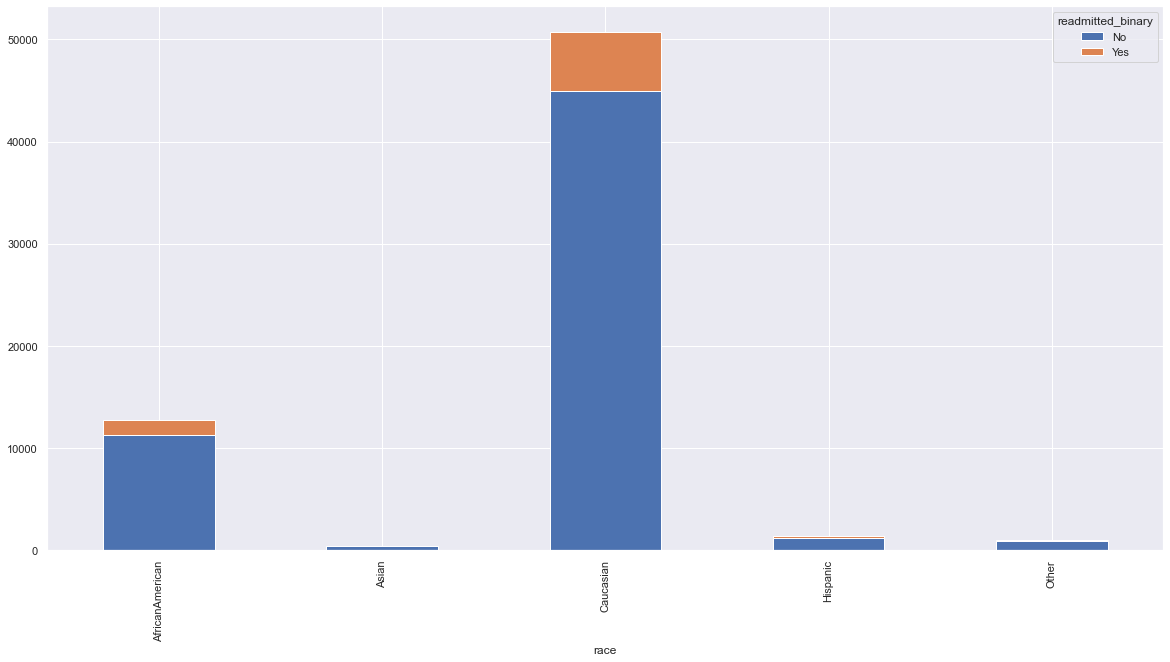

In [22]:
# check the readmissions by group of age

Sector= pd.crosstab(train['race'], train['readmitted_binary']) 

Sector.plot(kind="bar", figsize=(20,10), stacked=True)



<AxesSubplot:xlabel='readmitted_multiclass', ylabel='Count'>

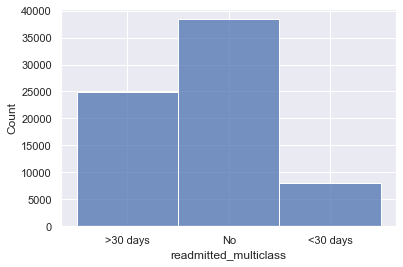

In [23]:
sns.histplot(data=train, x='readmitted_multiclass')

<AxesSubplot:xlabel='readmitted_binary', ylabel='Count'>

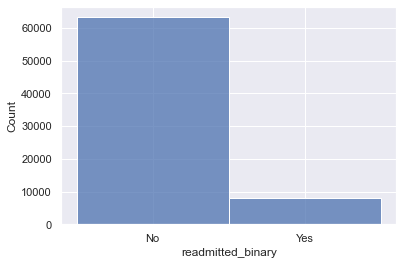

In [24]:
sns.histplot(data=train, x='readmitted_binary')#unbalaced targets

# Split Binary

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, #way of shuffeling,  equal in all terminals
                                                  stratify = y, 
                                                  shuffle = True)#proportions should be balanced

STRAT K FOLD Preserving Class Distribution:

It ensures that each fold has a similar distribution of classes as the original dataset, making it more representative.
Reducing Bias in Evaluation:

For imbalanced datasets, traditional cross-validation may lead to biased evaluations, especially if one or more folds have a drastically different class distribution.
Improved Generalization:

By maintaining the class balance in each fold, the model is evaluated in a way that is more likely to generalize well to unseen data with a similar class distribution.
Robustness to Class Imbalance:

Particularly important when dealing with problems where one class significantly outnumbers the others, as it helps prevent models from being overly biased toward the majority class.

In [25]:
train.drop(columns=['readmitted_multiclass'], inplace = True)

In [26]:
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)# random state - if you run the code multiple times, you'll get the same result.
skf

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [27]:
#split for the 1st binary case
X = train.copy()
y = target1.copy()
#stratified splitting to ensure class balance in training and validation sets.

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)#using this we obtain each class represented with approximately equal proportions in both subsets
for train_index, val_index in skf.split(X,y):
    # get the indexes of the observations assigned for each partition
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index],y.iloc[val_index]

In [28]:
X_train # mantain target for future aproaches on feature selection

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,533253,USA,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,...,515,276,466,8,NaN,NaN,No,No,NaN,No
426224,426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,...,38,785,162,9,NaN,NaN,No,Yes,['insulin'],No
634063,634063,USA,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,...,534,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No
890610,890610,USA,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,...,569,562,455,5,NaN,NaN,No,No,NaN,No
654194,654194,USA,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,...,715,599,428,9,NaN,NaN,No,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,660160,USA,24531381,AfricanAmerican,Female,[80-90),NaN,MC,0,1,...,453,786,250,9,NaN,>7,Ch,Yes,"['metformin', 'glyburide', 'insulin']",No
826429,826429,USA,4663818,AfricanAmerican,Female,[70-80),NaN,NaN,0,0,...,157,197,V66,6,NaN,>7,Ch,Yes,"['metformin', 'glyburide']",No
332030,332030,USA,23397147,Caucasian,Female,[60-70),NaN,NaN,0,2,...,428,491,276,9,>300,NaN,Ch,Yes,"['glyburide', 'insulin']",Yes


In [29]:
#X_train = X_train[X_train['discharge_disposition'] != 'Expired']

In [30]:
# For the validation set
#x_val.loc[x_val['discharge_disposition'] == 'expired', 'discharge_disposition'] = 0

# For the test set
#x_test.loc[x_test['discharge_disposition'] == 'expired', 'discharge_disposition'] = 0

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64113 entries, 533253 to 459757
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           64113 non-null  int64 
 1   country                                64113 non-null  object
 2   patient_id                             64113 non-null  int64 
 3   race                                   59546 non-null  object
 4   gender                                 64111 non-null  object
 5   age                                    60884 non-null  object
 6   weight                                 2004 non-null   object
 7   payer_code                             38749 non-null  object
 8   outpatient_visits_in_previous_year     64113 non-null  int64 
 9   emergency_visits_in_previous_year      64113 non-null  int64 
 10  inpatient_visits_in_previous_year      64113 non-null  int64 
 11  admission

In [32]:
mode_race_train = X_train['race'].mode()[0]
mode_gender_train = X_train['gender'].mode()[0]
mode_age_train = X_train['age'].mode()[0]

In [33]:
mode_race_train

'Caucasian'

In [34]:
mode_gender_train

'Female'

In [35]:
mode_age_train

'[70-80)'

# Data Preparation

In [36]:
# we can see that race, age, weight, payer_code, admission_type, medical_speciality, discharge_disposition,
    # admission_source, primary_diagnosis, seconday_diagnosis and additonal_diagnosis have missing values

# fixing the features with NA values



def impute_missing_values(df):
    # Replace missing values in 'payer_code' with 'No Insurance'
    # According to metadata: if any, has insurance; if not, no insurance
    df['payer_code'] = df['payer_code'].fillna('No Insurance')

    # Fill missing values in 'medical_specialty' and 'weight' with 'Unknown'
    df['medical_specialty'].fillna('Unknown', inplace=True)
    df['weight'].fillna('Unknown', inplace=True)

    # For 'admission_type' and 'admission_source', fill missing values with 'Not Mapped'
    df['admission_type'].fillna('Not Mapped', inplace=True)
    df['admission_source'].fillna('Not Mapped', inplace=True)

    # Fill missing values in 'discharge_disposition' with 'Not Mapped'
    # This is to classify unknown discharges as 'Not Mapped'
    df['discharge_disposition'].fillna('Not Mapped', inplace=True)

    # Fill missing test results with 'Not Tested'
    # Assumption: if no information, it should be considered as not tested
    df['glucose_test_result'].fillna('Not Tested', inplace=True)
    df['a1c_test_result'].fillna('Not Tested', inplace=True)

    # Fill missing values in 'medication' with 'No medication'
    # The assumption here is that if no medication info is provided, none was taken
    df['medication'].fillna('No medication', inplace=True)

    # For diagnosis columns, fill missing values with 'No Diagnosis'
    # Assumption: if no information is available, no diagnosis was made
    df['primary_diagnosis'].fillna('No Diagnosis', inplace=True)
    df['secondary_diagnosis'].fillna('No Diagnosis', inplace=True)
    df['additional_diagnosis'].fillna('No Diagnosis', inplace=True)

    return df

# Apply the function to both the training and validation sets
X_train = impute_missing_values(X_train)
X_val = impute_missing_values(X_val)


In [37]:
X_train.isna().sum()

encounter_id                                0
country                                     0
patient_id                                  0
race                                     4567
gender                                      2
age                                      3229
weight                                      0
payer_code                                  0
outpatient_visits_in_previous_year          0
emergency_visits_in_previous_year           0
inpatient_visits_in_previous_year           0
admission_type                              0
medical_specialty                           0
average_pulse_bpm                           0
discharge_disposition                       0
admission_source                            0
length_of_stay_in_hospital                  0
number_lab_tests                            0
non_lab_procedures                          0
number_of_medications                       0
primary_diagnosis                           0
secondary_diagnosis               

In [38]:
X_val.isna().sum()

encounter_id                               0
country                                    0
patient_id                                 0
race                                     503
gender                                     1
age                                      328
weight                                     0
payer_code                                 0
outpatient_visits_in_previous_year         0
emergency_visits_in_previous_year          0
inpatient_visits_in_previous_year          0
admission_type                             0
medical_specialty                          0
average_pulse_bpm                          0
discharge_disposition                      0
admission_source                           0
length_of_stay_in_hospital                 0
number_lab_tests                           0
non_lab_procedures                         0
number_of_medications                      0
primary_diagnosis                          0
secondary_diagnosis                        0
additional

In [39]:
# by doing some research we understand that to obtain more insights regarding the diagnosis, we should transform all the codes into the description of the corresponding diagnosis

In [40]:
code_ranges = {
    '001-139': 'Infectious and Parasitic Diseases',
    '140-239': 'Neoplasms',
    '240-279': 'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders',
    '280-289': 'Diseases of the Blood and Blood-Forming Organs',
    '290-319': 'Mental Disorders',
    '320-389': 'Diseases of the Nervous System and Sense Organs',
    '390-459': 'Diseases of the Circulatory System',
    '460-519': 'Diseases of the Respiratory System',
    '520-579': 'Diseases of the Digestive System',
    '580-629': 'Diseases of the Genitourinary System',
    '630-679': 'Complications of Pregnancy, Childbirth, and the Puerperium',
    '680-709': 'Diseases of the Skin and Subcutaneous Tissue',
    '710-739': 'Diseases of the Musculoskeletal System and Connective Tissue',
    '740-759': 'Congenital Anomalies',
    '760-779': 'Certain Conditions Originating in the Perinatal Period',
    '780-799': 'Symptoms, Signs, and Ill-Defined Conditions',
    '800-999': 'Injury and Poisoning',
    'E and V codes': 'External Causes of Injury and Supplemental Classification'
}

In [41]:
# Function to map ICD-9 codes to categories
def map_to_category(code):
    # Return 'No diagnosis' if code is missing
    if pd.isna(code):
        return 'No diagnosis'

    # Special handling for 'E' and 'V' codes
    if 'E' in code or 'V' in code:
        return code_ranges.get('E and V codes', 'Other')  # Use get() to handle missing key

    try:
        # Convert code to integer for range comparison
        code_int = int(code)
    except ValueError:
        # Handle non-numeric values as 'Other'
        return 'Other'

    # Loop through the code ranges to find the matching category
    for code_range, category in code_ranges.items():
        start, end = map(int, code_range.split('-'))
        if start <= code_int <= end:
            return category

    # Default to 'Other' if code does not match any range
    return 'Other'

# Apply the mapping to each diagnosis category in the training set
X_train['primary_diagnosis_category'] = X_train['primary_diagnosis'].apply(map_to_category)
X_train['secondary_diagnosis_category'] = X_train['secondary_diagnosis'].apply(map_to_category)
X_train['additional_diagnosis_category'] = X_train['additional_diagnosis'].apply(map_to_category)

# Apply the same mapping to each diagnosis category in the validation set
X_val['primary_diagnosis_category'] = X_val['primary_diagnosis'].apply(map_to_category)
X_val['secondary_diagnosis_category'] = X_val['secondary_diagnosis'].apply(map_to_category)
X_val['additional_diagnosis_category'] = X_val['additional_diagnosis'].apply(map_to_category)


In [42]:
X_train['admission_type'].value_counts()

Emergency        33968
Elective         11884
Urgent           11701
Not Mapped        3526
Not Available     3017
Trauma Center       11
Newborn              6
Name: admission_type, dtype: int64

In [43]:
X_val['admission_type'].value_counts()

Emergency        3774
Elective         1327
Urgent           1323
Not Mapped        394
Not Available     303
Trauma Center       2
Name: admission_type, dtype: int64

In [44]:
X_train['admission_type'] = X_train['admission_type'].replace('Not Available', 'Not Mapped')# doing these alteration we merge all the values not meet inside the variable in one single category
X_val['admission_type'] = X_val['admission_type'].replace('Not Available', 'Not Mapped')# doing these alteration we merge all the values not meet inside the variable in one single category

In [45]:
X_train['admission_source'] = X_train['admission_source'].replace('Not Available', 'Not Mapped')
X_val['admission_source'] = X_val['admission_source'].replace('Not Available', 'Not Mapped')

In [46]:
X_train['admission_type'].value_counts()

Emergency        33968
Elective         11884
Urgent           11701
Not Mapped        6543
Trauma Center       11
Newborn              6
Name: admission_type, dtype: int64

In [47]:
X_val['admission_type'].value_counts()

Emergency        3774
Elective         1327
Urgent           1323
Not Mapped        697
Trauma Center       2
Name: admission_type, dtype: int64

In [48]:
X_train['medical_specialty'].value_counts()

Unknown                         31458
InternalMedicine                 9214
Emergency/Trauma                 4788
Family/GeneralPractice           4681
Cardiology                       3357
                                ...  
Speech                              1
Pediatrics-EmergencyMedicine        1
SportsMedicine                      1
Proctology                          1
Neurophysiology                     1
Name: medical_specialty, Length: 68, dtype: int64

In [49]:
X_train['admission_source'].value_counts()

 Emergency Room                                               36288
 Physician Referral                                           18601
Not Mapped                                                     4254
Transfer from a hospital                                       1998
 Transfer from another health care facility                    1391
Clinic Referral                                                 706
 Transfer from a Skilled Nursing Facility (SNF)                 548
HMO Referral                                                    116
 Not Mapped                                                      98
 Not Available                                                   83
 Court/Law Enforcement                                           11
 Transfer from hospital inpt/same fac reslt in a sep claim        8
 Transfer from critial access hospital                            7
 Transfer from Ambulatory Surgery Center                          2
Normal Delivery                                 

In [50]:
X_train['payer_code'].value_counts()

No Insurance    25364
MC              20418
HM               3889
SP               3188
BC               2979
MD               2252
CP               1575
UN               1552
CM               1208
OG                655
PO                363
DM                345
WC                 93
CH                 92
OT                 51
MP                 49
SI                 40
Name: payer_code, dtype: int64

### Aggregate Categorical variables

In [51]:
# Payer_code 
# Considering metadata: payer_code Code of the health insurance provider (if there is one), we made this:
# Custom function to replace values:
def set_insurance(value):
    if value != 'No Insurance':
        return 'Insurance'
    else:
        return value

# Apply the custom function to 'payer_code' column
X_train['payer_code'] = X_train['payer_code'].apply(set_insurance)
X_val['payer_code'] = X_val['payer_code'].apply(set_insurance)
#what matters, know the type of insurance of each people

In [52]:
X_train['payer_code'].value_counts()

Insurance       38749
No Insurance    25364
Name: payer_code, dtype: int64

In [53]:
X_val['payer_code'].value_counts()

Insurance       4286
No Insurance    2837
Name: payer_code, dtype: int64

In [54]:
# age center
category_mapping = {
    '[0-10)': 'child',
    '[10-20)': 'child',
    '[20-30)': 'Adult',
    '[30-40)': 'Adult',
    '[40-50)': 'Adult',
    '[50-60)': 'Middle Age',
    '[60-70)': 'Middle Age',
    '[70-80)': 'Old',
    '[80-90)': 'Old',
    '[90-100)': 'Old'
    
}

X_train['age'] = X_train['age'].replace(category_mapping)
X_val['age'] = X_val['age'].replace(category_mapping)

In [55]:
X_train['age'].value_counts()

Old           27651
Middle Age    23693
Adult          9017
child           523
Name: age, dtype: int64

In [56]:
X_val['age'].value_counts()

Old           3093
Middle Age    2638
Adult         1008
child           56
Name: age, dtype: int64

In [57]:
category_mapping = {
    'Caucasian': 'caucasian',# since caucasians were the ones with most relevance
    'AfricanAmerican': 'not caucasian',
    'Hispanic': 'not caucasian',
    'Asian': 'not caucasian',
    'Other': 'not caucasian'
}


X_train['race'] = X_train['race'].replace(category_mapping)
X_val['race'] = X_val['race'].replace(category_mapping)

In [58]:
X_train['race'].value_counts()

caucasian        45620
not caucasian    13926
Name: race, dtype: int64

In [59]:
X_val['race'].value_counts()

caucasian        5073
not caucasian    1547
Name: race, dtype: int64

In [60]:
# at this point for the other variables we applied the aggregation with a threshold in order to be aware if the classes are well distributed and that we are not losing too much information

In [61]:
X_train['discharge_disposition'].value_counts()

Discharged to home                                                                                           37974
Discharged/transferred to SNF                                                                                 8799
Discharged/transferred to home with home health service                                                       8163
Not Mapped                                                                                                    2947
Discharged/transferred to another short term hospital                                                         1354
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1240
Expired                                                                                                       1016
Discharged/transferred to another type of inpatient care institution                                           736
Discharged/transferred to ICF                                                   

In [62]:
# Step 1: Replace categories in the training set
X_train['discharge_disposition'] = X_train['discharge_disposition'].replace({
    'Discharged to home': 'Home Discharge',
    'Discharged/transferred to home with home health service': 'Home Discharge',
    'Discharged/transferred to home under care of Home IV provider': 'Home Discharge',
    'Still patient or expected to return for outpatient services': 'Home Discharge',
    'Discharged/transferred to SNF': 'Skilled Nursing Facility (SNF)',
    'Discharged/transferred to another short term hospital': 'Other Medical Facilities',
    'Discharged/transferred to another rehab facility including rehab units of a hospital': 'Other Medical Facilities',
    'Discharged/transferred to another type of inpatient care institution': 'Other Medical Facilities',
    'Discharged/transferred to ICF': 'Other Medical Facilities',
    'Discharged/transferred to a long-term care hospital.': 'Other Medical Facilities',
    'Discharged/transferred to a federal health care facility.': 'Other Medical Facilities',
    'Hospice / medical facility': 'Hospice Care',
    'Hospice / home': 'Hospice Care',
    'Expired in a medical facility. Medicaid only, hospice.': 'Hospice Care'
})

# Step 2: Determine categories above the threshold in the training set
category_counts = X_train['discharge_disposition'].value_counts()
categories_above_threshold_discharge = category_counts[category_counts >= 500].index.tolist()

# Step 3: Filter categories in the training set
X_train['discharge_disposition'] = X_train['discharge_disposition'].apply(
    lambda x: x if x in categories_above_threshold_discharge else 'Other'
)

# Step 4: Repeat replacements in the validation set
X_val['discharge_disposition'] = X_val['discharge_disposition'].replace({
    'Discharged to home': 'Home Discharge',
    'Discharged/transferred to home with home health service': 'Home Discharge',
    'Discharged/transferred to home under care of Home IV provider': 'Home Discharge',
    'Still patient or expected to return for outpatient services': 'Home Discharge',
    'Discharged/transferred to SNF': 'Skilled Nursing Facility (SNF)',
    'Discharged/transferred to another short term hospital': 'Other Medical Facilities',
    'Discharged/transferred to another rehab facility including rehab units of a hospital': 'Other Medical Facilities',
    'Discharged/transferred to another type of inpatient care institution': 'Other Medical Facilities',
    'Discharged/transferred to ICF': 'Other Medical Facilities',
    'Discharged/transferred to a long-term care hospital.': 'Other Medical Facilities',
    'Discharged/transferred to a federal health care facility.': 'Other Medical Facilities',
    'Hospice / medical facility': 'Hospice Care',
    'Hospice / home': 'Hospice Care',
    'Expired in a medical facility. Medicaid only, hospice.': 'Hospice Care'
})

# Step 5: Apply the same thresholding logic to the validation set
X_val['discharge_disposition'] = X_val['discharge_disposition'].apply(
    lambda x: x if x in categories_above_threshold_discharge else 'Other'
)


In [63]:
X_train['discharge_disposition'].value_counts()

Home Discharge                                                                       46213
Skilled Nursing Facility (SNF)                                                        8799
Not Mapped                                                                            2947
Other Medical Facilities                                                              2599
Other                                                                                 1299
Discharged/transferred to another rehab fac including rehab units of a hospital .     1240
Expired                                                                               1016
Name: discharge_disposition, dtype: int64

In [64]:
X_val['discharge_disposition'].value_counts()

Home Discharge                                                                       5131
Skilled Nursing Facility (SNF)                                                        981
Not Mapped                                                                            322
Other Medical Facilities                                                              285
Discharged/transferred to another rehab fac including rehab units of a hospital .     153
Other                                                                                 132
Expired                                                                               119
Name: discharge_disposition, dtype: int64

In [65]:
# Step 1: Replace categories in the training set
X_train['admission_source'] = X_train['admission_source'].replace({
    'Emergency Room': 'Emergency Room',
    'Physician Referral': 'Physician Referral',
    'Not Mapped': 'Not Mapped',
    'Transfer from a hospital': 'Transfer from another health care facility',
    'Transfer from another health care facility': 'Transfer from another health care facility',
    'Clinic Referral': 'Clinic Referral',
    'Transfer from a Skilled Nursing Facility (SNF)': 'Transfer from a Skilled Nursing Facility (SNF)',
    'HMO Referral': 'HMO Referral',
    'Not Available': 'Not Mapped',
    'Court/Law Enforcement': 'Court/Law Enforcement',
    'Transfer from hospital inpt/same fac result in a separate claim': 'Transfer from another health care facility',
    'Transfer from critical access hospital': 'Transfer from another health care facility',
    'Transfer from Ambulatory Surgery Center': 'Transfer from another health care facility',
    'Extramural Birth': 'Extramural Birth',
    'Normal Delivery': 'Normal Delivery',
    'Sick Baby': 'Sick Baby'
})

# Step 2: Determine categories above the threshold in the training set
category_counts = X_train['admission_source'].value_counts()
categories_above_threshold_admission = category_counts[category_counts >= 2000].index.tolist()

# Step 3: Filter categories in the training set
X_train['admission_source'] = X_train['admission_source'].apply(
    lambda x: x if x in categories_above_threshold_admission else 'Other'
)

# Step 4: Repeat replacements in the validation set
X_val['admission_source'] = X_val['admission_source'].replace({
    'Emergency Room': 'Emergency Room',
    'Physician Referral': 'Physician Referral',
    'Not Mapped': 'Not Mapped',
    'Transfer from a hospital': 'Transfer from another health care facility',
    'Transfer from another health care facility': 'Transfer from another health care facility',
    'Clinic Referral': 'Clinic Referral',
    'Transfer from a Skilled Nursing Facility (SNF)': 'Transfer from a Skilled Nursing Facility (SNF)',
    'HMO Referral': 'HMO Referral',
    'Not Available': 'Not Mapped',
    'Court/Law Enforcement': 'Court/Law Enforcement',
    'Transfer from hospital inpt/same fac result in a separate claim': 'Transfer from another health care facility',
    'Transfer from critical access hospital': 'Transfer from another health care facility',
    'Transfer from Ambulatory Surgery Center': 'Transfer from another health care facility',
    'Extramural Birth': 'Extramural Birth',
    'Normal Delivery': 'Normal Delivery',
    'Sick Baby': 'Sick Baby'
})

# Step 5: Apply the same thresholding logic to the validation set
X_val['admission_source'] = X_val['admission_source'].apply(
    lambda x: x if x in categories_above_threshold_admission else 'Other'
)


In [66]:
X_train['admission_source'].value_counts()

 Emergency Room        36288
 Physician Referral    18601
Other                   4970
Not Mapped              4254
Name: admission_source, dtype: int64

In [67]:
X_val['admission_source'].value_counts()

 Emergency Room        4031
 Physician Referral    2077
Other                   551
Not Mapped              464
Name: admission_source, dtype: int64

In [68]:
# Identify lines containing the word 'Insulin' and assign them to 'Insulin' category
X_train.loc[X_train['medication'].str.contains('No medication', case=False), 'medication'] = 'No medication'
X_val.loc[X_val['medication'].str.contains('No medication', case=False), 'medication'] = 'No medication'

# Identify lines containing the word 'Insulin' and assign them to 'Insulin' category
X_train.loc[X_train['medication'].str.contains('insulin', case=False), 'medication'] = 'Insulin'
X_val.loc[X_val['medication'].str.contains('insulin', case=False), 'medication'] = 'Insulin'

In [69]:
X_train['medication'].value_counts()

Insulin                                                    34324
No medication                                              14719
['metformin']                                               2807
['glipizide']                                               2456
['glyburide']                                               2174
                                                           ...  
['repaglinide', 'nateglinide']                                 1
['nateglinide', 'glimepiride', 'pioglitazone']                 1
['glyburide', 'rosiglitazone', 'acarbose']                     1
['repaglinide', 'glyburide', 'acarbose']                       1
['metformin', 'glipizide', 'glyburide', 'pioglitazone']        1
Name: medication, Length: 135, dtype: int64

In [70]:
X_val['medication'].value_counts()

Insulin                                                     3781
No medication                                               1627
['metformin']                                                345
['glipizide']                                                271
['glyburide']                                                221
                                                            ... 
['repaglinide', 'glipizide']                                   1
['nateglinide', 'glyburide']                                   1
['metformin', 'glipizide', 'glyburide', 'pioglitazone']        1
['metformin', 'glipizide', 'glyburide', 'rosiglitazone']       1
['metformin', 'repaglinide', 'acarbose']                       1
Name: medication, Length: 68, dtype: int64

In [71]:
#Lines classified as 'No Insulin', we substitute this considering the large amount of records that have insulin has medication

no_insulin_no_medication_mask_train = ~X_train['medication'].isin(['Insulin', 'No medication'])

X_train.loc[no_insulin_no_medication_mask_train, 'medication'] = 'No Insulin'

no_insulin_no_medication_mask_val = ~X_val['medication'].isin(['Insulin', 'No medication'])

X_val.loc[no_insulin_no_medication_mask_val, 'medication'] = 'No Insulin'


In [72]:
X_train['medication'].value_counts()

Insulin          34324
No Insulin       15070
No medication    14719
Name: medication, dtype: int64

In [73]:
X_val['medication'].value_counts()

Insulin          3781
No Insulin       1715
No medication    1627
Name: medication, dtype: int64

In [74]:
X_train['primary_diagnosis_category'].value_counts()

Diseases of the Circulatory System                                       19097
Diseases of the Respiratory System                                        6539
Diseases of the Digestive System                                          5839
Other                                                                     5384
Symptoms, Signs, and Ill-Defined Conditions                               4797
Injury and Poisoning                                                      4379
Diseases of the Genitourinary System                                      3211
Diseases of the Musculoskeletal System and Connective Tissue              3129
Neoplasms                                                                 2172
Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders     1816
Infectious and Parasitic Diseases                                         1768
Diseases of the Skin and Subcutaneous Tissue                              1605
Mental Disorders                                    

In [75]:
category_mapping = {
    'Diseases of the Circulatory System': 'Circulatory',
    'Diseases of the Respiratory System': 'Respiratory',
    'Diseases of the Digestive System': 'Digestive',
    'Symptoms, Signs, and Ill-Defined Conditions': 'Symptoms/Ill-Defined',
    'Injury and Poisoning': 'Injury/Poisoning',
    'Diseases of the Genitourinary System': 'Genitourinary',
    'Diseases of the Musculoskeletal System and Connective Tissue': 'Musculoskeletal/Connective Tissue',
    'Neoplasms': 'Neoplasms',
    'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders': 'Endocrine/Nutritional/Immunity',
    'Infectious and Parasitic Diseases': 'Infectious/Parasitic',
    'Diseases of the Skin and Subcutaneous Tissue': 'Skin/Subcutaneous Tissue',
    'Mental Disorders': 'Mental Disorders',
    'External Causes of Injury and Supplemental Classification': 'External Causes of Injury',
    'Diseases of the Nervous System and Sense Organs': 'Nervous System/Sense Organs',
    'Diseases of the Blood and Blood-Forming Organs': 'Blood/Blood-Forming Organs',
    'Complications of Pregnancy, Childbirth, and the Puerperium': 'Pregnancy/Childbirth Complications',
    'Congenital Anomalies': 'Congenital Anomalies',
    'Other': 'Other'
}

In [76]:
# Step 1: Apply category mapping in the training set
X_train['primary_diagnosis_category'] = X_train['primary_diagnosis_category'].map(category_mapping)

# Step 2: Determine categories above the threshold in the training set
category_counts = X_train['primary_diagnosis_category'].value_counts()
categories_above_threshold_primary = category_counts[category_counts >= 800].index.tolist()

# Step 3: Filter categories in the training set
X_train['primary_diagnosis_category'] = X_train['primary_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_primary else 'Other'
)

# Step 4: Apply the same category mapping in the validation set
X_val['primary_diagnosis_category'] = X_val['primary_diagnosis_category'].map(category_mapping)

# Step 5: Apply the same thresholding logic to the validation set
X_val['primary_diagnosis_category'] = X_val['primary_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_primary else 'Other'
)


In [77]:
X_train['primary_diagnosis_category'].value_counts()

Circulatory                          19097
Other                                 7302
Respiratory                           6539
Digestive                             5839
Symptoms/Ill-Defined                  4797
Injury/Poisoning                      4379
Genitourinary                         3211
Musculoskeletal/Connective Tissue     3129
Neoplasms                             2172
Endocrine/Nutritional/Immunity        1816
Infectious/Parasitic                  1768
Skin/Subcutaneous Tissue              1605
Mental Disorders                      1416
External Causes of Injury             1043
Name: primary_diagnosis_category, dtype: int64

In [78]:
X_val['primary_diagnosis_category'].value_counts()

Circulatory                          2126
Other                                 789
Respiratory                           752
Digestive                             637
Symptoms/Ill-Defined                  580
Injury/Poisoning                      502
Genitourinary                         348
Musculoskeletal/Connective Tissue     314
Neoplasms                             252
Endocrine/Nutritional/Immunity        213
Infectious/Parasitic                  200
Mental Disorders                      159
Skin/Subcutaneous Tissue              139
External Causes of Injury             112
Name: primary_diagnosis_category, dtype: int64

In [79]:
X_train['secondary_diagnosis_category'].value_counts()

Diseases of the Circulatory System                                       19798
Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders     8997
Diseases of the Respiratory System                                        6484
Diseases of the Genitourinary System                                      5013
Other                                                                     4462
Symptoms, Signs, and Ill-Defined Conditions                               2894
Diseases of the Digestive System                                          2458
Diseases of the Skin and Subcutaneous Tissue                              2297
Diseases of the Blood and Blood-Forming Organs                            1859
Mental Disorders                                                          1651
External Causes of Injury and Supplemental Classification                 1606
Neoplasms                                                                 1571
Injury and Poisoning                                

In [80]:
category_mapping_secondary = {
    'Diseases of the Circulatory System': 'Circulatory',
    'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders': 'Endocrine/Nutritional/Immunity',
    'Diseases of the Respiratory System': 'Respiratory',
    'Diseases of the Genitourinary System': 'Genitourinary',
    'Other': 'Other',
    'Symptoms, Signs, and Ill-Defined Conditions': 'Symptoms/Ill-Defined',
    'Diseases of the Digestive System': 'Digestive',
    'Diseases of the Skin and Subcutaneous Tissue': 'Skin/Subcutaneous Tissue',
    'Diseases of the Blood and Blood-Forming Organs': 'Blood/Blood-Forming Organs',
    'Mental Disorders': 'Mental Disorders',
    'External Causes of Injury and Supplemental Classification': 'External Causes of Injury',
    'Neoplasms': 'Neoplasms',
    'Injury and Poisoning': 'Injury/Poisoning',
    'Infectious and Parasitic Diseases': 'Infectious/Parasitic',
    'Diseases of the Musculoskeletal System and Connective Tissue': 'Musculoskeletal/Connective Tissue',
    'Diseases of the Nervous System and Sense Organs': 'Nervous System/Sense Organs',
    'Complications of Pregnancy, Childbirth, and the Puerperium': 'Pregnancy/Childbirth/Puerperium',
    'Congenital Anomalies': 'Congenital Anomalies'
}

In [81]:
# Step 1: Apply category mapping in the training set
X_train['secondary_diagnosis_category'] = X_train['secondary_diagnosis_category'].map(category_mapping_secondary)

# Step 2: Determine categories above the threshold in the training set
category_counts = X_train['secondary_diagnosis_category'].value_counts()
categories_above_threshold_secondary = category_counts[category_counts >= 800].index.tolist()

# Step 3: Filter categories in the training set
X_train['secondary_diagnosis_category'] = X_train['secondary_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_secondary else 'Other'
)

# Step 4: Apply the same category mapping in the validation set
X_val['secondary_diagnosis_category'] = X_val['secondary_diagnosis_category'].map(category_mapping_secondary)

# Step 5: Apply the same thresholding logic to the validation set
X_val['secondary_diagnosis_category'] = X_val['secondary_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_secondary else 'Other'
)


In [82]:
X_train['secondary_diagnosis_category'].value_counts()

Circulatory                          19798
Endocrine/Nutritional/Immunity        8997
Respiratory                           6484
Genitourinary                         5013
Other                                 4798
Symptoms/Ill-Defined                  2894
Digestive                             2458
Skin/Subcutaneous Tissue              2297
Blood/Blood-Forming Organs            1859
Mental Disorders                      1651
External Causes of Injury             1606
Neoplasms                             1571
Injury/Poisoning                      1545
Infectious/Parasitic                  1234
Musculoskeletal/Connective Tissue     1103
Nervous System/Sense Organs            805
Name: secondary_diagnosis_category, dtype: int64

In [83]:
X_val['secondary_diagnosis_category'].value_counts()

Circulatory                          2201
Endocrine/Nutritional/Immunity       1006
Respiratory                           708
Genitourinary                         595
Other                                 512
Symptoms/Ill-Defined                  300
Digestive                             289
Skin/Subcutaneous Tissue              238
Blood/Blood-Forming Organs            215
Neoplasms                             194
Mental Disorders                      187
Injury/Poisoning                      178
External Causes of Injury             174
Musculoskeletal/Connective Tissue     125
Infectious/Parasitic                  124
Nervous System/Sense Organs            77
Name: secondary_diagnosis_category, dtype: int64

In [84]:
X_train['additional_diagnosis_category'].value_counts()

Diseases of the Circulatory System                                       18825
Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders    12993
Other                                                                     4389
Diseases of the Respiratory System                                        4295
Diseases of the Genitourinary System                                      4018
External Causes of Injury and Supplemental Classification                 3190
Symptoms, Signs, and Ill-Defined Conditions                               2824
Diseases of the Digestive System                                          2250
Mental Disorders                                                          2011
Diseases of the Skin and Subcutaneous Tissue                              1575
Diseases of the Blood and Blood-Forming Organs                            1564
Injury and Poisoning                                                      1246
Diseases of the Musculoskeletal System and Connectiv

In [85]:
category_mapping_additional = {
    'Diseases of the Circulatory System': 'Circulatory',
    'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders': 'Endocrine/Nutritional/Immunity',
    'Other': 'Other',
    'Diseases of the Respiratory System': 'Respiratory',
    'Diseases of the Genitourinary System': 'Genitourinary',
    'External Causes of Injury and Supplemental Classification': 'External Causes of Injury',
    'Symptoms, Signs, and Ill-Defined Conditions': 'Symptoms/Ill-Defined',
    'Diseases of the Digestive System': 'Digestive',
    'Mental Disorders': 'Mental Disorders',
    'Diseases of the Skin and Subcutaneous Tissue': 'Skin/Subcutaneous Tissue',
    'Diseases of the Blood and Blood-Forming Organs': 'Blood/Blood-Forming Organs',
    'Injury and Poisoning': 'Injury/Poisoning',
    'Diseases of the Musculoskeletal System and Connective Tissue': 'Musculoskeletal/Connective Tissue',
    'Infectious and Parasitic Diseases': 'Infectious/Parasitic',
    'Neoplasms': 'Neoplasms',
    'Diseases of the Nervous System and Sense Organs': 'Nervous System/Sense Organs',
    'Complications of Pregnancy, Childbirth, and the Puerperium': 'Pregnancy/Childbirth/Puerperium',
    'Congenital Anomalies': 'Congenital Anomalies'
}

In [86]:
# Step 1: Apply category mapping in the training set
X_train['additional_diagnosis_category'] = X_train['additional_diagnosis_category'].map(category_mapping_additional)

# Step 2: Determine categories above the threshold in the training set
category_counts = X_train['additional_diagnosis_category'].value_counts()
categories_above_threshold_additional = category_counts[category_counts >= 800].index.tolist()

# Step 3: Filter categories in the training set
X_train['additional_diagnosis_category'] = X_train['additional_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_additional else 'Other'
)

# Step 4: Apply the same category mapping in the validation set
X_val['additional_diagnosis_category'] = X_val['additional_diagnosis_category'].map(category_mapping_additional)

# Step 5: Apply the same thresholding logic to the validation set
X_val['additional_diagnosis_category'] = X_val['additional_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_additional else 'Other'
)


In [87]:
X_train['additional_diagnosis_category'].value_counts()

Circulatory                          18825
Endocrine/Nutritional/Immunity       12993
Other                                 4645
Respiratory                           4295
Genitourinary                         4018
External Causes of Injury             3190
Symptoms/Ill-Defined                  2824
Digestive                             2250
Mental Disorders                      2011
Skin/Subcutaneous Tissue              1575
Blood/Blood-Forming Organs            1564
Injury/Poisoning                      1246
Musculoskeletal/Connective Tissue     1211
Infectious/Parasitic                  1173
Neoplasms                             1170
Nervous System/Sense Organs           1123
Name: additional_diagnosis_category, dtype: int64

In [88]:
X_val['additional_diagnosis_category'].value_counts()

Circulatory                          2134
Endocrine/Nutritional/Immunity       1445
Other                                 511
Genitourinary                         451
Respiratory                           434
External Causes of Injury             352
Symptoms/Ill-Defined                  308
Digestive                             264
Mental Disorders                      210
Blood/Blood-Forming Organs            186
Skin/Subcutaneous Tissue              177
Infectious/Parasitic                  149
Injury/Poisoning                      137
Neoplasms                             127
Nervous System/Sense Organs           122
Musculoskeletal/Connective Tissue     116
Name: additional_diagnosis_category, dtype: int64

In [89]:
medical_specialty_mapping = {
    'Surgery-General': 'Surgery',
    'Surgery-Thoracic': 'Surgery',
    'Surgery-Vascular': 'Surgery',
    'Orthopedics-Reconstructive': 'Surgery',
    'Surgery-Neuro': 'Surgery',
    'Surgery-Cardiovascular/Thoracic': 'Surgery',
    'Surgery-Maxillofacial': 'Surgery',
    'Surgery-Cardiovascular': 'Surgery',
    'Surgery-Plastic': 'Surgery',
    'Surgery-Colon&Rectal': 'Surgery',
    'Surgery-Pediatric': 'Surgery',

    'Pediatrics': 'Pediatrics',
    'Pediatrics-Endocrinology': 'Pediatrics',
    'Pediatrics-CriticalCare': 'Pediatrics',
    'Pediatrics-Neurology': 'Pediatrics',
    'Pediatrics-Pulmonology': 'Pediatrics',
    'Pediatrics-EmergencyMedicine': 'Pediatrics',
    'Pediatrics-AllergyandImmunology': 'Pediatrics',
    'Pediatrics-Hematology-Oncology': 'Pediatrics',
    'Pediatrics-InfectiousDiseases': 'Pediatrics',
    'Pediatrics-Pediatric': 'Pediatrics',

    'InternalMedicine': 'Internal Medicine',
    'Hospitalist': 'Internal Medicine',

    'ObstetricsandGynecology': 'Obstetrics/Gynecology',
    'Gynecology': 'Obstetrics/Gynecology',
    'Obstetrics': 'Obstetrics/Gynecology',
    'Obsterics&Gynecology-GynecologicOnco': 'Obstetrics/Gynecology',

    'Cardiology': 'Cardiology',
    'Cardiology-Pediatric': 'Cardiology',

    'Radiologist': 'Radiology',
    'Radiology': 'Radiology',

    'Psychiatry': 'Psychiatry/Psychology',
    'Psychology': 'Psychiatry/Psychology',
    'Psychiatry-Child/Adolescent': 'Psychiatry/Psychology',

    '?': 'Unknown'
    
}

# Apply the mapping to the 'medical_specialty' column in the training set
X_train['medical_specialty'] = X_train['medical_specialty'].replace(medical_specialty_mapping)

# Apply the same mapping to the 'medical_specialty' column in the validation set
X_val['medical_specialty'] = X_val['medical_specialty'].replace(medical_specialty_mapping)

In [90]:
# Step 1: Calculate category counts in the training set
category_counts = X_train['medical_specialty'].value_counts()

# Step 2: Determine categories above the threshold in the training set
categories_above_threshold_medical = category_counts[category_counts >= 500].index.tolist()

# Step 3: Apply the threshold filter to the training set
X_train['medical_specialty'] = X_train['medical_specialty'].apply(
    lambda x: x if x in categories_above_threshold_medical else 'Other'
)

# Step 4: Apply the same threshold filter to the validation set
X_val['medical_specialty'] = X_val['medical_specialty'].apply(
    lambda x: x if x in categories_above_threshold_medical else 'Other'
)

In [91]:
X_train['medical_specialty'].value_counts()

Unknown                   31458
Internal Medicine          9249
Emergency/Trauma           4788
Family/GeneralPractice     4681
Surgery                    3915
Cardiology                 3362
Other                      2832
Nephrology                 1025
Orthopedics                 872
Radiology                   770
Psychiatry/Psychology       599
Pulmonology                 562
Name: medical_specialty, dtype: int64

In [92]:
X_val['medical_specialty'].value_counts()

Unknown                   3464
Internal Medicine         1081
Family/GeneralPractice     536
Emergency/Trauma           531
Surgery                    438
Cardiology                 359
Other                      313
Nephrology                 111
Radiology                   86
Orthopedics                 82
Psychiatry/Psychology       73
Pulmonology                 49
Name: medical_specialty, dtype: int64

### Drop Variables

In [93]:
# although weight has many missing values, we will not drop it yet because we want to see it´s behaviour in feature selection

In [94]:
# but of course in this decision we will account always the amount of missing that the variable has.

In [95]:
X_train['country'].unique() 
# drop country because it has always the same value 'constant feature'

# These features do not contain any useful information for predictive modeling because they 
    # do not vary across the data points.
    
# They can be safely removed from the dataset as they do not contribute to the model's ability 
    # to discriminate between different observations.

array(['USA'], dtype=object)

In [96]:
# drop columns with non relevant information (country)
X_train.drop(columns = ['country'], inplace=True)
X_val.drop(columns = ['country'], inplace=True)

In [97]:
X_train.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis'], axis=1, inplace=True)# due to the new columns created
X_val.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis'], axis=1, inplace=True)# due to the new columns created

In [98]:
X_train.isna().sum()

encounter_id                                0
patient_id                                  0
race                                     4567
gender                                      2
age                                      3229
weight                                      0
payer_code                                  0
outpatient_visits_in_previous_year          0
emergency_visits_in_previous_year           0
inpatient_visits_in_previous_year           0
admission_type                              0
medical_specialty                           0
average_pulse_bpm                           0
discharge_disposition                       0
admission_source                            0
length_of_stay_in_hospital                  0
number_lab_tests                            0
non_lab_procedures                          0
number_of_medications                       0
number_diagnoses                            0
glucose_test_result                         0
a1c_test_result                   

In [99]:
X_val.isna().sum()

encounter_id                               0
patient_id                                 0
race                                     503
gender                                     1
age                                      328
weight                                     0
payer_code                                 0
outpatient_visits_in_previous_year         0
emergency_visits_in_previous_year          0
inpatient_visits_in_previous_year          0
admission_type                             0
medical_specialty                          0
average_pulse_bpm                          0
discharge_disposition                      0
admission_source                           0
length_of_stay_in_hospital                 0
number_lab_tests                           0
non_lab_procedures                         0
number_of_medications                      0
number_diagnoses                           0
glucose_test_result                        0
a1c_test_result                            0
change_in_

# Create New Features

In [100]:
#nothing related with age gender or race

# Category of BPM considering its values
X_train['pulse_category'] = pd.cut(X_train['average_pulse_bpm'], bins=[0, 60, 100, float('inf')], labels=['Low', 'Normal', 'High'])
X_val['pulse_category'] = pd.cut(X_val['average_pulse_bpm'], bins=[0, 60, 100, float('inf')], labels=['Low', 'Normal', 'High'])

# Multiple or not
X_train['multiple_diagnoses'] = X_train['number_diagnoses'].apply(lambda x: 'Yes' if x > 1 else 'No')
X_val['multiple_diagnoses'] = X_val['number_diagnoses'].apply(lambda x: 'Yes' if x > 1 else 'No')

# Define the bins and labels for the new categories related with diagnosis number
bins = [0, 5, 8, float('inf')]
labels = ['Low Number', 'Medium Number', 'High Number']

# Create a new column 'diagnosis_category' based on the modified criteria
X_train['diagnosis_category'] = pd.cut(X_train['number_diagnoses'], bins=bins, labels=labels, right=False)
X_val['diagnosis_category'] = pd.cut(X_val['number_diagnoses'], bins=bins, labels=labels, right=False)

# Medication complexity, considering categories related with number of medications
X_train['medication_complexity'] = pd.cut(X_train['number_of_medications'], bins=[0, 5, 15, 40, float('inf')], labels=['Low', 'Medium', 'High','Very high'])
X_val['medication_complexity'] = pd.cut(X_val['number_of_medications'], bins=[0, 5, 15, 40, float('inf')], labels=['Low', 'Medium', 'High','Very high'])

# Lab Tests and Procedures
X_train['lab_test_intensity'] = pd.cut(X_train['number_lab_tests'], bins=[0, 20, 40, float('inf')], labels=['Low', 'Medium', 'High'])
X_val['lab_test_intensity'] = pd.cut(X_val['number_lab_tests'], bins=[0, 20, 40, float('inf')], labels=['Low', 'Medium', 'High'])

# Define'length_of_stay_in_hospital'
bins = [0, 3, 7, float('inf')]  
labels = ['Short Stay', 'Medium Stay', 'Long Stay']
X_train['length_of_stay_category'] = pd.cut(X_train['length_of_stay_in_hospital'], bins=bins, labels=labels)
X_val['length_of_stay_category'] = pd.cut(X_val['length_of_stay_in_hospital'], bins=bins, labels=labels)

# Define binary variable for emergency visits
X_train['emergency_visit'] = X_train['emergency_visits_in_previous_year'].apply(lambda x: 'Yes' if x > 0 else 'No')
X_val['emergency_visit'] = X_val['emergency_visits_in_previous_year'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Create a new column 'total_visits' by summing the values of the three columns
X_train['total_visits'] = X_train['outpatient_visits_in_previous_year'] + X_train['emergency_visits_in_previous_year'] + X_train['inpatient_visits_in_previous_year']
X_val['total_visits'] = X_val['outpatient_visits_in_previous_year'] + X_val['emergency_visits_in_previous_year'] + X_val['inpatient_visits_in_previous_year']

# Create a new column 'encounter_patient' by counting the visits that the same patient made to the hospital (groupby count of patient_id's in the dataset)
X_train['encounter_patient'] = X_train.groupby('patient_id')['patient_id'].transform('count')
X_val['encounter_patient'] = X_val.groupby('patient_id')['patient_id'].transform('count') #a higher number may indicates that the patient needs more health care help

#add these new variables in feature selection
train.head()


,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,533253,USA,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,...,515,276,466,8,NaN,NaN,No,No,NaN,No
426224,426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,...,38,785,162,9,NaN,NaN,No,Yes,['insulin'],No
634063,634063,USA,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,...,534,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No
890610,890610,USA,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,...,569,562,455,5,NaN,NaN,No,No,NaN,No
654194,654194,USA,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,...,715,599,428,9,NaN,NaN,No,No,NaN,No


In [101]:
X_train['encounter_patient'].value_counts

<bound method IndexOpsMixin.value_counts of encounter_id
533253    6
426224    1
634063    1
890610    1
654194    2
         ..
660160    1
826429    1
332030    4
757560    2
459757    6
Name: encounter_patient, Length: 64113, dtype: int64>

In [102]:
# drop columns with non relevant information (country)
X_train.drop(columns = ['patient_id', 'encounter_id'], inplace=True)
X_val.drop(columns = ['patient_id', 'encounter_id'], inplace=True)

| Variable                    | Description                                                  |
|-----------------------------|--------------------------------------------------------------|
| pulse_category              | Categorizes average pulse rate into 'Low', 'Normal', 'High'. |
| multiple_diagnoses          | Indicates whether there are multiple diagnoses ('Yes' or 'No'). |
| diagnosis_category          | Categorizes the number of diagnoses into 'Low Number', 'Medium Number', 'High Number'. |
| medication_complexity       | Categorizes the number of medications into 'Low', 'Medium', 'High', 'Very high'. |
| lab_test_intensity          | Categorizes the number of lab tests into 'Low', 'Medium', 'High'. |
| total_visits                | Total number of visits.                                      |
| length_of_stay_category     | Categorizes the time spent in the hospital into 'Short Stay', 'Medium Stay', 'Long Stay'                                                    |
| emergency_visit             |   Binary variable that categorizes whether there are emergency visits('Yes' or 'No')| 
| encounter_patient         |  'encounter_patient' by counting the visits that the same patient made to the hospital| 

In [103]:
X_train['multiple_diagnoses'] = X_train['multiple_diagnoses'].astype('object')
X_val['multiple_diagnoses'] = X_val['multiple_diagnoses'].astype('object')

In [104]:
X_train['emergency_visit'] = X_train['emergency_visit'].astype('object')
X_val['emergency_visit'] = X_val['emergency_visit'].astype('object')

In [105]:
#check if the variables are more or less balanced

In [106]:
X_train['length_of_stay_category'].value_counts()

Short Stay     31085
Medium Stay    23448
Long Stay       9580
Name: length_of_stay_category, dtype: int64

In [107]:
X_val['length_of_stay_category'].value_counts()

Short Stay     3478
Medium Stay    2566
Long Stay      1079
Name: length_of_stay_category, dtype: int64

In [108]:
X_train['emergency_visit'].value_counts()

No     56897
Yes     7216
Name: emergency_visit, dtype: int64

In [109]:
X_val['emergency_visit'].value_counts()

No     6345
Yes     778
Name: emergency_visit, dtype: int64

In [110]:
X_train['multiple_diagnoses'].value_counts()#not so balanced

Yes    63966
No       147
Name: multiple_diagnoses, dtype: int64

In [111]:
X_val['multiple_diagnoses'].value_counts()#not so balanced

Yes    7106
No       17
Name: multiple_diagnoses, dtype: int64

In [112]:
X_train['lab_test_intensity'].value_counts()

High      37451
Medium    17519
Low        9143
Name: lab_test_intensity, dtype: int64

In [113]:
X_val['lab_test_intensity'].value_counts()

High      4195
Medium    1943
Low        985
Name: lab_test_intensity, dtype: int64

In [114]:
X_train['diagnosis_category'].value_counts()

High Number      37955
Medium Number    20061
Low Number        6097
Name: diagnosis_category, dtype: int64

In [115]:
X_val['diagnosis_category'].value_counts()

High Number      4174
Medium Number    2258
Low Number        691
Name: diagnosis_category, dtype: int64

In [116]:
X_train['medication_complexity'].value_counts()

Medium       31718
High         28378
Low           3148
Very high      869
Name: medication_complexity, dtype: int64

In [117]:
X_val['medication_complexity'].value_counts()

Medium       3522
High         3115
Low           393
Very high      93
Name: medication_complexity, dtype: int64

In [118]:
X_train['total_visits'].value_counts()

0     35065
1     12647
2      6352
3      3695
4      2262
5      1285
6       837
7       568
8       357
9       259
10      162
11      157
12       93
14       59
13       57
15       57
16       47
17       38
18       20
19       16
20       10
22        9
21        8
27        6
25        5
26        5
24        5
35        5
36        4
29        3
30        3
37        2
38        2
28        2
23        1
41        1
31        1
34        1
42        1
33        1
40        1
49        1
80        1
68        1
32        1
Name: total_visits, dtype: int64

In [119]:
X_val['total_visits'].value_counts()

0     3924
1     1384
2      720
3      414
4      228
5      133
6       83
7       61
8       40
9       35
10      24
11      14
15      12
17      11
12      11
13      10
14       5
20       3
22       2
18       2
21       2
19       2
27       1
32       1
16       1
Name: total_visits, dtype: int64

In [120]:
X_train['encounter_patient'].value_counts()

1     40428
2     12520
3      5145
4      2660
5      1260
6       798
7       364
8       280
9       162
10      140
12       96
11       88
14       56
13       39
31       31
15       30
16       16
Name: encounter_patient, dtype: int64

In [121]:
X_val['encounter_patient'].value_counts()

1    6521
2     516
3      69
4      12
5       5
Name: encounter_patient, dtype: int64

In [122]:
for column in X_train.columns:
    
    if X_train[column].dtype.name == 'category':

        X_train[column] = X_train[column].astype('object')
        X_val[column] = X_val[column].astype('object')

In [123]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64113 entries, 533253 to 459757
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   race                                   59546 non-null  object
 1   gender                                 64111 non-null  object
 2   age                                    60884 non-null  object
 3   weight                                 64113 non-null  object
 4   payer_code                             64113 non-null  object
 5   outpatient_visits_in_previous_year     64113 non-null  int64 
 6   emergency_visits_in_previous_year      64113 non-null  int64 
 7   inpatient_visits_in_previous_year      64113 non-null  int64 
 8   admission_type                         64113 non-null  object
 9   medical_specialty                      64113 non-null  object
 10  average_pulse_bpm                      64113 non-null  int64 
 11  discharge

# Fill NaNs Mode Input

In [124]:
# we only made imputation of values after the split to ensure integrity of the data

In [125]:
# after the split we decided to fill the remaining Nas with the mode because it is a measure with some advantages regarding other inputation methods, it is not influenced by the outliers presence and since we not treat them we decided that this was the better way to follow 

In [126]:
# we input the modes of the train set into the validation set, working only with training data 

In [127]:
mode_race = train['race'].mode().iloc[0]

In [128]:
mode_gender = train['gender'].mode().iloc[0]

In [129]:
mode_age = train['age'].mode().iloc[0]

In [130]:
X_train['race'].fillna(mode_race, inplace = True)
X_train['gender'].fillna(mode_gender, inplace = True)#only 3 categorical features so we fill the values with the mode 
X_train['age'].fillna(mode_age, inplace = True)

In [131]:
X_val['race'] = X_val['race'].fillna(mode_race)#fill with train modes

In [132]:
X_val['gender'] = X_val['gender'].fillna(mode_gender)

In [133]:
X_val['age'] = X_val['age'].fillna(mode_age)

In [134]:



#assumption = X_train['non_lab_procedures'] == 6

#X_train.loc[assumption, 'non_lab_procedures'] = 5 

In [135]:
#Outliers tretament, only for train cause we cant remove lines from validation
# Define the filters
filters = (
    (X_train['outpatient_visits_in_previous_year'] < 30) &  
    (X_train['emergency_visits_in_previous_year'] < 30) &
     (X_train['inpatient_visits_in_previous_year'] < 20) &  
    (X_train['number_lab_tests'] < 90) &
     (X_train['number_of_medications'] < 40) &  
    (X_train['number_diagnoses'] < 13) 

)




In [136]:
#we tested the final f1 score of the model with outliers treated however it was lower than if we not treat them so we decided to leave them in it´s original format
# Apply the filters to X_train_num
#62814/64113 # we removed a very lower % of data by treating the ourliers (about 2%)
#X_train = X_train[filters]
#y_train = y_train[filters]

In [137]:
X_train

,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,...,additional_diagnosis_category,pulse_category,multiple_diagnoses,diagnosis_category,medication_complexity,lab_test_intensity,length_of_stay_category,emergency_visit,total_visits,encounter_patient
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,caucasian,Female,Old,Unknown,No Insurance,0,0,2,Emergency,Family/GeneralPractice,...,Respiratory,High,Yes,High Number,High,High,Short Stay,No,2,6
426224,not caucasian,Male,Middle Age,Unknown,No Insurance,0,0,0,Emergency,Unknown,...,Neoplasms,High,Yes,High Number,High,High,Long Stay,No,0,1
634063,caucasian,Female,Middle Age,Unknown,No Insurance,0,0,1,Not Mapped,Family/GeneralPractice,...,Endocrine/Nutritional/Immunity,Normal,Yes,Medium Number,High,High,Medium Stay,No,1,1
890610,not caucasian,Male,Middle Age,Unknown,Insurance,0,0,1,Emergency,Internal Medicine,...,Circulatory,Normal,Yes,Medium Number,Medium,High,Medium Stay,No,1,1
654194,caucasian,Female,Old,Unknown,Insurance,1,0,0,Elective,Unknown,...,Circulatory,High,Yes,High Number,Medium,High,Medium Stay,No,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,not caucasian,Female,Old,Unknown,Insurance,0,1,0,Elective,Internal Medicine,...,Endocrine/Nutritional/Immunity,Normal,Yes,High Number,High,High,Medium Stay,Yes,1,1
826429,not caucasian,Female,Old,Unknown,No Insurance,0,0,0,Urgent,Unknown,...,External Causes of Injury,Normal,Yes,Medium Number,Medium,Low,Long Stay,No,0,1
332030,caucasian,Female,Middle Age,Unknown,No Insurance,0,2,2,Not Mapped,Unknown,...,Endocrine/Nutritional/Immunity,High,Yes,High Number,High,Medium,Medium Stay,Yes,4,4


In [138]:

X_train_num = X_train.select_dtypes(include=['int64']).set_index(X_train.index)


X_train_cat = X_train.select_dtypes(exclude=['int64']).set_index(X_train.index)


# Repeat for Validation

X_val_num = X_val.select_dtypes(include=['int64']).set_index(X_val.index)

X_val_cat = X_val.select_dtypes(exclude=['int64']).set_index(X_val.index)


In [139]:

X_train_num.columns

Index(['outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'average_pulse_bpm',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'total_visits',
       'encounter_patient'],
      dtype='object')

In [140]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64113 entries, 533253 to 459757
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   outpatient_visits_in_previous_year  64113 non-null  int64
 1   emergency_visits_in_previous_year   64113 non-null  int64
 2   inpatient_visits_in_previous_year   64113 non-null  int64
 3   average_pulse_bpm                   64113 non-null  int64
 4   length_of_stay_in_hospital          64113 non-null  int64
 5   number_lab_tests                    64113 non-null  int64
 6   non_lab_procedures                  64113 non-null  int64
 7   number_of_medications               64113 non-null  int64
 8   number_diagnoses                    64113 non-null  int64
 9   total_visits                        64113 non-null  int64
 10  encounter_patient                   64113 non-null  int64
dtypes: int64(11)
memory usage: 5.9 MB


In [141]:
X_train_cat

,race,gender,age,weight,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,glucose_test_result,...,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,pulse_category,multiple_diagnoses,diagnosis_category,medication_complexity,lab_test_intensity,length_of_stay_category,emergency_visit
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,caucasian,Female,Old,Unknown,No Insurance,Emergency,Family/GeneralPractice,Home Discharge,Emergency Room,Not Tested,...,Respiratory,Endocrine/Nutritional/Immunity,Respiratory,High,Yes,High Number,High,High,Short Stay,No
426224,not caucasian,Male,Middle Age,Unknown,No Insurance,Emergency,Unknown,Other Medical Facilities,Other,Not Tested,...,Infectious/Parasitic,Symptoms/Ill-Defined,Neoplasms,High,Yes,High Number,High,High,Long Stay,No
634063,caucasian,Female,Middle Age,Unknown,No Insurance,Not Mapped,Family/GeneralPractice,Home Discharge,Not Mapped,Not Tested,...,Digestive,Infectious/Parasitic,Endocrine/Nutritional/Immunity,Normal,Yes,Medium Number,High,High,Medium Stay,No
890610,not caucasian,Male,Middle Age,Unknown,Insurance,Emergency,Internal Medicine,Home Discharge,Other,Not Tested,...,Digestive,Digestive,Circulatory,Normal,Yes,Medium Number,Medium,High,Medium Stay,No
654194,caucasian,Female,Old,Unknown,Insurance,Elective,Unknown,Home Discharge,Physician Referral,Not Tested,...,Musculoskeletal/Connective Tissue,Genitourinary,Circulatory,High,Yes,High Number,Medium,High,Medium Stay,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,not caucasian,Female,Old,Unknown,Insurance,Elective,Internal Medicine,Home Discharge,Physician Referral,Not Tested,...,Circulatory,Symptoms/Ill-Defined,Endocrine/Nutritional/Immunity,Normal,Yes,High Number,High,High,Medium Stay,Yes
826429,not caucasian,Female,Old,Unknown,No Insurance,Urgent,Unknown,Not Mapped,Physician Referral,Not Tested,...,Neoplasms,Neoplasms,External Causes of Injury,Normal,Yes,Medium Number,Medium,Low,Long Stay,No
332030,caucasian,Female,Middle Age,Unknown,No Insurance,Not Mapped,Unknown,Not Mapped,Not Mapped,>300,...,Circulatory,Respiratory,Endocrine/Nutritional/Immunity,High,Yes,High Number,High,Medium,Medium Stay,Yes


In [142]:
X_train.isna().sum()#no missings anymore

race                                     0
gender                                   0
age                                      0
weight                                   0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_meds_during_hospitalization    0
prescribed_diabetes_meds                 0
medication                               0
readmitted_

In [143]:
X_train['race'].value_counts()

caucasian        45620
not caucasian    13926
Caucasian         4567
Name: race, dtype: int64

In [144]:
mode_race_train = X_train['race'].mode()[0]
mode_gender_train = X_train['gender'].mode()[0]
mode_age_train = X_train['age'].mode()[0]

mode_race_val = X_val['race'].mode()[0]
mode_gender_val = X_val['gender'].mode()[0]
mode_age_val = X_val['age'].mode()[0]

print(f"Mode of 'race' in x_train: {mode_race_train}")
print(f"Mode of 'gender' in x_train: {mode_gender_train}")
print(f"Mode of 'age' in x_train: {mode_age_train}")

print(f"Mode of 'race' in x_val: {mode_race_val}")
print(f"Mode of 'gender' in x_val: {mode_gender_val}")
print(f"Mode of 'age' in x_val: {mode_age_val}")
#we dont have data leakage

Mode of 'race' in x_train: caucasian
Mode of 'gender' in x_train: Female
Mode of 'age' in x_train: Old
Mode of 'race' in x_val: caucasian
Mode of 'gender' in x_val: Female
Mode of 'age' in x_val: Old


In [145]:
#next to this we computed feature selection for categorical data before any encoding step

# Feature Selection Categorical Data Binary

In [146]:
X_train_cat.head()

,race,gender,age,weight,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,glucose_test_result,...,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,pulse_category,multiple_diagnoses,diagnosis_category,medication_complexity,lab_test_intensity,length_of_stay_category,emergency_visit
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,caucasian,Female,Old,Unknown,No Insurance,Emergency,Family/GeneralPractice,Home Discharge,Emergency Room,Not Tested,...,Respiratory,Endocrine/Nutritional/Immunity,Respiratory,High,Yes,High Number,High,High,Short Stay,No
426224,not caucasian,Male,Middle Age,Unknown,No Insurance,Emergency,Unknown,Other Medical Facilities,Other,Not Tested,...,Infectious/Parasitic,Symptoms/Ill-Defined,Neoplasms,High,Yes,High Number,High,High,Long Stay,No
634063,caucasian,Female,Middle Age,Unknown,No Insurance,Not Mapped,Family/GeneralPractice,Home Discharge,Not Mapped,Not Tested,...,Digestive,Infectious/Parasitic,Endocrine/Nutritional/Immunity,Normal,Yes,Medium Number,High,High,Medium Stay,No
890610,not caucasian,Male,Middle Age,Unknown,Insurance,Emergency,Internal Medicine,Home Discharge,Other,Not Tested,...,Digestive,Digestive,Circulatory,Normal,Yes,Medium Number,Medium,High,Medium Stay,No
654194,caucasian,Female,Old,Unknown,Insurance,Elective,Unknown,Home Discharge,Physician Referral,Not Tested,...,Musculoskeletal/Connective Tissue,Genitourinary,Circulatory,High,Yes,High Number,Medium,High,Medium Stay,No


In [147]:
def TestIndependence(X, y, var, alpha=0.05):
    dfObserved = pd.crosstab(y, X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved)
    if p < alpha:
        result = f"{var} is IMPORTANT for Prediction"
    else:
        result = f"{var} is NOT an important predictor. (Discard {var} from model)"
    print(result)

# Loop through each categorical variable in the dataframe
for var in X_train_cat.columns:
    TestIndependence(X_train_cat[var], y, var, alpha=0.5)

race is IMPORTANT for Prediction
gender is IMPORTANT for Prediction
age is IMPORTANT for Prediction
weight is NOT an important predictor. (Discard weight from model)
payer_code is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
medical_specialty is IMPORTANT for Prediction
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
glucose_test_result is IMPORTANT for Prediction
a1c_test_result is IMPORTANT for Prediction
change_in_meds_during_hospitalization is IMPORTANT for Prediction
prescribed_diabetes_meds is IMPORTANT for Prediction
medication is IMPORTANT for Prediction
readmitted_binary is IMPORTANT for Prediction
primary_diagnosis_category is IMPORTANT for Prediction
secondary_diagnosis_category is IMPORTANT for Prediction
additional_diagnosis_category is IMPORTANT for Prediction
pulse_category is IMPORTANT for Prediction
multiple_diagnoses is IMPORTANT for Prediction
diagnosis_category is IMPORTANT for Prediction
medicati

In [148]:
X_train['readmitted_binary'].value_counts()

No     56958
Yes     7155
Name: readmitted_binary, dtype: int64

# Target Encoding Binary

In [149]:
target_column = 'readmitted_binary'
features_to_encode = ['emergency_visit', 'length_of_stay_category', 'weight', 'glucose_test_result', 'a1c_test_result', 'admission_type', 'medical_specialty', 'race', 'gender', 'age', 'payer_code', 'discharge_disposition', 'admission_source', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'medication', 'primary_diagnosis_category', 'secondary_diagnosis_category', 'additional_diagnosis_category', 'pulse_category', 'diagnosis_category', 'medication_complexity', 'lab_test_intensity', 'multiple_diagnoses']

encoder = ce.TargetEncoder(cols = features_to_encode)

In [150]:
X_train_cat[target_column]

encounter_id
533253     No
426224     No
634063     No
890610     No
654194     No
         ... 
660160     No
826429     No
332030    Yes
757560     No
459757     No
Name: readmitted_binary, Length: 64113, dtype: object

In [151]:
X_train_cat[target_column] = X_train_cat[target_column].map({'Yes': 1, 'No': 0})

In [152]:
# Apply target encoding using CategoryEncoders
encoder = ce.TargetEncoder(cols=features_to_encode)
train_data_encoded = encoder.fit_transform(X_train_cat[features_to_encode], X_train_cat[target_column])


#Captures Target Relationships: Target encoding explicitly incorporates information about the target variable into the categorical encoding. This can be advantageous when the relationship between the categorical variable and the target is essential for making accurate predictions.

In [153]:
train_data_encoded

,emergency_visit,length_of_stay_category,weight,glucose_test_result,a1c_test_result,admission_type,medical_specialty,race,gender,age,...,prescribed_diabetes_meds,medication,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,pulse_category,diagnosis_category,medication_complexity,lab_test_intensity,multiple_diagnoses
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,0.105085,0.098665,0.111675,0.110581,0.114279,0.115314,0.118351,0.113591,0.113109,0.119851,...,0.096066,0.096066,0.110109,0.096032,0.123399,0.111118,0.123225,0.125590,0.116285,0.111731
426224,0.105085,0.129958,0.111675,0.110581,0.114279,0.115314,0.116155,0.108502,0.109856,0.105010,...,0.116229,0.122305,0.113688,0.103317,0.152991,0.111118,0.123225,0.125590,0.116285,0.111731
634063,0.105085,0.121247,0.111675,0.110581,0.114279,0.108666,0.118351,0.113591,0.113109,0.105010,...,0.116229,0.122305,0.101387,0.126418,0.093050,0.112427,0.100045,0.125590,0.116285,0.111731
890610,0.105085,0.121247,0.111675,0.110581,0.114279,0.115314,0.110715,0.108502,0.109856,0.105010,...,0.096066,0.096066,0.101387,0.114727,0.108738,0.112427,0.100045,0.103191,0.116285,0.111731
654194,0.105085,0.121247,0.111675,0.110581,0.114279,0.102911,0.116155,0.113591,0.113109,0.119851,...,0.096066,0.096066,0.092681,0.116298,0.108738,0.111118,0.123225,0.103191,0.116285,0.111731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,0.162971,0.121247,0.111675,0.110581,0.101737,0.102911,0.110715,0.108502,0.113109,0.119851,...,0.116229,0.122305,0.113264,0.103317,0.093050,0.112427,0.123225,0.125590,0.116285,0.111731
826429,0.105085,0.129958,0.111675,0.110581,0.101737,0.111443,0.116155,0.108502,0.113109,0.119851,...,0.116229,0.102389,0.106814,0.161044,0.098746,0.112427,0.100045,0.103191,0.097780,0.111731
332030,0.162971,0.121247,0.111675,0.149134,0.114279,0.108666,0.116155,0.113591,0.113109,0.105010,...,0.116229,0.122305,0.113264,0.109963,0.093050,0.111118,0.123225,0.125590,0.108796,0.111731


In [154]:
# Apply target encoding to the validation data using the encoder from the training data
X_val_cat_encoded = encoder.transform(X_val_cat[features_to_encode])

In [155]:
X_val_cat_encoded 

,emergency_visit,length_of_stay_category,weight,glucose_test_result,a1c_test_result,admission_type,medical_specialty,race,gender,age,...,prescribed_diabetes_meds,medication,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,pulse_category,diagnosis_category,medication_complexity,lab_test_intensity,multiple_diagnoses
encounter_id,,,,,,,,,,,,,,,,,,,,,
727104,0.105085,0.121247,0.111675,0.110581,0.114279,0.111443,0.094633,0.113591,0.109856,0.119851,...,0.096066,0.096066,0.126267,0.161044,0.152991,0.111118,0.123225,0.125590,0.116285,0.111731
102821,0.105085,0.121247,0.111675,0.110581,0.114279,0.102911,0.116155,0.113591,0.113109,0.105010,...,0.116229,0.122305,0.156280,0.133217,0.108738,0.111118,0.123225,0.103191,0.108796,0.111731
173582,0.105085,0.098665,0.111675,0.110581,0.114279,0.115314,0.116155,0.113591,0.109856,0.119851,...,0.116229,0.122305,0.101387,0.103317,0.108738,0.111118,0.123225,0.125590,0.116285,0.111731
135015,0.105085,0.098665,0.111675,0.110581,0.114279,0.115314,0.116155,0.113591,0.109856,0.105010,...,0.116229,0.122305,0.090056,0.110314,0.093050,0.111118,0.123225,0.103191,0.116285,0.111731
166876,0.105085,0.098665,0.111675,0.110581,0.098963,0.102911,0.112991,0.108502,0.113109,0.105010,...,0.116229,0.102389,0.110109,0.126418,0.108738,0.112427,0.123225,0.103191,0.116285,0.111731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946599,0.105085,0.098665,0.111675,0.110581,0.114279,0.111443,0.100639,0.113591,0.109856,0.105010,...,0.116229,0.122305,0.113264,0.109963,0.123399,0.112427,0.123225,0.103191,0.108796,0.111731
128057,0.105085,0.121247,0.111675,0.110581,0.114279,0.115314,0.116155,0.113591,0.113109,0.119851,...,0.096066,0.096066,0.113264,0.135404,0.126372,0.111118,0.123225,0.103191,0.097780,0.111731
259379,0.105085,0.129958,0.111675,0.110581,0.114279,0.115314,0.116155,0.113591,0.113109,0.105010,...,0.116229,0.122305,0.101387,0.109963,0.124000,0.111118,0.123225,0.125590,0.116285,0.111731


Unlike one-hot encoding, which can lead to high-dimensional sparse matrices, target encoding retains information about the relationship between the categorical variable and the target variable.

In situations where classes are imbalanced, target encoding can provide a more balanced representation by considering the target variable's distribution.

work well with tree-based models (e.g., decision trees, random forests, gradient boosting) 

risk of data leakage if the encoding is applied to the entire dataset (including the validation or test set) before splitting into training and testing sets. The encoding should only be fitted on the training set to avoid this issue.

Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion);
Least disruptive to the information in the original data.

In [156]:
min_max1 = MinMaxScaler().fit(X_train_num)

min_max1_X_train = min_max1.transform(X_train_num)

min_max1_X_val = min_max1.transform(X_val_num)

In [157]:
model_min_max1 = MLPClassifier().fit(min_max1_X_train, y_train)
model_min_max1.score(min_max1_X_val, y_val)

0.8883897234311385

In [158]:
#Min Max Doesn't reduce the importance of outliers.

In [159]:
# Create a MinMaxScaler instance that will range between -1 and 1 and fit to your train data
min_max2 = MinMaxScaler(feature_range=(-1,1)).fit(X_train_num)
# Transform your train data by applying the scale obtained in the previous command
min_max2_X_train = min_max2.transform(X_train_num)
# Transform your validation data by applying the scale obtained in the first command
min_max2_X_val = min_max2.transform(X_val_num)
# Create a new classifier and fit to your scaled training data
model_min_max2 = MLPClassifier().fit(min_max2_X_train, y_train)
# Check the mean accuracy of your classifier in your validation data
model_min_max2.score(min_max2_X_val, y_val)

0.889653235996069

In [160]:
# we decided a priori to not use the standard scalar because it requires the data to be normally distributed

In [161]:
# Create an instance of StandardScaler
scaler = StandardScaler()

In [162]:
#StandardScaler applies standardization to data. If you have outliers in your variable, applying StandardScaler will scale most of the data to a small interval;

In [163]:
scaler_X_train = scaler.fit_transform(X_train_num)
scaler_X_val = scaler.transform(X_val_num)

model_scaler = MLPClassifier().fit(scaler_X_train, y_train)

model_scaler.score(scaler_X_val, y_val)


0.8886705040011231

In [164]:
# Use RobustScaler to scale your features
robust = RobustScaler().fit(X_train_num)

# Transform your train data by applying the scale obtained in the previous command
robust_X_train = robust.transform(X_train_num)

In [165]:
robust_X_val = robust.transform(X_val_num)

In [166]:
# Create a new classifier and fit to your scaled training data
model_robust = MLPClassifier().fit(robust_X_train, y_train)
# Check the mean accuracy of your classifier in your validation data
model_robust.score(robust_X_val, y_val)

0.8883897234311385

In [167]:
#reasosn that motivate us to use robust scaling :
#Use if you have outliers and don't want them to have much influence (but removing outliers is always a better option);
#Outliers have less influence than in other methods
#we decided previously to not treat outliers due to the nagetive impacte that it caused on our scores
#as the differente scaling methods has almost the same scores we differenciate them by taking into account the outliers question ando so we decided to chose robust scaler method

<AxesSubplot:>

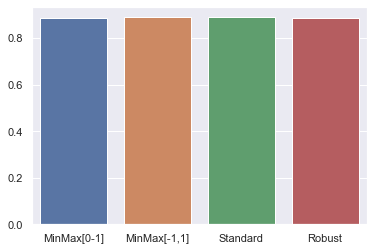

In [168]:
x = ['MinMax[0-1]','MinMax[-1,1]','Standard','Robust']
y = [model_min_max1.score(min_max1_X_val, y_val),model_min_max2.score(min_max2_X_val, y_val), 
   model_scaler.score(scaler_X_val, y_val),
    model_robust.score(robust_X_val, y_val)]


sns.barplot(x = x, y = y)

# Scale Numerical data

In [169]:
#normalization because some models require the data to be in the same scale
#is always better to scale the data

In [170]:
#Scaling train

#call function
scaler = RobustScaler() #change scaler here

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

array([[ 0.        ,  0.        ,  2.        , ...,  0.        ,
         1.        ,  5.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.33333333,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        , ..., -0.66666667,
         0.5       ,  0.        ],
       ...,
       [ 0.        ,  2.        ,  2.        , ...,  0.33333333,
         2.        ,  3.        ],
       [ 0.        ,  0.        ,  2.        , ..., -1.        ,
         1.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.5       ,  5.        ]])

In [171]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled #converting to a data frame

,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,total_visits,encounter_patient
encounter_id,,,,,,,,,,,
533253,0.0,0.0,2.0,0.692308,-0.50,0.153846,-0.5,0.5,0.000000,1.0,5.0
426224,0.0,0.0,0.0,0.717949,2.50,1.038462,-0.5,1.0,0.333333,0.0,0.0
634063,0.0,0.0,1.0,-0.153846,0.50,0.615385,0.0,0.7,-0.666667,0.5,0.0
890610,0.0,0.0,1.0,-0.487179,0.50,0.153846,0.5,-0.6,-1.000000,0.5,0.0
654194,1.0,0.0,0.0,0.666667,0.50,0.115385,0.0,0.0,0.333333,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...
660160,0.0,1.0,0.0,-0.256410,0.75,0.269231,0.0,0.3,0.333333,0.5,0.0
826429,0.0,0.0,0.0,-0.051282,1.25,-0.923077,-0.5,-0.6,-0.666667,0.0,0.0
332030,0.0,2.0,2.0,0.948718,0.25,-0.730769,-0.5,0.9,0.333333,2.0,3.0


In [172]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled

,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,total_visits,encounter_patient
encounter_id,,,,,,,,,,,
727104,0.0,0.0,0.0,0.307692,0.50,0.769231,0.0,0.2,0.333333,0.0,0.0
102821,0.0,0.0,1.0,0.666667,0.25,-0.730769,0.0,0.0,0.333333,0.5,0.0
173582,0.0,0.0,1.0,0.307692,-0.50,0.307692,-0.5,0.3,0.333333,0.5,0.0
135015,0.0,0.0,0.0,0.615385,-0.50,0.153846,-0.5,0.0,0.333333,0.0,0.0
166876,1.0,0.0,1.0,-0.948718,-0.50,0.461538,0.0,-0.5,0.333333,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
946599,0.0,0.0,0.0,-0.282051,-0.50,-0.269231,-0.5,-0.2,0.333333,0.0,0.0
128057,4.0,0.0,1.0,0.871795,0.50,-1.346154,-0.5,-0.4,0.333333,2.5,0.0
259379,4.0,0.0,0.0,0.102564,1.50,0.153846,0.5,0.7,0.333333,2.0,0.0


In [173]:
train_combined = pd.merge(X_train_num_scaled, train_data_encoded, on='encounter_id', how='inner')

In [174]:
train_combined

,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,total_visits,...,prescribed_diabetes_meds,medication,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,pulse_category,diagnosis_category,medication_complexity,lab_test_intensity,multiple_diagnoses
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,0.0,0.0,2.0,0.692308,-0.50,0.153846,-0.5,0.5,0.000000,1.0,...,0.096066,0.096066,0.110109,0.096032,0.123399,0.111118,0.123225,0.125590,0.116285,0.111731
426224,0.0,0.0,0.0,0.717949,2.50,1.038462,-0.5,1.0,0.333333,0.0,...,0.116229,0.122305,0.113688,0.103317,0.152991,0.111118,0.123225,0.125590,0.116285,0.111731
634063,0.0,0.0,1.0,-0.153846,0.50,0.615385,0.0,0.7,-0.666667,0.5,...,0.116229,0.122305,0.101387,0.126418,0.093050,0.112427,0.100045,0.125590,0.116285,0.111731
890610,0.0,0.0,1.0,-0.487179,0.50,0.153846,0.5,-0.6,-1.000000,0.5,...,0.096066,0.096066,0.101387,0.114727,0.108738,0.112427,0.100045,0.103191,0.116285,0.111731
654194,1.0,0.0,0.0,0.666667,0.50,0.115385,0.0,0.0,0.333333,0.5,...,0.096066,0.096066,0.092681,0.116298,0.108738,0.111118,0.123225,0.103191,0.116285,0.111731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,0.0,1.0,0.0,-0.256410,0.75,0.269231,0.0,0.3,0.333333,0.5,...,0.116229,0.122305,0.113264,0.103317,0.093050,0.112427,0.123225,0.125590,0.116285,0.111731
826429,0.0,0.0,0.0,-0.051282,1.25,-0.923077,-0.5,-0.6,-0.666667,0.0,...,0.116229,0.102389,0.106814,0.161044,0.098746,0.112427,0.100045,0.103191,0.097780,0.111731
332030,0.0,2.0,2.0,0.948718,0.25,-0.730769,-0.5,0.9,0.333333,2.0,...,0.116229,0.122305,0.113264,0.109963,0.093050,0.111118,0.123225,0.125590,0.108796,0.111731


In [175]:
val_combined = pd.merge(X_val_num_scaled, X_val_cat_encoded, on='encounter_id', how='inner')

# Feature Selection Binary

In [176]:
#univariate method

In [177]:
train_combined.var()#every variable has in someway correlation, for example if havent drop country yet it would have 0 correlation here because it does not vary 

outpatient_visits_in_previous_year       1.679919
emergency_visits_in_previous_year        0.844421
inpatient_visits_in_previous_year        1.584817
average_pulse_bpm                        0.348889
length_of_stay_in_hospital               0.557089
number_lab_tests                         0.570116
non_lab_procedures                       0.727755
number_of_medications                    0.659179
number_diagnoses                         0.416689
total_visits                             1.320548
encounter_patient                        2.770200
emergency_visit                          0.000335
length_of_stay_category                  0.000166
weight                                   0.000006
glucose_test_result                      0.000026
a1c_test_result                          0.000037
admission_type                           0.000022
medical_specialty                        0.000118
race                                     0.000013
gender                                   0.000003


In [178]:
#there are some variables with very low variation
#multiple_diagnoses                       0.000008 
#race                                     
#gender                                  
#weight                                   0.000006
#pulse_category                           0.000003

In [179]:
#using target encoding we can evaluate the correlation also for categorical variables

In [180]:
#corr matrix

In [181]:
cor_spearman = train_combined.corr(method ='spearman')
cor_spearman#use this correlation method due to pearson assumptions

,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,total_visits,...,prescribed_diabetes_meds,medication,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,pulse_category,diagnosis_category,medication_complexity,lab_test_intensity,multiple_diagnoses
outpatient_visits_in_previous_year,1.000000,0.179317,0.155401,0.005202,-0.013769,-0.022316,-0.023204,0.072138,0.112029,0.577579,...,0.016963,0.007578,-0.001747,0.002820,0.025262,-0.007080,0.100291,0.068486,-0.035934,0.015425
emergency_visits_in_previous_year,0.179317,1.000000,0.219908,-0.000933,-0.003753,0.005500,-0.044455,0.043113,0.092281,0.463363,...,0.035508,0.050372,0.011780,0.000998,0.025071,0.002969,0.083494,0.048009,0.002284,0.008477
inpatient_visits_in_previous_year,0.155401,0.219908,1.000000,0.003969,0.094987,0.041529,-0.064299,0.101277,0.137343,0.795576,...,0.028617,0.059156,0.070265,0.044455,0.070432,-0.001785,0.127508,0.102660,0.045330,0.017799
average_pulse_bpm,0.005202,-0.000933,0.003969,1.000000,0.002440,-0.001094,-0.000058,0.004229,0.000273,0.004205,...,0.001291,-0.000984,0.003506,-0.004675,-0.001293,-0.785644,0.001194,0.003737,-0.001603,0.002999
length_of_stay_in_hospital,-0.013769,-0.003753,0.094987,0.002440,1.000000,0.335671,0.187139,0.464110,0.236634,0.055421,...,0.072019,0.107330,0.089080,0.084370,0.138152,-0.004581,0.227171,0.349586,0.275443,0.035779
number_lab_tests,-0.022316,0.005500,0.041529,-0.001094,0.335671,1.000000,0.019133,0.248044,0.169739,0.016762,...,0.037876,0.084564,0.026054,0.032859,0.092135,0.000738,0.155025,0.175340,0.881818,0.005933
non_lab_procedures,-0.023204,-0.044455,-0.064299,-0.000058,0.187139,0.019133,1.000000,0.349665,0.067149,-0.070587,...,-0.016640,-0.003981,-0.001088,0.061637,0.039642,-0.001218,0.060298,0.230548,0.000488,0.043789
number_of_medications,0.072138,0.043113,0.101277,0.004229,0.464110,0.248044,0.349665,1.000000,0.293364,0.108371,...,0.200592,0.233321,-0.019868,0.054174,0.088895,-0.001992,0.275886,0.809327,0.201393,0.067428
number_diagnoses,0.112029,0.092281,0.137343,0.000273,0.236634,0.169739,0.067149,0.293364,1.000000,0.169744,...,0.024333,0.076119,0.010613,0.084385,0.179003,-0.001173,0.930079,0.244972,0.125185,0.088322
total_visits,0.577579,0.463363,0.795576,0.004205,0.055421,0.016762,-0.070587,0.108371,0.169744,1.000000,...,0.044144,0.064073,0.049115,0.029279,0.065211,-0.003457,0.155506,0.111367,0.011744,0.024543


In [182]:
def cor_heatmap(cor):
    plt.figure(figsize=(16,12))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [183]:
#fazer tabela em excel para dar match de todos os metodos da feature selection

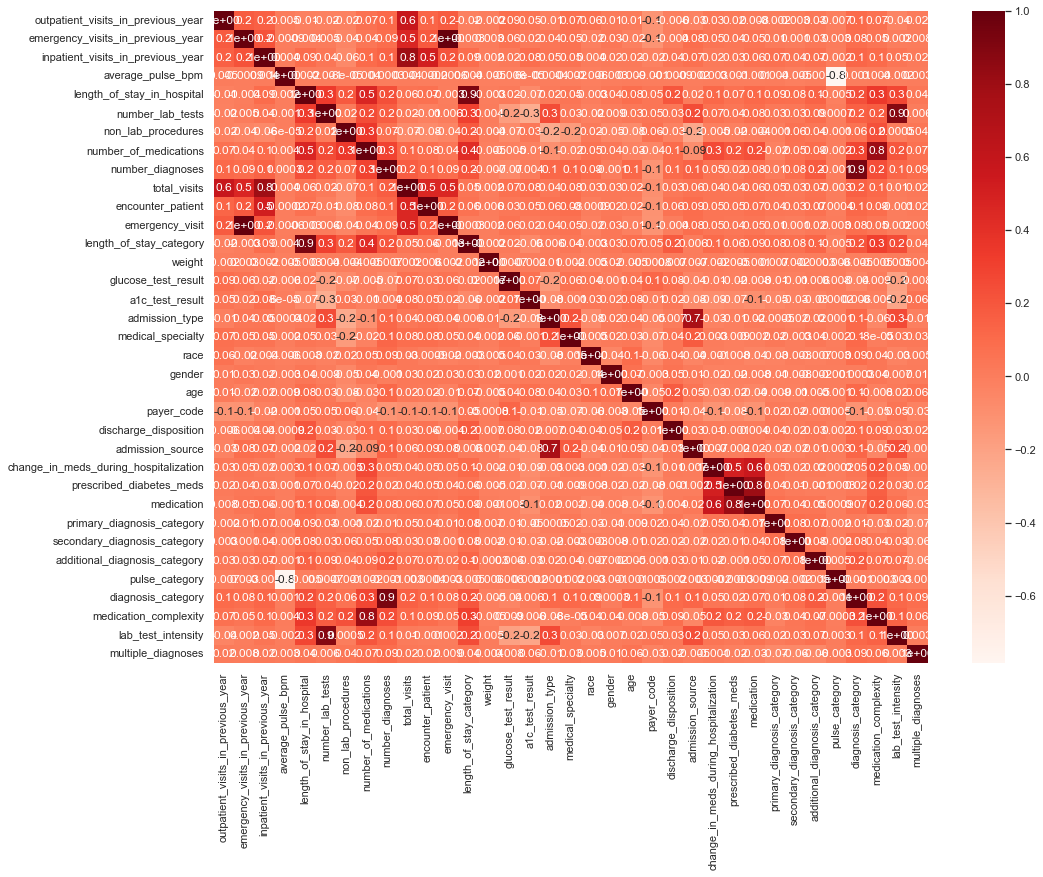

In [184]:
cor_heatmap(cor_spearman)#drop medication because we have two pairs more correlated with this variable
#many correlation with total visits
#admission source / type


In [185]:
#drop also of diagnosis categ medication complexitu and lab_test_instensity

In [186]:
#see more methods of feature selection embebed wrapper

RFE Recursive Feature Elimination (RFE):

RFE is a feature selection algorithm that recursively removes the least important features.
It works by training the model, evaluating the importance of each feature, and then removing the least important feature.
This process is repeated until the desired number of features is reached.
It is often used in conjunction with models that assign feature importance scores, such as linear models or tree-based models.

RFE Logistic

In [187]:
#only for numerical features due to the running time

In [188]:
#We did this for loop to know a-priori how many features to select (the optimum number associated to the best score) in RFE logistic model
#no of features

nof_list = np.arange(1, 10)
high_score = 0
# Variable to store the optimum features
nof = 0
train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()

    rfe = RFE(estimator=model, n_features_to_select=nof_list[n], step=1)  # Added step parameter for clarity
    X_train_rfe = rfe.fit_transform(X_train_num_scaled, y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe, y_train)

    # Storing results on training data
    train_score = f1_score(y_train, model.predict(X_train_rfe), average='weighted')
    train_score_list.append(train_score)

    # Storing results on validation data
    val_score = f1_score(y_val, model.predict(X_val_rfe), average='weighted')
    val_score_list.append(val_score)

    if val_score > high_score:
        high_score = val_score
        nof = nof_list[n]
    # Adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index=X_train_num_scaled.columns)

print("Optimal number of features:", nof)
print("Weighted F1 score with optimal features on validation set:", high_score)
print(f"Features to select: \n{features_to_select}")

Optimal number of features: 1
Weighted F1 score with optimal features on validation set: 0.8358828592479733
Features to select: 
outpatient_visits_in_previous_year    False
emergency_visits_in_previous_year     False
inpatient_visits_in_previous_year     False
average_pulse_bpm                     False
length_of_stay_in_hospital            False
number_lab_tests                      False
non_lab_procedures                    False
number_of_medications                 False
number_diagnoses                      False
total_visits                          False
encounter_patient                      True
dtype: bool


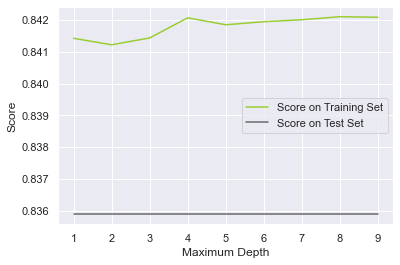

In [189]:
plt.plot(list(range(1,10)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,10)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()#score by chosing the number of features apriori, by looking at 9 we have good scores and no overfitting

LASSO
Lasso Regression:

Lasso (Least Absolute Shrinkage and Selection Operator) is a regression technique that penalizes the absolute size of the coefficients.
The L1 penalty in Lasso encourages sparsity in the coefficient vector, effectively setting some coefficients to exactly zero.
Features with zero coefficients in Lasso regression are effectively excluded from the model.

In [190]:
#embebed methods

In [191]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [192]:

reg = LassoCV()

In [193]:
y_train_lasso = y_train.map({'No': 0, 'Yes': 1})
reg.fit(train_combined, y_train_lasso)

LassoCV()

In [194]:
coef = pd.Series(reg.coef_, index = train_combined.columns)
coef

outpatient_visits_in_previous_year      -0.001325
emergency_visits_in_previous_year       -0.000330
inpatient_visits_in_previous_year        0.012184
average_pulse_bpm                       -0.000000
length_of_stay_in_hospital               0.000876
number_lab_tests                         0.004508
non_lab_procedures                      -0.001018
number_of_medications                    0.003745
number_diagnoses                         0.008706
total_visits                            -0.000000
encounter_patient                        0.035200
emergency_visit                          0.000000
length_of_stay_category                  0.000000
weight                                   0.000000
glucose_test_result                      0.000000
a1c_test_result                          0.000000
admission_type                           0.000000
medical_specialty                        0.000000
race                                     0.000000
gender                                  -0.000000


In [195]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 23 variables


In [196]:
coef.sort_values()

outpatient_visits_in_previous_year      -0.001325
non_lab_procedures                      -0.001018
emergency_visits_in_previous_year       -0.000330
medication_complexity                    0.000000
diagnosis_category                       0.000000
pulse_category                           0.000000
primary_diagnosis_category               0.000000
medication                               0.000000
prescribed_diabetes_meds                 0.000000
change_in_meds_during_hospitalization    0.000000
admission_source                        -0.000000
payer_code                               0.000000
age                                      0.000000
gender                                  -0.000000
race                                     0.000000
lab_test_intensity                       0.000000
medical_specialty                        0.000000
a1c_test_result                          0.000000
average_pulse_bpm                       -0.000000
admission_type                           0.000000


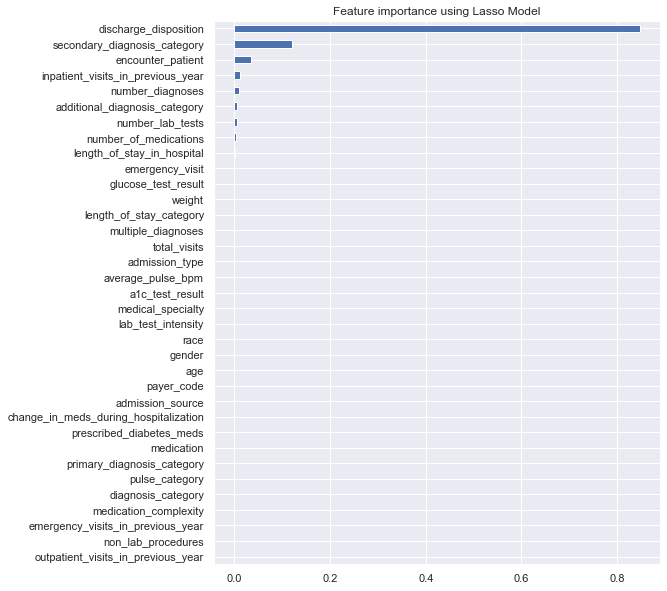

In [197]:
plot_importance(coef,'Lasso')

In [198]:
#Mutual Information Classification, in which we
#estimated the dependency between the variables and the target. The highly correlated predictors
#with the target are the ones we should retain.

MIC

In [199]:
selector = sklearn.feature_selection.mutual_info_classif(
    train_combined,
    y_train,
    discrete_features='auto',
    n_neighbors=18,
    copy=True,
    random_state=None)
selector

array([0.00051728, 0.00239205, 0.01128268, 0.00060682, 0.00074773,
       0.00079126, 0.00128588, 0.00095912, 0.00279633, 0.00798273,
       0.02798773, 0.00303579, 0.00138588, 0.0007317 , 0.00127051,
       0.00146457, 0.0008616 , 0.00171905, 0.00046839, 0.00129515,
       0.00109697, 0.00143216, 0.00691235, 0.00117877, 0.00146015,
       0.00035714, 0.0008159 , 0.00042021, 0.00159967, 0.00025204,
       0.00085903, 0.00236381, 0.00120243, 0.00065976, 0.00115399])

In [200]:
columns = list(train_combined.columns)
final_selector = pd.DataFrame({'Variable': columns, 'Value': selector})
final_selector

,Variable,Value
0,outpatient_visits_in_previous_year,0.000517
1,emergency_visits_in_previous_year,0.002392
2,inpatient_visits_in_previous_year,0.011283
3,average_pulse_bpm,0.000607
4,length_of_stay_in_hospital,0.000748
5,number_lab_tests,0.000791
6,non_lab_procedures,0.001286
7,number_of_medications,0.000959
8,number_diagnoses,0.002796
9,total_visits,0.007983


In [201]:
#variables that have no influence on the target
selected_columns = final_selector[final_selector['Value'] < 0.00001]['Variable'].tolist()

print("Columns with Value < 0.00001:")
print(selected_columns)

Columns with Value < 0.00001:
[]


In [202]:
#Decision tree Feature Importance

In [203]:
gini_importance = DecisionTreeClassifier().fit(X_train_num_scaled, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_num_scaled, y_train).feature_importances_

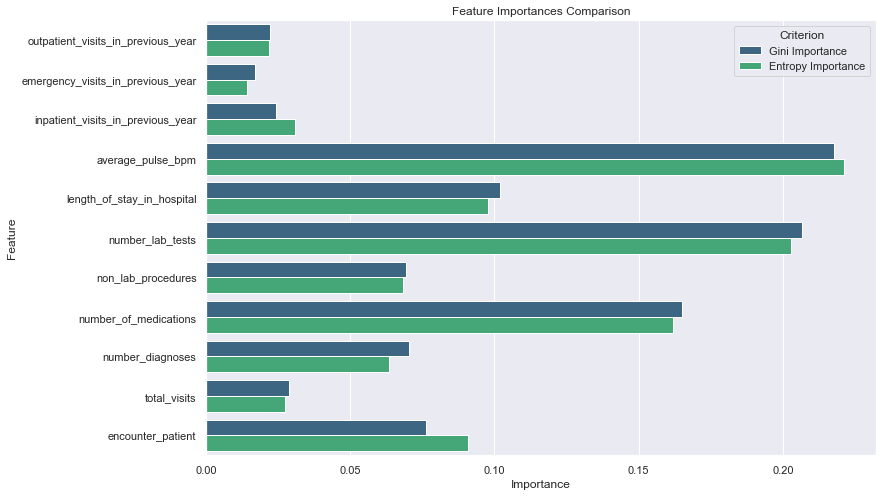

In [204]:
# Assuming train_combined2 and y_train are your training data and target variable
# If you have categorical features, make sure they are appropriately preprocessed

# Fit decision tree classifiers
clf_gini = DecisionTreeClassifier()
clf_entropy = DecisionTreeClassifier(criterion='entropy')

gini_importance = clf_gini.fit(X_train_num_scaled, y_train).feature_importances_
entropy_importance = clf_entropy.fit(X_train_num_scaled, y_train).feature_importances_

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({'Feature': X_train_num_scaled.columns, 'Gini Importance': gini_importance, 'Entropy Importance': entropy_importance})

# Melt the DataFrame for Seaborn plotting
importance_melted = importance_df.melt(id_vars='Feature', var_name='Criterion', value_name='Importance')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Criterion', data=importance_melted, palette='viridis', orient='h')
plt.title('Feature Importances Comparison')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
#visits are the ones with less gini and entropy

In [205]:
#visits variables are the less important based on this technique

In [206]:
#we computed rfe only for "numerical features" because it was taking to much time runing all the variables 

## Drops After Feature Selection Binary

In [207]:
train_combined.drop(columns = ['weight', 'admission_source', 'medication', 'pulse_category', 'diagnosis_category', 'lab_test_intensity', 'length_of_stay_category', 'average_pulse_bpm', 'number_of_medications', 'total_visits'], inplace=True)
val_combined.drop(columns = ['weight', 'admission_source', 'medication', 'pulse_category', 'diagnosis_category', 'lab_test_intensity', 'length_of_stay_category', 'average_pulse_bpm', 'number_of_medications', 'total_visits'], inplace=True)

# Models

In [208]:
train_combined

,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_diagnoses,encounter_patient,emergency_visit,glucose_test_result,...,age,payer_code,discharge_disposition,change_in_meds_during_hospitalization,prescribed_diabetes_meds,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,medication_complexity,multiple_diagnoses
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,0.0,0.0,2.0,-0.50,0.153846,-0.5,0.000000,5.0,0.105085,0.110581,...,0.119851,0.115124,0.098695,0.105505,0.096066,0.110109,0.096032,0.123399,0.125590,0.111731
426224,0.0,0.0,0.0,2.50,1.038462,-0.5,0.333333,0.0,0.105085,0.110581,...,0.105010,0.115124,0.166603,0.105505,0.116229,0.113688,0.103317,0.152991,0.125590,0.111731
634063,0.0,0.0,1.0,0.50,0.615385,0.0,-0.666667,0.0,0.105085,0.110581,...,0.105010,0.115124,0.098695,0.118659,0.116229,0.101387,0.126418,0.093050,0.125590,0.111731
890610,0.0,0.0,1.0,0.50,0.153846,0.5,-1.000000,0.0,0.105085,0.110581,...,0.105010,0.109293,0.098695,0.105505,0.096066,0.101387,0.114727,0.108738,0.103191,0.111731
654194,1.0,0.0,0.0,0.50,0.115385,0.0,0.333333,1.0,0.105085,0.110581,...,0.119851,0.109293,0.098695,0.105505,0.096066,0.092681,0.116298,0.108738,0.103191,0.111731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,0.0,1.0,0.0,0.75,0.269231,0.0,0.333333,0.0,0.162971,0.110581,...,0.119851,0.109293,0.098695,0.118659,0.116229,0.113264,0.103317,0.093050,0.125590,0.111731
826429,0.0,0.0,0.0,1.25,-0.923077,-0.5,-0.666667,0.0,0.105085,0.110581,...,0.119851,0.115124,0.121819,0.118659,0.116229,0.106814,0.161044,0.098746,0.103191,0.111731
332030,0.0,2.0,2.0,0.25,-0.730769,-0.5,0.333333,3.0,0.162971,0.149134,...,0.105010,0.115124,0.121819,0.118659,0.116229,0.113264,0.109963,0.093050,0.125590,0.111731


In [209]:
val_combined

,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_diagnoses,encounter_patient,emergency_visit,glucose_test_result,...,age,payer_code,discharge_disposition,change_in_meds_during_hospitalization,prescribed_diabetes_meds,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,medication_complexity,multiple_diagnoses
encounter_id,,,,,,,,,,,,,,,,,,,,,
727104,0.0,0.0,0.0,0.50,0.769231,0.0,0.333333,0.0,0.105085,0.110581,...,0.119851,0.109293,0.098695,0.105505,0.096066,0.126267,0.161044,0.152991,0.125590,0.111731
102821,0.0,0.0,1.0,0.25,-0.730769,0.0,0.333333,0.0,0.105085,0.110581,...,0.105010,0.109293,0.098695,0.118659,0.116229,0.156280,0.133217,0.108738,0.103191,0.111731
173582,0.0,0.0,1.0,-0.50,0.307692,-0.5,0.333333,0.0,0.105085,0.110581,...,0.119851,0.109293,0.098695,0.118659,0.116229,0.101387,0.103317,0.108738,0.125590,0.111731
135015,0.0,0.0,0.0,-0.50,0.153846,-0.5,0.333333,0.0,0.105085,0.110581,...,0.105010,0.115124,0.098695,0.105505,0.116229,0.090056,0.110314,0.093050,0.103191,0.111731
166876,1.0,0.0,1.0,-0.50,0.461538,0.0,0.333333,1.0,0.105085,0.110581,...,0.105010,0.109293,0.098695,0.118659,0.116229,0.110109,0.126418,0.108738,0.103191,0.111731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946599,0.0,0.0,0.0,-0.50,-0.269231,-0.5,0.333333,0.0,0.105085,0.110581,...,0.105010,0.109293,0.098695,0.118659,0.116229,0.113264,0.109963,0.123399,0.103191,0.111731
128057,4.0,0.0,1.0,0.50,-1.346154,-0.5,0.333333,0.0,0.105085,0.110581,...,0.119851,0.115124,0.147744,0.105505,0.096066,0.113264,0.135404,0.126372,0.103191,0.111731
259379,4.0,0.0,0.0,1.50,0.153846,0.5,0.333333,0.0,0.105085,0.110581,...,0.105010,0.109293,0.147744,0.118659,0.116229,0.101387,0.109963,0.124000,0.125590,0.111731


In [210]:
#Bayes done
#KD-Tree
#Logistic Regression done
#Neural Networks done
#Decision Trees done
#KNN tentei
#Random Forests

In [211]:
#LOGISTIC
# Create a logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
logreg.fit(train_combined, y_train)

# Predictions on the training set
train_predictions = logreg.predict(train_combined)

# Predictions on the validation set
validation_predictions = logreg.predict(val_combined)

# Compute accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
validation_accuracy = accuracy_score(y_val, validation_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {validation_accuracy}")


Training Accuracy: 0.8873863335049054
Validation Accuracy: 0.8885301137161309


In [212]:
print('----------------------- TRAIN -----------------------')
print(classification_report(y_train, train_predictions))
print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val, validation_predictions))
# to support our analysis we computed a summary of metrics between predictions train and validation, and we understand that on this model 
#having a higher accuracy does not means good prediction cause in this case due to the lower number of yes in our dataset we are not predicting it with a good precision
#consequently we dont have a good f1 score  and that's why we need other techniques to balance our data set(like resampling)

----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

          No       0.89      0.99      0.94     56958
         Yes       0.44      0.04      0.07      7155

    accuracy                           0.89     64113
   macro avg       0.67      0.52      0.50     64113
weighted avg       0.84      0.89      0.84     64113

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

          No       0.89      1.00      0.94      6328
         Yes       1.00      0.00      0.00       795

    accuracy                           0.89      7123
   macro avg       0.94      0.50      0.47      7123
weighted avg       0.90      0.89      0.84      7123



In [213]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
rf_classifier.fit(train_combined, y_train)

# Predict on the training set
y_train_pred = rf_classifier.predict(train_combined)

# Predict on the validation set
y_valid_pred = rf_classifier.predict(val_combined)

# Compute accuracy on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)

# Compute accuracy on the validation set
accuracy_valid = accuracy_score(y_val, y_valid_pred)

# Display the results
print("Accuracy on the training set:", accuracy_train)
print("Accuracy on the validation set:", accuracy_valid)#overfitting

Accuracy on the training set: 0.9999844025392666
Accuracy on the validation set: 0.8886705040011231


# Resampling

In [214]:
train_combined

,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_diagnoses,encounter_patient,emergency_visit,glucose_test_result,...,age,payer_code,discharge_disposition,change_in_meds_during_hospitalization,prescribed_diabetes_meds,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,medication_complexity,multiple_diagnoses
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,0.0,0.0,2.0,-0.50,0.153846,-0.5,0.000000,5.0,0.105085,0.110581,...,0.119851,0.115124,0.098695,0.105505,0.096066,0.110109,0.096032,0.123399,0.125590,0.111731
426224,0.0,0.0,0.0,2.50,1.038462,-0.5,0.333333,0.0,0.105085,0.110581,...,0.105010,0.115124,0.166603,0.105505,0.116229,0.113688,0.103317,0.152991,0.125590,0.111731
634063,0.0,0.0,1.0,0.50,0.615385,0.0,-0.666667,0.0,0.105085,0.110581,...,0.105010,0.115124,0.098695,0.118659,0.116229,0.101387,0.126418,0.093050,0.125590,0.111731
890610,0.0,0.0,1.0,0.50,0.153846,0.5,-1.000000,0.0,0.105085,0.110581,...,0.105010,0.109293,0.098695,0.105505,0.096066,0.101387,0.114727,0.108738,0.103191,0.111731
654194,1.0,0.0,0.0,0.50,0.115385,0.0,0.333333,1.0,0.105085,0.110581,...,0.119851,0.109293,0.098695,0.105505,0.096066,0.092681,0.116298,0.108738,0.103191,0.111731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,0.0,1.0,0.0,0.75,0.269231,0.0,0.333333,0.0,0.162971,0.110581,...,0.119851,0.109293,0.098695,0.118659,0.116229,0.113264,0.103317,0.093050,0.125590,0.111731
826429,0.0,0.0,0.0,1.25,-0.923077,-0.5,-0.666667,0.0,0.105085,0.110581,...,0.119851,0.115124,0.121819,0.118659,0.116229,0.106814,0.161044,0.098746,0.103191,0.111731
332030,0.0,2.0,2.0,0.25,-0.730769,-0.5,0.333333,3.0,0.162971,0.149134,...,0.105010,0.115124,0.121819,0.118659,0.116229,0.113264,0.109963,0.093050,0.125590,0.111731


In [215]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)#to balance the inbalanced classes
clf.fit(train_combined,y_train)#Unlike resampling techniques (undersampling, oversampling, SMOTE), class weights do not require altering the size of the dataset through duplication or removal of instances. This can be beneficial in scenarios where maintaining the original distribution of instances is crucial.
#RandomForestClassifier is configured to handle imbalanced classes by setting class_weight='balanced', which helps improve the model's performance on minority class instances. The fit method then trains the model on the provided training data and target variable.

RandomForestClassifier(class_weight='balanced', random_state=42)

## Oversampling 

In [216]:
df_oversample = train_combined.copy()

In [217]:
ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_oversample, y_oversample = ros.fit_resample(df_oversample, y_train)
#random oversampling, where instances from the minority class are synthetically generated to achieve a more balanced distribution. 

In [218]:
X_oversample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113916 entries, 0 to 113915
Data columns (total 25 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   outpatient_visits_in_previous_year     113916 non-null  float64
 1   emergency_visits_in_previous_year      113916 non-null  float64
 2   inpatient_visits_in_previous_year      113916 non-null  float64
 3   length_of_stay_in_hospital             113916 non-null  float64
 4   number_lab_tests                       113916 non-null  float64
 5   non_lab_procedures                     113916 non-null  float64
 6   number_diagnoses                       113916 non-null  float64
 7   encounter_patient                      113916 non-null  float64
 8   emergency_visit                        113916 non-null  float64
 9   glucose_test_result                    113916 non-null  float64
 10  a1c_test_result                        113916 non-null  

In [219]:
y_oversample.value_counts()

No     56958
Yes    56958
Name: readmitted_binary, dtype: int64

In [220]:
#While RandomOverSampler can be effective in certain situations, it may not be the best choice for all imbalanced datasets.The random duplication of minority class examples may introduce noise into the dataset, as the duplicated instances might not accurately represent the true characteristics of the minority class. This can potentially degrade the model's performance.
#It doesn't consider the underlying distribution of data or the relationships between examples.

In [221]:
#No Information Loss: Since it randomly duplicates existing examples, there is no loss of information from the original dataset.

In [222]:
# RandomOverSampler is to balance the class distribution by oversampling the minority class. It achieves this by randomly duplicating examples from the minority class until the class distribution is more balanced.

## Undersampling

In [223]:
#Undersampling is a technique used in machine learning to address class imbalance in a dataset. Class imbalance occurs when the number of instances in one class is significantly lower than the number of instances in another class. This imbalance can lead to models that are biased towards the majority class and may perform poorly on the minority class.

#Undersampling involves reducing the number of instances in the over-represented class (majority class) to create a more balanced dataset. The idea is to ensure that the number of instances in each class is closer to each other, allowing the model to give more attention to the minority class during training.

In [224]:
#Avoiding Information Loss:

#If the majority class contains important information for your problem, performing feature selection first can help ensure that this information is not lost during undersampling.

In [225]:
# Initialize RandomUnderSampler with custom parameters
rus = RandomUnderSampler(sampling_strategy= 1.0 , random_state=42, replacement=True)#aiming for a 60:40 ratio between the minority and majority classes in the resampled dataset.
#we try it many times with different divisions
# Fit and transform the training data
X_undersample, y_undersample = rus.fit_resample(train_combined, y_train)

In [226]:
y_undersample.value_counts()

No     7155
Yes    7155
Name: readmitted_binary, dtype: int64

In [227]:
# moderately good performance on both will be favoured over extremely good performance on one and poor performance on the other.

Size of the Dataset:

If your dataset is relatively large, undersampling the majority class might be a more computationally efficient option. On the other hand, oversampling can be beneficial for smaller datasets to prevent loss of information.
Imbalance Severity:

The degree of class imbalance plays a crucial role. In cases of extreme imbalance, where the majority class significantly outnumbers the minority class, undersampling the majority class may be necessary. For moderate imbalances, oversampling might be sufficient.

Considering what was said before and also evaluation metrics used in the models we decided to proceed with undersampling


In [228]:
#sampling_strategy

In [229]:
X_train = X_undersample # change this according to the sample method using above
Y_train = y_undersample
#X_train = X_undersample
#Y_train = y_undersample

# Models Binary W Resampling

## KNClassifier

In [230]:
modelKNNT = KNeighborsClassifier(algorithm='kd_tree').fit(X_train, Y_train)

In [231]:
labels_train = modelKNNT.predict(X_train)
labels_val = modelKNNT.predict(val_combined)

In [232]:
print('Train:', modelKNNT.score(X_train, Y_train))
print('Validation:', modelKNNT.score(val_combined, y_val))

Train: 0.7563242487770789
Validation: 0.7064439140811456


In [233]:
conf_matrix_train = confusion_matrix(Y_train, labels_train)
conf_matrix_val = confusion_matrix(y_val, labels_val)

print('\nConfusion Matrix - Training Set:')
print(conf_matrix_train)

print('\nConfusion Matrix - Validation Set:')
print(conf_matrix_val)


Confusion Matrix - Training Set:
[[5467 1688]
 [1799 5356]]

Confusion Matrix - Validation Set:
[[4692 1636]
 [ 455  340]]


In [234]:
# Assuming the positive class
pos_label = 'Yes'

# Calculate F1 score for the training set
f1_train = f1_score(Y_train, labels_train, pos_label=pos_label)

# Calculate F1 score for the validation set
f1_val = f1_score(y_val, labels_val, pos_label=pos_label)

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)


Train F1: 0.7544193253045991
Validation F1: 0.24539877300613494


### Optimizing the KNN model

In [235]:
#param_grid = {
#    'n_neighbors': [3, 5, 7, 9, 11],
#    'weights': ['uniform', 'distance'],
#    'metric': ['euclidean', 'manhattan', 'minkowski']
#}

#modelKNN = KNeighborsClassifier(algorithm='kd_tree')
#f1_scorer = make_scorer(f1_score, pos_label='Yes')

#grid_search = GridSearchCV(modelKNN, param_grid, cv=5, scoring=f1_scorer)
#grid_search.fit(X_train, Y_train)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_

#print("Best Parameters:", best_params)
#print("Best Score:", best_score)

#best_model = grid_search.best_estimator_

### Create KNeighborsClassifier model with the best parameters

In [236]:
# Create a KNeighborsClassifier with best parameters
knn_model = KNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=11, weights='uniform')

# Fit the model to the training data
knn_model.fit(X_train, Y_train)

# Make predictions
y_train_pred = knn_model.predict(X_train)
y_pred = knn_model.predict(val_combined)

# Calculate F1 score for the training set
f1_train = f1_score(Y_train, y_train_pred, pos_label=pos_label)

# Calculate F1 score for the validation set
f1_val = f1_score(y_val, y_pred, pos_label=pos_label)

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)#a bit oversampling but not that mutch

Train F1: 0.7163887532268192
Validation F1: 0.252827140549273


In [237]:
print('----------------------- TRAIN -----------------------')
print(classification_report(Y_train, y_train_pred))
print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val, y_pred))

----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

          No       0.72      0.71      0.72      7155
         Yes       0.72      0.72      0.72      7155

    accuracy                           0.72     14310
   macro avg       0.72      0.72      0.72     14310
weighted avg       0.72      0.72      0.72     14310

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

          No       0.91      0.78      0.84      6328
         Yes       0.19      0.39      0.25       795

    accuracy                           0.74      7123
   macro avg       0.55      0.59      0.55      7123
weighted avg       0.83      0.74      0.78      7123



## Logistic Regression

In [238]:
modelLR = LogisticRegression(random_state=42, max_iter=1000)
modelLR = modelLR.fit(X_train, Y_train)

In [239]:
labels_train = modelLR.predict(X_train)
labels_val = modelLR.predict(val_combined)

In [240]:
print('Train:', modelLR.score(X_train, Y_train))
print('Validation:', modelLR.score(val_combined, y_val))

Train: 0.6605870020964361
Validation: 0.8469745893584164


In [241]:
conf_matrix_train = confusion_matrix(Y_train, labels_train)
conf_matrix_val = confusion_matrix(y_val, labels_val)

print('\nConfusion Matrix - Training Set:')
print(conf_matrix_train)

print('\nConfusion Matrix - Validation Set:')
print(conf_matrix_val)


Confusion Matrix - Training Set:
[[5567 1588]
 [3269 3886]]

Confusion Matrix - Validation Set:
[[5838  490]
 [ 600  195]]


In [242]:
# Assuming the positive class
pos_label = 'Yes'

# Calculate F1 score for the training set
f1_train = f1_score(Y_train, labels_train, pos_label=pos_label)

# Calculate F1 score for the validation set
f1_val = f1_score(y_val, labels_val, pos_label=pos_label)

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)#a bit oversampling but not that mutch

Train F1: 0.6154089793332805
Validation F1: 0.26351351351351354


In [243]:
print('----------------------- TRAIN -----------------------')
print(classification_report(Y_train, labels_train))
print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val, labels_val))

----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

          No       0.63      0.78      0.70      7155
         Yes       0.71      0.54      0.62      7155

    accuracy                           0.66     14310
   macro avg       0.67      0.66      0.66     14310
weighted avg       0.67      0.66      0.66     14310

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

          No       0.91      0.92      0.91      6328
         Yes       0.28      0.25      0.26       795

    accuracy                           0.85      7123
   macro avg       0.60      0.58      0.59      7123
weighted avg       0.84      0.85      0.84      7123



## Random Forest

In [244]:
modelRF = RandomForestClassifier(bootstrap=True, random_state=42)
modelRF = modelRF.fit(X_train, Y_train)

In [245]:
labels_train_rf = modelRF.predict(X_train)
labels_val_rf = modelRF.predict(val_combined)

In [246]:
conf_matrix_train = confusion_matrix(Y_train, labels_train_rf)
conf_matrix_val = confusion_matrix(y_val, labels_val_rf)

print('\nConfusion Matrix - Training Set:')
print(conf_matrix_train)

print('\nConfusion Matrix - Validation Set:')
print(conf_matrix_val)


Confusion Matrix - Training Set:
[[7154    1]
 [   0 7155]]

Confusion Matrix - Validation Set:
[[5063 1265]
 [ 441  354]]


In [247]:
# Assuming the positive class
pos_label = 'Yes'

# Calculate F1 score for the training set
f1_train = f1_score(Y_train, labels_train, pos_label=pos_label)

# Calculate F1 score for the validation set
f1_val = f1_score(y_val, labels_val, pos_label=pos_label)

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.6154089793332805
Validation F1: 0.26351351351351354


## Decision Trees

In [248]:
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, Y_train)

# Assuming the positive class
pos_label = 'Yes'

# Calculate F1 score for the training set
f1_train = f1_score(Y_train, modelDT.predict(X_train), pos_label=pos_label)

# Calculate F1 score for the validation set
f1_val = f1_score(y_val, modelDT.predict(val_combined), pos_label=pos_label)

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 1.0
Validation F1: 0.2088072324292797


**Preprunning set our parameters before building the tree, prevent overfitting**

Prepruning is crucial to prevent the model from fitting the training data too closely, which could result in poor generalization to new, unseen data. If a tree is allowed to grow without any restrictions, it may memorize noise in the training data and fail to generalize well to new data.

The goal of prepruning is to prevent the tree from becoming too complex and overfitting the training data, so that we set previously parameters to define a stopping criteria for the trees and in this way they won't be so complex

### Optimizing the Decision Trees

In this code we are defining many options of parameterization and next to this we used grid search to determine among the available parameter which are the best ones to use
#the best parameters to use are the ones that are less prone to overfitt
#Grid search involves defining a grid of hyperparameter values and searching through all possible combinations of these values to find the set of hyperparameters that results in the best model performance.

**with randomized search we automatized the process of finding the best parameters**

In [249]:
#param_dist = {
#    'criterion': ['gini', 'entropy'],
#    'splitter': ['best', 'random'],
#    'max_depth': [None, 2, 5],
#    'min_samples_split': [2, 5],
#    'min_samples_leaf': [1, 2],
#    'max_features': [None, 'sqrt'],
#    'max_leaf_nodes': [None, 10, 20],
#    'min_impurity_decrease': [0.0, 0.1]
#}

#dt_classifier = DecisionTreeClassifier()

#random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
#random_search.fit(X_train, Y_train)

#best_params = random_search.best_params_
#best_dt_classifier = DecisionTreeClassifier(**best_params)

#best_dt_classifier.fit(X_train, Y_train)
#y_val_pred = best_dt_classifier.predict(val_combined)

#accuracy = accuracy_score(y_val, y_val_pred)
#print("Validation Accuracy: {:.4f}".format(accuracy))

#f1_val = f1_score(y_val, y_val_pred, pos_label=pos_label)
#print("Validation F1 Score: {:.4f}".format(f1_val))

### Create decision tree model with the best parameters

In [250]:
modelDT2 = DecisionTreeClassifier(criterion= 'entropy',
                                 max_depth= 5,
                                 splitter= 'best' ,
                                 min_samples_split=  5,
                                 min_samples_leaf = 1 ,
                                 max_features= None ,
                                 max_leaf_nodes= 10,
                                min_impurity_decrease = 0.0)
modelDT2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10,
                       min_samples_split=5)

In [251]:
print(classification_report(Y_train, modelDT2.predict(X_train)))#we achieve a better f1 score than before using resampling techniques

              precision    recall  f1-score   support

          No       0.71      0.64      0.67      7155
         Yes       0.67      0.74      0.70      7155

    accuracy                           0.69     14310
   macro avg       0.69      0.69      0.69     14310
weighted avg       0.69      0.69      0.69     14310



In [252]:
print(classification_report(y_val, modelDT2.predict(val_combined)))

              precision    recall  f1-score   support

          No       0.91      0.85      0.88      6328
         Yes       0.23      0.36      0.28       795

    accuracy                           0.80      7123
   macro avg       0.57      0.60      0.58      7123
weighted avg       0.84      0.80      0.81      7123



In [253]:
# Assuming the positive class
pos_label = 'Yes'

# Calculate F1 score for the training set
f1_train = f1_score(Y_train, modelDT2.predict(X_train), pos_label=pos_label)

# Calculate F1 score for the validation set
f1_val = f1_score(y_val, modelDT2.predict(val_combined), pos_label=pos_label)

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.7034326769558276
Validation F1: 0.28090999010880313


## Neural Networks

In [254]:
print(X_train.shape, Y_train.shape)

(14310, 25) (14310,)


In [255]:
modelNN = MLPClassifier(max_iter=400).fit(X_train, Y_train)

In [256]:
labels_train_nn = modelNN.predict(X_train)
labels_val_nn = modelNN.predict(val_combined)

In [257]:
# Assuming the positive class
pos_label = 'Yes'

# Calculate F1 score for the training set
f1_train = f1_score(Y_train, labels_train_nn, pos_label=pos_label)

# Calculate F1 score for the validation set
f1_val = f1_score(y_val, labels_val_nn, pos_label=pos_label)

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.7153175252112292
Validation F1: 0.2899050905953408


### Optimizing the Neural Networks

In [258]:
#param_grid = {
#    'hidden_layer_sizes': [(1), (8), (10), (20, 10)],
#    'activation': ['relu', 'tanh'],
#    'learning_rate': ['constant', 'invscaling', 'adaptive'],
#    'solver': ['adam', 'sgd']
#}

#modelNN = MLPClassifier(max_iter = 400)

#f1_scorer = make_scorer(f1_score, pos_label='Yes')

#random_search = RandomizedSearchCV(modelNN, param_distributions=param_grid, n_iter=10, cv=5, scoring=f1_scorer, random_state=42)
#random_search.fit(X_train, Y_train)

#print("Best Parameters: ", random_search.best_params_)
#print("Best Score: {:.4f}".format(random_search.best_score_))

#best_model = random_search.best_estimator_

#y_val_pred = best_model.predict(val_combined)
#accuracy = accuracy_score(y_val, y_val_pred)
#print("Validation Accuracy: {:.4f}".format(accuracy))

#f1_val = f1_score(y_val, y_val_pred, pos_label=pos_label)
#print("Validation F1 Score: {:.4f}".format(f1_val))

### Create Neural Network with the best parameters

In [259]:
modelBestNN = MLPClassifier(max_iter=400, solver= 'adam', learning_rate= 'adaptive', hidden_layer_sizes= 10, activation= 'relu').fit(X_train, Y_train)

In [260]:
labels_train_best_nn = modelBestNN.predict(X_train)
labels_val_best_nn = modelBestNN.predict(val_combined)

# Assuming the positive class
pos_label = 'Yes'

# Calculate F1 score for the training set
f1_train = f1_score(Y_train, labels_train_best_nn, pos_label=pos_label)

# Calculate F1 score for the validation set
f1_val = f1_score(y_val, labels_val_best_nn, pos_label=pos_label)

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.6985111662531017
Validation F1: 0.29164785553047406


## Ensemble Learning

## Stacking

In [261]:
# Define base learners
base_learners = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(random_state=42))
]

# Define meta-model
meta_model = LogisticRegression(random_state=42)

# Create stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Fit and predict
stacking_model.fit(X_train, Y_train)


StackingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('svm', SVC(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [262]:
labels_train_els = stacking_model.predict(X_train)
labels_val_els = stacking_model.predict(val_combined)

# Calculate F1 score for the training set
f1_train = f1_score(Y_train, labels_train_els, pos_label=pos_label)

# Calculate F1 score for the validation set
f1_val = f1_score(y_val, labels_val_els, pos_label=pos_label)

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.7080863819061243
Validation F1: 0.2803738317757009


## Boosting

### AdaBoost

In [263]:
# AdaBoost
ada_boost_model = AdaBoostClassifier(random_state=42)
ada_boost_model.fit(X_train, Y_train)

AdaBoostClassifier(random_state=42)

In [264]:
labels_train_elab = ada_boost_model.predict(X_train)
labels_val_elab = ada_boost_model.predict(val_combined)

# Calculate F1 score for the training set
f1_train = f1_score(Y_train, labels_train_elab, pos_label=pos_label)

# Calculate F1 score for the validation set
f1_val = f1_score(y_val, labels_val_elab, pos_label=pos_label)

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.6911154165513423
Validation F1: 0.2625437572928821


### Optimizing the AdaBoost Model

In [265]:
#param_grid_ada = {
#    'n_estimators': [50, 100, 200],
#    'learning_rate': [0.01, 0.1, 0.5, 1.0],
#    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
#}

#ada_boost_model = AdaBoostClassifier(random_state=42)
#f1_scorer = make_scorer(f1_score, pos_label='Yes')

#random_search = RandomizedSearchCV(ada_boost_model, param_distributions=param_grid_ada, scoring=f1_scorer, n_iter=10, cv=5)
#random_search.fit(X_train, Y_train)

#print("Best Parameters: ", random_search.best_params_)
#print("Best Score: {:.4f}".format(random_search.best_score_))

#best_params = random_search.best_params_
#best_model = random_search.best_estimator_

#y_val_pred = best_model.predict(val_combined)
#accuracy = accuracy_score(y_val, y_val_pred)
#print("Validation Accuracy: {:.4f}".format(accuracy))
#f1_val = f1_score(y_val, y_val_pred, pos_label=pos_label)
#print("Validation F1 Score: {:.4f}".format(f1_val))

### Create AdaBoost Classifier model with the best parameters

In [266]:
ada_boost_best_model = AdaBoostClassifier(random_state=42, n_estimators= 200, learning_rate= 0.1, estimator= DecisionTreeClassifier(max_depth=2))
ada_boost_best_model.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.1, n_estimators=200, random_state=42)

In [267]:
labels_train_best_elab = ada_boost_best_model.predict(X_train)
labels_val_best_elab = ada_boost_best_model.predict(val_combined)

# Calculate F1 score for the training set
f1_train = f1_score(Y_train, labels_train_best_elab, pos_label=pos_label)

# Calculate F1 score for the validation set
f1_val = f1_score(y_val, labels_val_best_elab, pos_label=pos_label)

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.7157420892360651
Validation F1: 0.29626168224299065


### Gradient Boosting

In [268]:
gradient_boost_model = GradientBoostingClassifier(random_state=42)
gradient_boost_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=42)

In [269]:
labels_train_elgb = gradient_boost_model.predict(X_train)
labels_val_elgb = gradient_boost_model.predict(val_combined)

# Calculate F1 score for the training set
f1_train = f1_score(Y_train, labels_train_elgb, pos_label=pos_label)

# Calculate F1 score for the validation set
f1_val = f1_score(y_val, labels_val_elgb, pos_label=pos_label)

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.7227538543328017
Validation F1: 0.29251101321585904


### Optimizing the Gradient Boosting Model

In [270]:
#param_grid_gradient_boosting = {
#    'n_estimators': [100, 200, 300],
#    'learning_rate': [0.01, 0.1, 0.2],
#    'max_depth': [3, 4, 5],
#    'min_samples_split': [2, 3, 4],
#    'min_samples_leaf': [1, 2, 3],
#    'subsample': [0.8, 0.9, 1.0],
#    'max_features': ['sqrt', 'log2', None]
#}

#gradient_boosting_model = GradientBoostingClassifier(random_state=42)
#f1_scorer = make_scorer(f1_score, pos_label='Yes')

#random_search = RandomizedSearchCV(gradient_boosting_model, param_distributions=param_grid_gradient_boosting, scoring=f1_scorer, n_iter=10, cv=5)
#random_search.fit(X_train, Y_train)

#print("Best Parameters: ", random_search.best_params_)
#print("Best Score: {:.4f}".format(random_search.best_score_))

#best_params = random_search.best_params_
#best_model = random_search.best_estimator_

#y_val_pred = best_model.predict(val_combined)
#accuracy = accuracy_score(y_val, y_val_pred)
#print("Validation Accuracy: {:.4f}".format(accuracy))
#f1_val = f1_score(y_val, y_val_pred, pos_label=pos_label)
#print("Validation F1 Score: {:.4f}".format(f1_val))

### Create Gradient Boosting Classifier model with the best parameters

In [271]:
gradient_boost_best_model = GradientBoostingClassifier(random_state=42, subsample= 0.8, n_estimators= 300, min_samples_split= 4, min_samples_leaf= 2, max_features= None, max_depth= 5, learning_rate= 0.01)
gradient_boost_best_model.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=2,
                           min_samples_split=4, n_estimators=300,
                           random_state=42, subsample=0.8)

In [272]:
labels_train_best_elgb = gradient_boost_best_model.predict(X_train)
labels_val_best_elgb = gradient_boost_best_model.predict(val_combined)

# Calculate F1 score for the training set
f1_train = f1_score(Y_train, labels_train_best_elgb, pos_label=pos_label)

# Calculate F1 score for the validation set
f1_val = f1_score(y_val, labels_val_best_elgb, pos_label=pos_label)

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.7285981808453718
Validation F1: 0.3016564952048823


## Gaussian NB

In [273]:
# Step 1: Create the Naive Bayes model
naive_bayes_model = GaussianNB()

# Step 2: Fit the model on the training data
naive_bayes_model.fit(X_train, Y_train)

# Step 3: Predict on the validation set
y_val_pred = naive_bayes_model.predict(val_combined)

# Step 4: Predict on the training set
y_train_pred = naive_bayes_model.predict(X_train)



In [274]:
# Assuming the positive class
pos_label = 'Yes'

# Calculate F1 score for the training set
f1_train = f1_score(Y_train, y_train_pred, pos_label=pos_label)

# Calculate F1 score for the validation set
f1_val = f1_score(y_val, y_val_pred, pos_label=pos_label)

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.49378992193044713
Validation F1: 0.24599483204134368


In [275]:
print('----------------------- TRAIN -----------------------')
print(classification_report(Y_train,  y_train_pred))
print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val, y_val_pred))

----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

          No       0.57      0.81      0.67      7155
         Yes       0.68      0.39      0.49      7155

    accuracy                           0.60     14310
   macro avg       0.62      0.60      0.58     14310
weighted avg       0.62      0.60      0.58     14310

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

          No       0.91      0.86      0.88      6328
         Yes       0.21      0.30      0.25       795

    accuracy                           0.80      7123
   macro avg       0.56      0.58      0.56      7123
weighted avg       0.83      0.80      0.81      7123



In [276]:
naive_bayes_model.predict_proba(val_combined) # probability estimates for the X_val

array([[0.46323638, 0.53676362],
       [0.71138401, 0.28861599],
       [0.83834093, 0.16165907],
       ...,
       [0.82356122, 0.17643878],
       [0.84374673, 0.15625327],
       [0.28069681, 0.71930319]])

In [277]:
naive_bayes_model.class_prior_ #probability of each class

array([0.5, 0.5])

In [278]:
#The binary F1-Score only considers the precision and the recall associated with the positive class - "Yes".

In [279]:
#F1 Score should be used when you want to seek a balance between Precision and Recall and if there is an uneven class distribution (large number of Actual Negatives). It decribes our project scenario

In [280]:
#The F1 score is a metric commonly used in binary classification problems to evaluate the model's performance, especially when there is an imbalance between the classes. It combines precision and recall into a single value, providing a balance between the two.

In [281]:
#The cost of having a misclassified actual positive (or a false negative) is very high! In our case since we are dealing with hospital readmissions this is really evident

# F1 Scores with Undersample Binary

Note: values may be different (while still close) in the cells output, since the table was made with 1 iteration and the resampling may change scores a bit

| Model                           | F1 Score (Train - Label: 'Yes') | F1 Score (Validation - Label: 'Yes') |
|---------------------------------|------------|------------|
| Bayes Classifier                |  0.49379   | 0.24600    |
| Logistic Regression             |  0.61541   | 0.26351    |
| K-Nearest Neighbours Classifier |  0.71639   | 0.25283    |
| Neural Networks                 |  0.70541   | 0.30122    |
| Decision Trees                  |  0.70343   | 0.28091    |
| Random Forest                   |  0.61541   | 0.26351    |
| Stacking Ensemble               |  0.70801   | 0.28037    |
| Ada Boosting Ensemble           |  0.71574   | 0.29626    |
| Gradient Boosting Ensemble      |  0.72860   | 0.30166    |


# Multiclass

## Split Multiclass

In [282]:
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
skf

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [283]:
train_copy.drop(columns=['readmitted_binary'], inplace = True)

In [284]:

X = train_copy.copy()
y = target2.copy()


StratifiedKFold(n_splits=10,random_state=42, shuffle=True)#using this we obtain each class represented with approximately equal proportions in both subsets
for train_index, val_index in skf.split(X,y):
    # get the indexes of the observations assigned for each partition
    X_train2, X_val2 = X.iloc[train_index], X.iloc[val_index]
    y_train2, y_val2 = y.iloc[train_index],y.iloc[val_index]

In [285]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64113 entries, 533253 to 757560
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           64113 non-null  int64 
 1   country                                64113 non-null  object
 2   patient_id                             64113 non-null  int64 
 3   race                                   60879 non-null  object
 4   gender                                 64113 non-null  object
 5   age                                    60908 non-null  object
 6   weight                                 64113 non-null  object
 7   payer_code                             64113 non-null  object
 8   outpatient_visits_in_previous_year     64113 non-null  int64 
 9   emergency_visits_in_previous_year      64113 non-null  int64 
 10  inpatient_visits_in_previous_year      64113 non-null  int64 
 11  admission

In [286]:
X_train2 = X_train2.replace('?',np.nan)
X_train2 = X_train2.replace('Unknown/Invalid',np.nan)
X_train2 = X_train2.replace('[]',np.nan)

# check how many NAs we have in each column
X_train2.isna().sum()


encounter_id                                 0
country                                      0
patient_id                                   0
race                                      4596
gender                                       3
age                                       3205
weight                                   62082
payer_code                               25406
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3325
medical_specialty                        31389
average_pulse_bpm                            0
discharge_disposition                     2334
admission_source                          4256
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           14
secondary_dia

In [287]:
X_val2 = X_val2.replace('?',np.nan)
X_val2 = X_val2.replace('Unknown/Invalid',np.nan)
X_val2 = X_val2.replace('[]',np.nan)

# check how many NAs we have in each column
X_val2.isna().sum()

encounter_id                                0
country                                     0
patient_id                                  0
race                                      474
gender                                      0
age                                       352
weight                                   6908
payer_code                               2795
outpatient_visits_in_previous_year          0
emergency_visits_in_previous_year           0
inpatient_visits_in_previous_year           0
admission_type                            381
medical_specialty                        3533
average_pulse_bpm                           0
discharge_disposition                     256
admission_source                          462
length_of_stay_in_hospital                  0
number_lab_tests                            0
non_lab_procedures                          0
number_of_medications                       0
primary_diagnosis                           2
secondary_diagnosis               

In [288]:
df_y_train2 = pd.DataFrame({'Readmitted_Multiclass': y_train2})

In [289]:
df_y_val2 = pd.DataFrame({'Readmitted_Multiclass': y_val2})

In [290]:
df_y_train2.value_counts()

Readmitted_Multiclass
No                       34565
>30 days                 22393
<30 days                  7155
dtype: int64

In [291]:
# Map categorical values to numerical values
category_mapping = {'No': 0, '>30 days': 1, '<30 days': 2}

# Replace categorical values with numerical values
df_y_train2['Readmitted_Multiclass'] = df_y_train2['Readmitted_Multiclass'].replace(category_mapping)

In [292]:
# Replace categorical values with numerical values
df_y_val2['Readmitted_Multiclass'] = df_y_val2['Readmitted_Multiclass'].replace(category_mapping)

In [293]:
df_y_train2

,Readmitted_Multiclass
encounter_id,
533253,1
426224,0
634063,0
890610,0
654194,1
...,...
758007,1
660160,0
826429,0


In [294]:
df_y_val2

,Readmitted_Multiclass
encounter_id,
760130,1
469557,0
423325,0
308710,0
152440,0
...,...
527093,0
636616,0
946599,0


In [295]:
X_train2

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,533253,USA,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,...,515,276,466,8,NaN,NaN,No,No,NaN,>30 days
426224,426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,...,38,785,162,9,NaN,NaN,No,Yes,['insulin'],No
634063,634063,USA,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,...,534,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No
890610,890610,USA,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,...,569,562,455,5,NaN,NaN,No,No,NaN,No
654194,654194,USA,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,...,715,599,428,9,NaN,NaN,No,No,NaN,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758007,758007,USA,65777877,Caucasian,Female,[70-80),NaN,MC,3,1,...,584,997,454,9,NaN,NaN,Ch,Yes,"['metformin', 'insulin']",>30 days
660160,660160,USA,24531381,AfricanAmerican,Female,[80-90),NaN,MC,0,1,...,453,786,250,9,NaN,>7,Ch,Yes,"['metformin', 'glyburide', 'insulin']",No
826429,826429,USA,4663818,AfricanAmerican,Female,[70-80),NaN,NaN,0,0,...,157,197,V66,6,NaN,>7,Ch,Yes,"['metformin', 'glyburide']",No


In [296]:
X_val2

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
760130,760130,USA,96104214,Caucasian,Female,[70-80),NaN,MC,0,0,...,425,398,745,9,NaN,NaN,No,Yes,['insulin'],>30 days
469557,469557,USA,41699943,Caucasian,Female,[80-90),NaN,MC,0,0,...,584,428,276,9,NaN,NaN,Ch,Yes,['insulin'],No
423325,423325,USA,47995992,AfricanAmerican,Male,[70-80),NaN,CM,0,0,...,852,780,401,8,NaN,Norm,No,Yes,['insulin'],No
308710,308710,USA,66006162,AfricanAmerican,Female,NaN,NaN,NaN,0,0,...,659,648,648,7,NaN,NaN,No,Yes,['insulin'],No
152440,152440,USA,28697562,Caucasian,Female,[80-90),NaN,NaN,1,0,...,296,250,V63,6,NaN,Norm,No,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527093,527093,USA,1411479,Caucasian,Male,[40-50),NaN,NaN,0,0,...,303,250.01,296,5,NaN,NaN,No,No,NaN,No
636616,636616,USA,35929071,AfricanAmerican,Male,[50-60),NaN,OG,0,0,...,402,428,250,3,NaN,NaN,Ch,Yes,['insulin'],No
946599,946599,USA,92187981,Caucasian,Male,[60-70),NaN,MC,0,0,...,428,491,518,9,NaN,NaN,Ch,Yes,"['glyburide', 'insulin']",No


## Data Preparation

In [297]:
def impute_missing_values(df):
    # Replace missing values in 'payer_code' with 'No Insurance'
    # According to metadata: if any, has insurance; if not, no insurance
    df['payer_code'] = df['payer_code'].fillna('No Insurance')

    # Fill missing values in 'medical_specialty' and 'weight' with 'Unknown'
    df['medical_specialty'].fillna('Unknown', inplace=True)
    df['weight'].fillna('Unknown', inplace=True)

    # For 'admission_type' and 'admission_source', fill missing values with 'Not Mapped'
    df['admission_type'].fillna('Not Mapped', inplace=True)
    df['admission_source'].fillna('Not Mapped', inplace=True)

    # Fill missing values in 'discharge_disposition' with 'Not Mapped'
    # This is to classify unknown discharges as 'Not Mapped'
    df['discharge_disposition'].fillna('Not Mapped', inplace=True)

    # Fill missing test results with 'Not Tested'
    # Assumption: if no information, it should be considered as not tested
    df['glucose_test_result'].fillna('Not Tested', inplace=True)
    df['a1c_test_result'].fillna('Not Tested', inplace=True)

    # Fill missing values in 'medication' with 'No medication'
    # The assumption here is that if no medication info is provided, none was taken
    df['medication'].fillna('No medication', inplace=True)

    # For diagnosis columns, fill missing values with 'No Diagnosis'
    # Assumption: if no information is available, no diagnosis was made
    df['primary_diagnosis'].fillna('No Diagnosis', inplace=True)
    df['secondary_diagnosis'].fillna('No Diagnosis', inplace=True)
    df['additional_diagnosis'].fillna('No Diagnosis', inplace=True)

    return df

# Apply the function to both the training and validation sets
X_train2 = impute_missing_values(X_train2)
X_val2 = impute_missing_values(X_val2)

In [298]:
X_train2.isna().sum()

encounter_id                                0
country                                     0
patient_id                                  0
race                                     4596
gender                                      3
age                                      3205
weight                                      0
payer_code                                  0
outpatient_visits_in_previous_year          0
emergency_visits_in_previous_year           0
inpatient_visits_in_previous_year           0
admission_type                              0
medical_specialty                           0
average_pulse_bpm                           0
discharge_disposition                       0
admission_source                            0
length_of_stay_in_hospital                  0
number_lab_tests                            0
non_lab_procedures                          0
number_of_medications                       0
primary_diagnosis                           0
secondary_diagnosis               

In [299]:
X_val2.isna().sum()

encounter_id                               0
country                                    0
patient_id                                 0
race                                     474
gender                                     0
age                                      352
weight                                     0
payer_code                                 0
outpatient_visits_in_previous_year         0
emergency_visits_in_previous_year          0
inpatient_visits_in_previous_year          0
admission_type                             0
medical_specialty                          0
average_pulse_bpm                          0
discharge_disposition                      0
admission_source                           0
length_of_stay_in_hospital                 0
number_lab_tests                           0
non_lab_procedures                         0
number_of_medications                      0
primary_diagnosis                          0
secondary_diagnosis                        0
additional

In [300]:
code_ranges = {
    '001-139': 'Infectious and Parasitic Diseases',
    '140-239': 'Neoplasms',
    '240-279': 'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders',
    '280-289': 'Diseases of the Blood and Blood-Forming Organs',
    '290-319': 'Mental Disorders',
    '320-389': 'Diseases of the Nervous System and Sense Organs',
    '390-459': 'Diseases of the Circulatory System',
    '460-519': 'Diseases of the Respiratory System',
    '520-579': 'Diseases of the Digestive SysAtem',
    '580-629': 'Diseases of the Genitourinary System',
    '630-679': 'Complications of Pregnancy, Childbirth, and the Puerperium',
    '680-709': 'Diseases of the Skin and Subcutaneous Tissue',
    '710-739': 'Diseases of the Musculoskeletal System and Connective Tissue',
    '740-759': 'Congenital Anomalies',
    '760-779': 'Certain Conditions Originating in the Perinatal Period',
    '780-799': 'Symptoms, Signs, and Ill-Defined Conditions',
    '800-999': 'Injury and Poisoning',
    'E and V codes': 'External Causes of Injury and Supplemental Classification'
}

In [301]:
# Function to map ICD-9 codes to categories
def map_to_category(code):
    # Return 'No diagnosis' if code is missing
    if pd.isna(code):
        return 'No diagnosis'

    # Special handling for 'E' and 'V' codes
    if 'E' in code or 'V' in code:
        return code_ranges.get('E and V codes', 'Other')  # Use get() to handle missing key

    try:
        # Convert code to integer for range comparison
        code_int = int(code)
    except ValueError:
        # Handle non-numeric values as 'Other'
        return 'Other'

    # Loop through the code ranges to find the matching category
    for code_range, category in code_ranges.items():
        start, end = map(int, code_range.split('-'))
        if start <= code_int <= end:
            return category

    # Default to 'Other' if code does not match any range
    return 'Other'

# Apply the mapping to each diagnosis category in the training set
X_train2['primary_diagnosis_category'] = X_train2['primary_diagnosis'].apply(map_to_category)
X_train2['secondary_diagnosis_category'] = X_train2['secondary_diagnosis'].apply(map_to_category)
X_train2['additional_diagnosis_category'] = X_train2['additional_diagnosis'].apply(map_to_category)

# Apply the same mapping to each diagnosis category in the validation set
X_val2['primary_diagnosis_category'] = X_val2['primary_diagnosis'].apply(map_to_category)
X_val2['secondary_diagnosis_category'] = X_val2['secondary_diagnosis'].apply(map_to_category)
X_val2['additional_diagnosis_category'] = X_val2['additional_diagnosis'].apply(map_to_category)

In [302]:
X_train2['admission_type'].value_counts()

Emergency        34017
Elective         11869
Urgent           11703
Not Mapped        3518
Not Available     2987
Trauma Center       13
Newborn              6
Name: admission_type, dtype: int64

In [303]:
X_val2['admission_type'].value_counts()

Emergency        3725
Elective         1342
Urgent           1321
Not Mapped        402
Not Available     333
Name: admission_type, dtype: int64

In [304]:
X_train2['admission_type'] = X_train2['admission_type'].replace('Not Available', 'Not Mapped')# doing these alteration we merge all the values not meet inside the variable in one single category
X_val2['admission_type'] = X_val2['admission_type'].replace('Not Available', 'Not Mapped')# doing these alteration we merge all the values not meet inside the variable in one single category

In [305]:
X_train2['admission_source'] = X_train2['admission_source'].replace('Not Available', 'Not Mapped')
X_val2['admission_source'] = X_val2['admission_source'].replace('Not Available', 'Not Mapped')

In [306]:
X_train2['admission_type'].value_counts()

Emergency        34017
Elective         11869
Urgent           11703
Not Mapped        6505
Trauma Center       13
Newborn              6
Name: admission_type, dtype: int64

In [307]:
X_val2['admission_type'].value_counts()

Emergency     3725
Elective      1342
Urgent        1321
Not Mapped     735
Name: admission_type, dtype: int64

In [308]:
X_train2['medical_specialty'].value_counts()

Unknown                         31389
InternalMedicine                 9312
Emergency/Trauma                 4762
Family/GeneralPractice           4713
Cardiology                       3350
                                ...  
Proctology                          1
Speech                              1
SportsMedicine                      1
Pediatrics-EmergencyMedicine        1
Neurophysiology                     1
Name: medical_specialty, Length: 69, dtype: int64

In [309]:
X_train2['admission_source'].value_counts()

 Emergency Room                                               36289
 Physician Referral                                           18597
Not Mapped                                                     4256
Transfer from a hospital                                       2010
 Transfer from another health care facility                    1406
Clinic Referral                                                 699
 Transfer from a Skilled Nursing Facility (SNF)                 532
HMO Referral                                                    119
 Not Mapped                                                      99
 Not Available                                                   79
 Court/Law Enforcement                                           10
 Transfer from hospital inpt/same fac reslt in a sep claim        7
 Transfer from critial access hospital                            7
 Transfer from Ambulatory Surgery Center                          2
Normal Delivery                                 

In [310]:
X_train2['payer_code'].value_counts()

No Insurance    25406
MC              20414
HM               3878
SP               3190
BC               2937
MD               2231
CP               1590
UN               1565
CM               1212
OG                660
PO                358
DM                338
WC                 94
CH                 93
MP                 53
OT                 50
SI                 43
FR                  1
Name: payer_code, dtype: int64

### Aggregate Categorical variables

In [311]:
# Payer_code 
# Considering metadata: payer_code Code of the health insurance provider (if there is one), we made this:
# Custom function to replace values:
def set_insurance(value):
    if value != 'No Insurance':
        return 'Insurance'
    else:
        return value

# Apply the custom function to 'payer_code' column
X_train2['payer_code'] = X_train2['payer_code'].apply(set_insurance)
X_val2['payer_code'] = X_val2['payer_code'].apply(set_insurance)
#what matters know the type of insurance of each people

In [312]:
X_train2['payer_code'].value_counts()

Insurance       38707
No Insurance    25406
Name: payer_code, dtype: int64

In [313]:
X_val2['payer_code'].value_counts()

Insurance       4328
No Insurance    2795
Name: payer_code, dtype: int64

In [314]:
# age center
category_mapping = {
    '[0-10)': 'child',
    '[10-20)': 'child',
    '[20-30)': 'Adult',
    '[30-40)': 'Adult',
    '[40-50)': 'Adult',
    '[50-60)': 'Middle Age',
    '[60-70)': 'Middle Age',
    '[70-80)': 'Old',
    '[80-90)': 'Old',
    '[90-100)': 'Old'
    
}

X_train2['age'] = X_train2['age'].replace(category_mapping)
X_val2['age'] = X_val2['age'].replace(category_mapping)

In [315]:
X_train2['age'].value_counts()

Old           27671
Middle Age    23677
Adult          9038
child           522
Name: age, dtype: int64

In [316]:
X_val2['age'].value_counts()

Old           3073
Middle Age    2654
Adult          987
child           57
Name: age, dtype: int64

In [317]:
category_mapping = {
    'Caucasian': 'caucasian',# since caucasians were the ones with most relevance
    'AfricanAmerican': 'not caucasian',
    'Hispanic': 'not caucasian',
    'Asian': 'not caucasian',
    'Other': 'not caucasian'
}


X_train2['race'] = X_train2['race'].replace(category_mapping)
X_val2['race'] = X_val2['race'].replace(category_mapping)

In [318]:
X_train2['race'].value_counts()

caucasian        45574
not caucasian    13943
Name: race, dtype: int64

In [319]:
X_val2['race'].value_counts()

caucasian        5119
not caucasian    1530
Name: race, dtype: int64

In [320]:
# at this point for the other variables we applied the agregation with a threshold in order to be aware if the classes are well distributed and that we are not losing too much information

In [321]:
X_train2['discharge_disposition'].value_counts()

Discharged to home                                                                                           38063
Discharged/transferred to SNF                                                                                 8800
Discharged/transferred to home with home health service                                                       8085
Not Mapped                                                                                                    2937
Discharged/transferred to another short term hospital                                                         1324
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1256
Expired                                                                                                       1032
Discharged/transferred to another type of inpatient care institution                                           739
Discharged/transferred to ICF                                                   

In [322]:
# Step 1: Replace categories in the training set
X_train2['discharge_disposition'] = X_train2['discharge_disposition'].replace({
    'Discharged to home': 'Home Discharge',
    'Discharged/transferred to home with home health service': 'Home Discharge',
    'Discharged/transferred to home under care of Home IV provider': 'Home Discharge',
    'Still patient or expected to return for outpatient services': 'Home Discharge',
    'Discharged/transferred to SNF': 'Skilled Nursing Facility (SNF)',
    'Discharged/transferred to another short term hospital': 'Other Medical Facilities',
    'Discharged/transferred to another rehab facility including rehab units of a hospital': 'Other Medical Facilities',
    'Discharged/transferred to another type of inpatient care institution': 'Other Medical Facilities',
    'Discharged/transferred to ICF': 'Other Medical Facilities',
    'Discharged/transferred to a long-term care hospital.': 'Other Medical Facilities',
    'Discharged/transferred to a federal health care facility.': 'Other Medical Facilities',
    'Hospice / medical facility': 'Hospice Care',
    'Hospice / home': 'Hospice Care',
    'Expired in a medical facility. Medicaid only, hospice.': 'Hospice Care'
})

# Step 2: Determine categories above the threshold in the training set
category_counts = X_train2['discharge_disposition'].value_counts()
categories_above_threshold_discharge = category_counts[category_counts >= 500].index.tolist()

# Step 3: Filter categories in the training set
X_train2['discharge_disposition'] = X_train2['discharge_disposition'].apply(
    lambda x: x if x in categories_above_threshold_discharge else 'Other'
)

# Step 4: Repeat replacements in the validation set
X_val2['discharge_disposition'] = X_val2['discharge_disposition'].replace({
    'Discharged to home': 'Home Discharge',
    'Discharged/transferred to home with home health service': 'Home Discharge',
    'Discharged/transferred to home under care of Home IV provider': 'Home Discharge',
    'Still patient or expected to return for outpatient services': 'Home Discharge',
    'Discharged/transferred to SNF': 'Skilled Nursing Facility (SNF)',
    'Discharged/transferred to another short term hospital': 'Other Medical Facilities',
    'Discharged/transferred to another rehab facility including rehab units of a hospital': 'Other Medical Facilities',
    'Discharged/transferred to another type of inpatient care institution': 'Other Medical Facilities',
    'Discharged/transferred to ICF': 'Other Medical Facilities',
    'Discharged/transferred to a long-term care hospital.': 'Other Medical Facilities',
    'Discharged/transferred to a federal health care facility.': 'Other Medical Facilities',
    'Hospice / medical facility': 'Hospice Care',
    'Hospice / home': 'Hospice Care',
    'Expired in a medical facility. Medicaid only, hospice.': 'Hospice Care'
})

# Step 5: Apply the same thresholding logic to the validation set
X_val2['discharge_disposition'] = X_val2['discharge_disposition'].apply(
    lambda x: x if x in categories_above_threshold_discharge else 'Other'
)


In [323]:
X_train2['discharge_disposition'].value_counts()

Home Discharge                                                                       46223
Skilled Nursing Facility (SNF)                                                        8800
Not Mapped                                                                            2937
Other Medical Facilities                                                              2575
Other                                                                                 1290
Discharged/transferred to another rehab fac including rehab units of a hospital .     1256
Expired                                                                               1032
Name: discharge_disposition, dtype: int64

In [324]:
X_val2['discharge_disposition'].value_counts()

Home Discharge                                                                       5121
Skilled Nursing Facility (SNF)                                                        980
Not Mapped                                                                            332
Other Medical Facilities                                                              309
Other                                                                                 141
Discharged/transferred to another rehab fac including rehab units of a hospital .     137
Expired                                                                               103
Name: discharge_disposition, dtype: int64

In [325]:
# Step 1: Replace categories in the training set
X_train2['admission_source'] = X_train2['admission_source'].replace({
    'Emergency Room': 'Emergency Room',
    'Physician Referral': 'Physician Referral',
    'Not Mapped': 'Not Mapped',
    'Transfer from a hospital': 'Transfer from another health care facility',
    'Transfer from another health care facility': 'Transfer from another health care facility',
    'Clinic Referral': 'Clinic Referral',
    'Transfer from a Skilled Nursing Facility (SNF)': 'Transfer from a Skilled Nursing Facility (SNF)',
    'HMO Referral': 'HMO Referral',
    'Not Available': 'Not Mapped',
    'Court/Law Enforcement': 'Court/Law Enforcement',
    'Transfer from hospital inpt/same fac result in a separate claim': 'Transfer from another health care facility',
    'Transfer from critical access hospital': 'Transfer from another health care facility',
    'Transfer from Ambulatory Surgery Center': 'Transfer from another health care facility',
    'Extramural Birth': 'Extramural Birth',
    'Normal Delivery': 'Normal Delivery',
    'Sick Baby': 'Sick Baby'
})

# Step 2: Determine categories above the threshold in the training set
category_counts = X_train2['admission_source'].value_counts()
categories_above_threshold_admission = category_counts[category_counts >= 2000].index.tolist()

# Step 3: Filter categories in the training set
X_train2['admission_source'] = X_train2['admission_source'].apply(
    lambda x: x if x in categories_above_threshold_admission else 'Other'
)

# Step 4: Repeat replacements in the validation set
X_val2['admission_source'] = X_val2['admission_source'].replace({
    'Emergency Room': 'Emergency Room',
    'Physician Referral': 'Physician Referral',
    'Not Mapped': 'Not Mapped',
    'Transfer from a hospital': 'Transfer from another health care facility',
    'Transfer from another health care facility': 'Transfer from another health care facility',
    'Clinic Referral': 'Clinic Referral',
    'Transfer from a Skilled Nursing Facility (SNF)': 'Transfer from a Skilled Nursing Facility (SNF)',
    'HMO Referral': 'HMO Referral',
    'Not Available': 'Not Mapped',
    'Court/Law Enforcement': 'Court/Law Enforcement',
    'Transfer from hospital inpt/same fac result in a separate claim': 'Transfer from another health care facility',
    'Transfer from critical access hospital': 'Transfer from another health care facility',
    'Transfer from Ambulatory Surgery Center': 'Transfer from another health care facility',
    'Extramural Birth': 'Extramural Birth',
    'Normal Delivery': 'Normal Delivery',
    'Sick Baby': 'Sick Baby'
})

# Step 5: Apply the same thresholding logic to the validation set
X_val2['admission_source'] = X_val2['admission_source'].apply(
    lambda x: x if x in categories_above_threshold_admission else 'Other'
)


In [326]:
X_train2['admission_source'].value_counts()

 Emergency Room                               36289
 Physician Referral                           18597
Not Mapped                                     4256
Other                                          2961
Transfer from another health care facility     2010
Name: admission_source, dtype: int64

In [327]:
X_val2['admission_source'].value_counts()

 Emergency Room                               4030
 Physician Referral                           2081
Not Mapped                                     462
Other                                          330
Transfer from another health care facility     220
Name: admission_source, dtype: int64

In [328]:
# Identify lines containing the word 'Insulin' and assign them to 'Insulin' category
X_train2.loc[X_train2['medication'].str.contains('No medication', case=False), 'medication'] = 'No medication'
X_val2.loc[X_val2['medication'].str.contains('No medication', case=False), 'medication'] = 'No medication'

# Identify lines containing the word 'Insulin' and assign them to 'Insulin' category
X_train2.loc[X_train2['medication'].str.contains('insulin', case=False), 'medication'] = 'Insulin'
X_val2.loc[X_val2['medication'].str.contains('insulin', case=False), 'medication'] = 'Insulin'

In [329]:
X_train2['medication'].value_counts()

Insulin                                                              34384
No medication                                                        14655
['metformin']                                                         2842
['glipizide']                                                         2463
['glyburide']                                                         2135
                                                                     ...  
['glimepiride', 'rosiglitazone', 'acarbose']                             1
['repaglinide', 'nateglinide', 'pioglitazone']                           1
['metformin', 'glipizide', 'pioglitazone', 'glyburide-metformin']        1
['repaglinide', 'glyburide-metformin']                                   1
['metformin', 'glipizide', 'pioglitazone', 'acarbose']                   1
Name: medication, Length: 130, dtype: int64

In [330]:
X_val2['medication'].value_counts()

Insulin                                                     3721
No medication                                               1691
['metformin']                                                310
['glipizide']                                                264
['glyburide']                                                260
                                                            ... 
['glimepiride', 'glipizide']                                   1
['glimepiride', 'glyburide']                                   1
['metformin', 'glipizide', 'glyburide', 'rosiglitazone']       1
['nateglinide', 'rosiglitazone']                               1
['pioglitazone', 'rosiglitazone']                              1
Name: medication, Length: 61, dtype: int64

In [331]:
#Lines classified as 'No Insulin', we substitute thisconsidering the large amount of records that have insulin has medication

no_insulin_no_medication_mask_train = ~X_train2['medication'].isin(['Insulin', 'No medication'])

X_train2.loc[no_insulin_no_medication_mask_train, 'medication'] = 'No Insulin'

no_insulin_no_medication_mask_val = ~X_val2['medication'].isin(['Insulin', 'No medication'])

X_val2.loc[no_insulin_no_medication_mask_val, 'medication'] = 'No Insulin'


In [332]:
X_train2['medication'].value_counts()

Insulin          34384
No Insulin       15074
No medication    14655
Name: medication, dtype: int64

In [333]:
X_val2['medication'].value_counts()

Insulin          3721
No Insulin       1711
No medication    1691
Name: medication, dtype: int64

In [334]:
X_train2['primary_diagnosis_category'].value_counts()

Diseases of the Circulatory System                                       19084
Diseases of the Respiratory System                                        6578
Diseases of the Digestive SysAtem                                         5816
Other                                                                     5344
Symptoms, Signs, and Ill-Defined Conditions                               4858
Injury and Poisoning                                                      4425
Diseases of the Genitourinary System                                      3188
Diseases of the Musculoskeletal System and Connective Tissue              3085
Neoplasms                                                                 2193
Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders     1843
Infectious and Parasitic Diseases                                         1768
Diseases of the Skin and Subcutaneous Tissue                              1589
Mental Disorders                                    

In [335]:
category_mapping = {
    'Diseases of the Circulatory System': 'Circulatory',
    'Diseases of the Respiratory System': 'Respiratory',
    'Diseases of the Digestive System': 'Digestive',
    'Symptoms, Signs, and Ill-Defined Conditions': 'Symptoms/Ill-Defined',
    'Injury and Poisoning': 'Injury/Poisoning',
    'Diseases of the Genitourinary System': 'Genitourinary',
    'Diseases of the Musculoskeletal System and Connective Tissue': 'Musculoskeletal/Connective Tissue',
    'Neoplasms': 'Neoplasms',
    'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders': 'Endocrine/Nutritional/Immunity',
    'Infectious and Parasitic Diseases': 'Infectious/Parasitic',
    'Diseases of the Skin and Subcutaneous Tissue': 'Skin/Subcutaneous Tissue',
    'Mental Disorders': 'Mental Disorders',
    'External Causes of Injury and Supplemental Classification': 'External Causes of Injury',
    'Diseases of the Nervous System and Sense Organs': 'Nervous System/Sense Organs',
    'Diseases of the Blood and Blood-Forming Organs': 'Blood/Blood-Forming Organs',
    'Complications of Pregnancy, Childbirth, and the Puerperium': 'Pregnancy/Childbirth Complications',
    'Congenital Anomalies': 'Congenital Anomalies',
    'Other': 'Other'
}

In [336]:
# Step 1: Apply category mapping in the training set
X_train2['primary_diagnosis_category'] = X_train2['primary_diagnosis_category'].map(category_mapping)

# Step 2: Determine categories above the threshold in the training set
category_counts = X_train2['primary_diagnosis_category'].value_counts()
categories_above_threshold_primary = category_counts[category_counts >= 800].index.tolist()

# Step 3: Filter categories in the training set
X_train2['primary_diagnosis_category'] = X_train2['primary_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_primary else 'Other'
)

# Step 4: Apply the same category mapping in the validation set
X_val2['primary_diagnosis_category'] = X_val2['primary_diagnosis_category'].map(category_mapping)

# Step 5: Apply the same thresholding logic to the validation set
X_val2['primary_diagnosis_category'] = X_val2['primary_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_primary else 'Other'
)


In [337]:
X_train2['primary_diagnosis_category'].value_counts()

Circulatory                          19084
Other                                13065
Respiratory                           6578
Symptoms/Ill-Defined                  4858
Injury/Poisoning                      4425
Genitourinary                         3188
Musculoskeletal/Connective Tissue     3085
Neoplasms                             2193
Endocrine/Nutritional/Immunity        1843
Infectious/Parasitic                  1768
Skin/Subcutaneous Tissue              1589
Mental Disorders                      1415
External Causes of Injury             1022
Name: primary_diagnosis_category, dtype: int64

In [338]:
X_val2['primary_diagnosis_category'].value_counts()

Circulatory                          2139
Other                                1502
Respiratory                           713
Symptoms/Ill-Defined                  519
Injury/Poisoning                      456
Genitourinary                         371
Musculoskeletal/Connective Tissue     358
Neoplasms                             231
Infectious/Parasitic                  200
Endocrine/Nutritional/Immunity        186
Mental Disorders                      160
Skin/Subcutaneous Tissue              155
External Causes of Injury             133
Name: primary_diagnosis_category, dtype: int64

In [339]:
X_train2['secondary_diagnosis_category'].value_counts()

Diseases of the Circulatory System                                       19810
Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders     9008
Diseases of the Respiratory System                                        6438
Diseases of the Genitourinary System                                      5037
Other                                                                     4472
Symptoms, Signs, and Ill-Defined Conditions                               2868
Diseases of the Digestive SysAtem                                         2481
Diseases of the Skin and Subcutaneous Tissue                              2296
Diseases of the Blood and Blood-Forming Organs                            1855
Mental Disorders                                                          1642
External Causes of Injury and Supplemental Classification                 1611
Neoplasms                                                                 1588
Injury and Poisoning                                

In [340]:
category_mapping_secondary = {
    'Diseases of the Circulatory System': 'Circulatory',
    'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders': 'Endocrine/Nutritional/Immunity',
    'Diseases of the Respiratory System': 'Respiratory',
    'Diseases of the Genitourinary System': 'Genitourinary',
    'Other': 'Other',
    'Symptoms, Signs, and Ill-Defined Conditions': 'Symptoms/Ill-Defined',
    'Diseases of the Digestive System': 'Digestive',
    'Diseases of the Skin and Subcutaneous Tissue': 'Skin/Subcutaneous Tissue',
    'Diseases of the Blood and Blood-Forming Organs': 'Blood/Blood-Forming Organs',
    'Mental Disorders': 'Mental Disorders',
    'External Causes of Injury and Supplemental Classification': 'External Causes of Injury',
    'Neoplasms': 'Neoplasms',
    'Injury and Poisoning': 'Injury/Poisoning',
    'Infectious and Parasitic Diseases': 'Infectious/Parasitic',
    'Diseases of the Musculoskeletal System and Connective Tissue': 'Musculoskeletal/Connective Tissue',
    'Diseases of the Nervous System and Sense Organs': 'Nervous System/Sense Organs',
    'Complications of Pregnancy, Childbirth, and the Puerperium': 'Pregnancy/Childbirth/Puerperium',
    'Congenital Anomalies': 'Congenital Anomalies'
}

In [341]:
# Step 1: Apply category mapping in the training set
X_train2['secondary_diagnosis_category'] = X_train2['secondary_diagnosis_category'].map(category_mapping_secondary)

# Step 2: Determine categories above the threshold in the training set
category_counts = X_train2['secondary_diagnosis_category'].value_counts()
categories_above_threshold_secondary = category_counts[category_counts >= 800].index.tolist()

# Step 3: Filter categories in the training set
X_train2['secondary_diagnosis_category'] = X_train2['secondary_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_secondary else 'Other'
)

# Step 4: Apply the same category mapping in the validation set
X_val2['secondary_diagnosis_category'] = X_val2['secondary_diagnosis_category'].map(category_mapping_secondary)

# Step 5: Apply the same thresholding logic to the validation set
X_val2['secondary_diagnosis_category'] = X_val2['secondary_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_secondary else 'Other'
)


In [342]:
X_train2['secondary_diagnosis_category'].value_counts()

Circulatory                          19810
Endocrine/Nutritional/Immunity        9008
Other                                 7274
Respiratory                           6438
Genitourinary                         5037
Symptoms/Ill-Defined                  2868
Skin/Subcutaneous Tissue              2296
Blood/Blood-Forming Organs            1855
Mental Disorders                      1642
External Causes of Injury             1611
Neoplasms                             1588
Injury/Poisoning                      1549
Infectious/Parasitic                  1232
Musculoskeletal/Connective Tissue     1101
Nervous System/Sense Organs            804
Name: secondary_diagnosis_category, dtype: int64

In [343]:
X_val2['secondary_diagnosis_category'].value_counts()

Circulatory                          2189
Endocrine/Nutritional/Immunity        995
Other                                 783
Respiratory                           754
Genitourinary                         571
Symptoms/Ill-Defined                  326
Skin/Subcutaneous Tissue              239
Blood/Blood-Forming Organs            219
Mental Disorders                      196
Neoplasms                             177
Injury/Poisoning                      174
External Causes of Injury             169
Musculoskeletal/Connective Tissue     127
Infectious/Parasitic                  126
Nervous System/Sense Organs            78
Name: secondary_diagnosis_category, dtype: int64

In [344]:
X_train2['additional_diagnosis_category'].value_counts()

Diseases of the Circulatory System                                       18815
Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders    13009
Other                                                                     4357
Diseases of the Respiratory System                                        4220
Diseases of the Genitourinary System                                      4044
External Causes of Injury and Supplemental Classification                 3186
Symptoms, Signs, and Ill-Defined Conditions                               2809
Diseases of the Digestive SysAtem                                         2285
Mental Disorders                                                          2001
Diseases of the Skin and Subcutaneous Tissue                              1585
Diseases of the Blood and Blood-Forming Organs                            1584
Injury and Poisoning                                                      1243
Diseases of the Musculoskeletal System and Connectiv

In [345]:
category_mapping_additional = {
    'Diseases of the Circulatory System': 'Circulatory',
    'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders': 'Endocrine/Nutritional/Immunity',
    'Other': 'Other',
    'Diseases of the Respiratory System': 'Respiratory',
    'Diseases of the Genitourinary System': 'Genitourinary',
    'External Causes of Injury and Supplemental Classification': 'External Causes of Injury',
    'Symptoms, Signs, and Ill-Defined Conditions': 'Symptoms/Ill-Defined',
    'Diseases of the Digestive System': 'Digestive',
    'Mental Disorders': 'Mental Disorders',
    'Diseases of the Skin and Subcutaneous Tissue': 'Skin/Subcutaneous Tissue',
    'Diseases of the Blood and Blood-Forming Organs': 'Blood/Blood-Forming Organs',
    'Injury and Poisoning': 'Injury/Poisoning',
    'Diseases of the Musculoskeletal System and Connective Tissue': 'Musculoskeletal/Connective Tissue',
    'Infectious and Parasitic Diseases': 'Infectious/Parasitic',
    'Neoplasms': 'Neoplasms',
    'Diseases of the Nervous System and Sense Organs': 'Nervous System/Sense Organs',
    'Complications of Pregnancy, Childbirth, and the Puerperium': 'Pregnancy/Childbirth/Puerperium',
    'Congenital Anomalies': 'Congenital Anomalies'
}

In [346]:
# Step 1: Apply category mapping in the training set
X_train2['additional_diagnosis_category'] = X_train2['additional_diagnosis_category'].map(category_mapping_additional)

# Step 2: Determine categories above the threshold in the training set
category_counts = X_train2['additional_diagnosis_category'].value_counts()
categories_above_threshold_additional = category_counts[category_counts >= 800].index.tolist()

# Step 3: Filter categories in the training set
X_train2['additional_diagnosis_category'] = X_train2['additional_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_additional else 'Other'
)

# Step 4: Apply the same category mapping in the validation set
X_val2['additional_diagnosis_category'] = X_val2['additional_diagnosis_category'].map(category_mapping_additional)

# Step 5: Apply the same thresholding logic to the validation set
X_val2['additional_diagnosis_category'] = X_val2['additional_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_additional else 'Other'
)


In [347]:
X_train2['additional_diagnosis_category'].value_counts()

Circulatory                          18815
Endocrine/Nutritional/Immunity       13009
Other                                 6899
Respiratory                           4220
Genitourinary                         4044
External Causes of Injury             3186
Symptoms/Ill-Defined                  2809
Mental Disorders                      2001
Skin/Subcutaneous Tissue              1585
Blood/Blood-Forming Organs            1584
Injury/Poisoning                      1243
Musculoskeletal/Connective Tissue     1213
Infectious/Parasitic                  1195
Neoplasms                             1181
Nervous System/Sense Organs           1129
Name: additional_diagnosis_category, dtype: int64

In [348]:
X_val2['additional_diagnosis_category'].value_counts()

Circulatory                          2144
Endocrine/Nutritional/Immunity       1429
Other                                 771
Respiratory                           509
Genitourinary                         425
External Causes of Injury             356
Symptoms/Ill-Defined                  323
Mental Disorders                      220
Skin/Subcutaneous Tissue              167
Blood/Blood-Forming Organs            166
Injury/Poisoning                      140
Infectious/Parasitic                  127
Nervous System/Sense Organs           116
Neoplasms                             116
Musculoskeletal/Connective Tissue     114
Name: additional_diagnosis_category, dtype: int64

In [349]:
medical_specialty_mapping = {
    'Surgery-General': 'Surgery',
    'Surgery-Thoracic': 'Surgery',
    'Surgery-Vascular': 'Surgery',
    'Orthopedics-Reconstructive': 'Surgery',
    'Surgery-Neuro': 'Surgery',
    'Surgery-Cardiovascular/Thoracic': 'Surgery',
    'Surgery-Maxillofacial': 'Surgery',
    'Surgery-Cardiovascular': 'Surgery',
    'Surgery-Plastic': 'Surgery',
    'Surgery-Colon&Rectal': 'Surgery',
    'Surgery-Pediatric': 'Surgery',

    'Pediatrics': 'Pediatrics',
    'Pediatrics-Endocrinology': 'Pediatrics',
    'Pediatrics-CriticalCare': 'Pediatrics',
    'Pediatrics-Neurology': 'Pediatrics',
    'Pediatrics-Pulmonology': 'Pediatrics',
    'Pediatrics-EmergencyMedicine': 'Pediatrics',
    'Pediatrics-AllergyandImmunology': 'Pediatrics',
    'Pediatrics-Hematology-Oncology': 'Pediatrics',
    'Pediatrics-InfectiousDiseases': 'Pediatrics',
    'Pediatrics-Pediatric': 'Pediatrics',

    'InternalMedicine': 'Internal Medicine',
    'Hospitalist': 'Internal Medicine',

    'ObstetricsandGynecology': 'Obstetrics/Gynecology',
    'Gynecology': 'Obstetrics/Gynecology',
    'Obstetrics': 'Obstetrics/Gynecology',
    'Obsterics&Gynecology-GynecologicOnco': 'Obstetrics/Gynecology',

    'Cardiology': 'Cardiology',
    'Cardiology-Pediatric': 'Cardiology',

    'Radiologist': 'Radiology',
    'Radiology': 'Radiology',

    'Psychiatry': 'Psychiatry/Psychology',
    'Psychology': 'Psychiatry/Psychology',
    'Psychiatry-Child/Adolescent': 'Psychiatry/Psychology',

    '?': 'Unknown'
    
}

# Apply the mapping to the 'medical_specialty' column in the training set
X_train2['medical_specialty'] = X_train2['medical_specialty'].replace(medical_specialty_mapping)

# Apply the same mapping to the 'medical_specialty' column in the validation set
X_val2['medical_specialty'] = X_val2['medical_specialty'].replace(medical_specialty_mapping)

In [350]:
# Step 1: Calculate category counts in the training set
category_counts = X_train2['medical_specialty'].value_counts()

# Step 2: Determine categories above the threshold in the training set
categories_above_threshold_medical = category_counts[category_counts >= 500].index.tolist()

# Step 3: Apply the threshold filter to the training set
X_train2['medical_specialty'] = X_train2['medical_specialty'].apply(
    lambda x: x if x in categories_above_threshold_medical else 'Other'
)

# Step 4: Apply the same threshold filter to the validation set
X_val2['medical_specialty'] = X_val2['medical_specialty'].apply(
    lambda x: x if x in categories_above_threshold_medical else 'Other'
)

In [351]:
X_train2['medical_specialty'].value_counts()

Unknown                   31389
Internal Medicine          9344
Emergency/Trauma           4762
Family/GeneralPractice     4713
Surgery                    3919
Cardiology                 3354
Other                      2815
Nephrology                 1022
Orthopedics                 886
Radiology                   755
Psychiatry/Psychology       601
Pulmonology                 553
Name: medical_specialty, dtype: int64

In [352]:
X_val2['medical_specialty'].value_counts()

Unknown                   3533
Internal Medicine          986
Emergency/Trauma           557
Family/GeneralPractice     504
Surgery                    434
Cardiology                 367
Other                      330
Nephrology                 114
Radiology                  101
Psychiatry/Psychology       71
Orthopedics                 68
Pulmonology                 58
Name: medical_specialty, dtype: int64

### Drop Variables

In [353]:
X_train2['country'].unique() 
# drop country because it has allways the same value 'constant feature'

# These features do not contain any useful information for predictive modeling because they 
    # do not vary across the data points.
    
# They can be safely removed from the dataset as they do not contribute to the model's ability 
    # to discriminate between different observations.

array(['USA'], dtype=object)

In [354]:
# drop columns with non relevant information (country)
X_train2.drop(columns = ['country'], inplace=True)
X_val2.drop(columns = ['country'], inplace=True)

In [355]:
X_train2.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis'], axis=1, inplace=True)# due to the new columns created
X_val2.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis'], axis=1, inplace=True)# due to the new columns created

In [356]:
X_train2.isna().sum()

encounter_id                                0
patient_id                                  0
race                                     4596
gender                                      3
age                                      3205
weight                                      0
payer_code                                  0
outpatient_visits_in_previous_year          0
emergency_visits_in_previous_year           0
inpatient_visits_in_previous_year           0
admission_type                              0
medical_specialty                           0
average_pulse_bpm                           0
discharge_disposition                       0
admission_source                            0
length_of_stay_in_hospital                  0
number_lab_tests                            0
non_lab_procedures                          0
number_of_medications                       0
number_diagnoses                            0
glucose_test_result                         0
a1c_test_result                   

In [357]:
X_val2.isna().sum()

encounter_id                               0
patient_id                                 0
race                                     474
gender                                     0
age                                      352
weight                                     0
payer_code                                 0
outpatient_visits_in_previous_year         0
emergency_visits_in_previous_year          0
inpatient_visits_in_previous_year          0
admission_type                             0
medical_specialty                          0
average_pulse_bpm                          0
discharge_disposition                      0
admission_source                           0
length_of_stay_in_hospital                 0
number_lab_tests                           0
non_lab_procedures                         0
number_of_medications                      0
number_diagnoses                           0
glucose_test_result                        0
a1c_test_result                            0
change_in_

## Creating new Features

In [358]:
#nothing related with age gender or race

# Category of BPM considering its values
X_train2['pulse_category'] = pd.cut(X_train2['average_pulse_bpm'], bins=[0, 60, 100, float('inf')], labels=['Low', 'Normal', 'High'])
X_val2['pulse_category'] = pd.cut(X_val2['average_pulse_bpm'], bins=[0, 60, 100, float('inf')], labels=['Low', 'Normal', 'High'])

# Multiple or not
X_train2['multiple_diagnoses'] = X_train2['number_diagnoses'].apply(lambda x: 'Yes' if x > 1 else 'No')
X_val2['multiple_diagnoses'] = X_val2['number_diagnoses'].apply(lambda x: 'Yes' if x > 1 else 'No')

# Define the bins and labels for the new categories related with diagnosis number
bins = [0, 5, 8, float('inf')]
labels = ['Low Number', 'Medium Number', 'High Number']

# Create a new column 'diagnosis_category' based on the modified criteria
X_train2['diagnosis_category'] = pd.cut(X_train2['number_diagnoses'], bins=bins, labels=labels, right=False)
X_val2['diagnosis_category'] = pd.cut(X_val2['number_diagnoses'], bins=bins, labels=labels, right=False)

# Medication complexity, considering categories related with number of medications
X_train2['medication_complexity'] = pd.cut(X_train2['number_of_medications'], bins=[0, 5, 15, 40, float('inf')], labels=['Low', 'Medium', 'High','Very high'])
X_val2['medication_complexity'] = pd.cut(X_val2['number_of_medications'], bins=[0, 5, 15, 40, float('inf')], labels=['Low', 'Medium', 'High','Very high'])

# Lab Tests and Procedures
X_train2['lab_test_intensity'] = pd.cut(X_train2['number_lab_tests'], bins=[0, 20, 40, float('inf')], labels=['Low', 'Medium', 'High'])
X_val2['lab_test_intensity'] = pd.cut(X_val2['number_lab_tests'], bins=[0, 20, 40, float('inf')], labels=['Low', 'Medium', 'High'])

# Define'length_of_stay_in_hospital'
bins = [0, 3, 7, float('inf')]  
labels = ['Short Stay', 'Medium Stay', 'Long Stay']
X_train2['length_of_stay_category'] = pd.cut(X_train2['length_of_stay_in_hospital'], bins=bins, labels=labels)
X_val2['length_of_stay_category'] = pd.cut(X_val2['length_of_stay_in_hospital'], bins=bins, labels=labels)

# Define binary variable for emergency visits
X_train2['emergency_visit'] = X_train2['emergency_visits_in_previous_year'].apply(lambda x: 'Yes' if x > 0 else 'No')
X_val2['emergency_visit'] = X_val2['emergency_visits_in_previous_year'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Create a new column 'total_visits' by summing the values of the three columns
X_train2['total_visits'] = X_train2['outpatient_visits_in_previous_year'] + X_train2['emergency_visits_in_previous_year'] + X_train2['inpatient_visits_in_previous_year']
X_val2['total_visits'] = X_val2['outpatient_visits_in_previous_year'] + X_val2['emergency_visits_in_previous_year'] + X_val2['inpatient_visits_in_previous_year']

# Create a new column 'encounter_patient' by counting the visits that the same patient made to the hospital (groupby count of patient_id's in the dataset)
X_train2['encounter_patient'] = X_train2.groupby('patient_id')['patient_id'].transform('count')
X_val2['encounter_patient'] = X_val2.groupby('patient_id')['patient_id'].transform('count')

#add these new variables in feature selection
X_train2.head()


,encounter_id,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,additional_diagnosis_category,pulse_category,multiple_diagnoses,diagnosis_category,medication_complexity,lab_test_intensity,length_of_stay_category,emergency_visit,total_visits,encounter_patient
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,533253,70110,caucasian,Female,Old,Unknown,No Insurance,0,0,2,...,Respiratory,High,Yes,High Number,High,High,Short Stay,No,2,5
426224,426224,29775006,not caucasian,Male,Middle Age,Unknown,No Insurance,0,0,0,...,Neoplasms,High,Yes,High Number,High,High,Long Stay,No,0,1
634063,634063,80729253,caucasian,Female,Middle Age,Unknown,No Insurance,0,0,1,...,Endocrine/Nutritional/Immunity,Normal,Yes,Medium Number,High,High,Medium Stay,No,1,1
890610,890610,2919042,not caucasian,Male,Middle Age,Unknown,Insurance,0,0,1,...,Circulatory,Normal,Yes,Medium Number,Medium,High,Medium Stay,No,1,1
654194,654194,84871971,caucasian,Female,Old,Unknown,Insurance,1,0,0,...,Circulatory,High,Yes,High Number,Medium,High,Medium Stay,No,1,2


In [359]:
# drop columns with non relevant information (country)
X_train2.drop(columns = ['patient_id', 'encounter_id'], inplace=True)
X_val2.drop(columns = ['patient_id', 'encounter_id'], inplace=True)

In [360]:
X_train2['multiple_diagnoses'] = X_train2['multiple_diagnoses'].astype('object')
X_val2['multiple_diagnoses'] = X_val2['multiple_diagnoses'].astype('object')

In [361]:
X_train2['emergency_visit'] = X_train2['emergency_visit'].astype('object')
X_val2['emergency_visit'] = X_val2['emergency_visit'].astype('object')

In [362]:
#check if the variables are more or less balanced

In [363]:
X_train2['length_of_stay_category'].value_counts()

Short Stay     31166
Medium Stay    23417
Long Stay       9530
Name: length_of_stay_category, dtype: int64

In [364]:
X_val2['length_of_stay_category'].value_counts()

Short Stay     3397
Medium Stay    2597
Long Stay      1129
Name: length_of_stay_category, dtype: int64

In [365]:
X_train2['emergency_visit'].value_counts()

No     56940
Yes     7173
Name: emergency_visit, dtype: int64

In [366]:
X_val2['emergency_visit'].value_counts()

No     6302
Yes     821
Name: emergency_visit, dtype: int64

In [367]:
X_train2['multiple_diagnoses'].value_counts()#not so balanced

Yes    63968
No       145
Name: multiple_diagnoses, dtype: int64

In [368]:
X_val2['multiple_diagnoses'].value_counts()#not so balanced

Yes    7104
No       19
Name: multiple_diagnoses, dtype: int64

In [369]:
X_train2['lab_test_intensity'].value_counts()

High      37480
Medium    17522
Low        9111
Name: lab_test_intensity, dtype: int64

In [370]:
X_val2['lab_test_intensity'].value_counts()

High      4166
Medium    1940
Low       1017
Name: lab_test_intensity, dtype: int64

In [371]:
X_train2['diagnosis_category'].value_counts()

High Number      37862
Medium Number    20104
Low Number        6147
Name: diagnosis_category, dtype: int64

In [372]:
X_val2['diagnosis_category'].value_counts()

High Number      4267
Medium Number    2215
Low Number        641
Name: diagnosis_category, dtype: int64

In [373]:
X_train2['medication_complexity'].value_counts()

Medium       31724
High         28333
Low           3191
Very high      865
Name: medication_complexity, dtype: int64

In [374]:
X_val2['medication_complexity'].value_counts()

Medium       3516
High         3160
Low           350
Very high      97
Name: medication_complexity, dtype: int64

In [375]:
X_train2['total_visits'].value_counts()

0     35052
1     12658
2      6337
3      3713
4      2258
5      1284
6       820
7       560
8       360
9       267
10      170
11      157
12       89
15       63
14       59
13       58
17       47
16       44
18       21
19       16
20       12
22       10
21       10
35        5
26        5
27        5
25        4
24        4
36        3
29        3
30        3
28        2
38        2
32        2
33        1
80        1
49        1
40        1
34        1
42        1
41        1
37        1
23        1
68        1
Name: total_visits, dtype: int64

In [376]:
X_val2['total_visits'].value_counts()

0     3937
1     1373
2      735
3      396
4      232
5      134
6      100
7       69
8       37
9       27
10      16
12      15
11      14
13       9
15       6
14       5
16       4
17       2
19       2
27       2
31       1
37       1
25       1
36       1
18       1
24       1
22       1
20       1
Name: total_visits, dtype: int64

In [377]:
X_train2['encounter_patient'].value_counts()

1     40356
2     12478
3      5214
4      2524
5      1430
6       738
7       413
8       272
9       171
10      130
11      110
12       72
14       56
16       48
15       45
30       30
13       26
Name: encounter_patient, dtype: int64

In [378]:
X_val2['encounter_patient'].value_counts()

1    6613
2     448
3      54
4       8
Name: encounter_patient, dtype: int64

In [379]:
for column in X_train2.columns:
    
    if X_train2[column].dtype.name == 'category':

        X_train2[column] = X_train2[column].astype('object')
        X_val2[column] = X_val2[column].astype('object')

In [380]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64113 entries, 533253 to 757560
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   race                                   59517 non-null  object
 1   gender                                 64110 non-null  object
 2   age                                    60908 non-null  object
 3   weight                                 64113 non-null  object
 4   payer_code                             64113 non-null  object
 5   outpatient_visits_in_previous_year     64113 non-null  int64 
 6   emergency_visits_in_previous_year      64113 non-null  int64 
 7   inpatient_visits_in_previous_year      64113 non-null  int64 
 8   admission_type                         64113 non-null  object
 9   medical_specialty                      64113 non-null  object
 10  average_pulse_bpm                      64113 non-null  int64 
 11  discharge

# Fill NaNs Mode Input

In [381]:
mode_race = train_copy['race'].mode().iloc[0]

In [382]:
mode_gender = train_copy['gender'].mode().iloc[0]

In [383]:
mode_age = train_copy['age'].mode().iloc[0]

In [384]:
X_train2['race'].fillna(mode_race, inplace = True)
X_train2['gender'].fillna(mode_gender, inplace = True)#only 3 categorical features so we fill the values with the mode 
X_train2['age'].fillna(mode_age, inplace = True)

In [385]:
X_val2['race'] = X_val2['race'].fillna(mode_race)#fill with train modes

In [386]:
X_val2['gender'] = X_val2['gender'].fillna(mode_gender)

In [387]:
X_val2['age'] = X_val2['age'].fillna(mode_age)

In [388]:
#Outliers tretament, only for train cause we cant remove lines from validation
# Define the filters
filters = (
    (X_train2['outpatient_visits_in_previous_year'] < 30) &  
    (X_train2['emergency_visits_in_previous_year'] < 30) &
     (X_train2['inpatient_visits_in_previous_year'] < 20) &  
    (X_train2['number_lab_tests'] < 90) &
     (X_train2['number_of_medications'] < 40) &  
    (X_train2['number_diagnoses'] < 13) 

)

In [389]:
X_train2

,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,...,additional_diagnosis_category,pulse_category,multiple_diagnoses,diagnosis_category,medication_complexity,lab_test_intensity,length_of_stay_category,emergency_visit,total_visits,encounter_patient
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,caucasian,Female,Old,Unknown,No Insurance,0,0,2,Emergency,Family/GeneralPractice,...,Respiratory,High,Yes,High Number,High,High,Short Stay,No,2,5
426224,not caucasian,Male,Middle Age,Unknown,No Insurance,0,0,0,Emergency,Unknown,...,Neoplasms,High,Yes,High Number,High,High,Long Stay,No,0,1
634063,caucasian,Female,Middle Age,Unknown,No Insurance,0,0,1,Not Mapped,Family/GeneralPractice,...,Endocrine/Nutritional/Immunity,Normal,Yes,Medium Number,High,High,Medium Stay,No,1,1
890610,not caucasian,Male,Middle Age,Unknown,Insurance,0,0,1,Emergency,Internal Medicine,...,Circulatory,Normal,Yes,Medium Number,Medium,High,Medium Stay,No,1,1
654194,caucasian,Female,Old,Unknown,Insurance,1,0,0,Elective,Unknown,...,Circulatory,High,Yes,High Number,Medium,High,Medium Stay,No,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758007,caucasian,Female,Old,Unknown,Insurance,3,1,1,Emergency,Unknown,...,Circulatory,High,Yes,High Number,High,High,Medium Stay,Yes,5,1
660160,not caucasian,Female,Old,Unknown,Insurance,0,1,0,Elective,Internal Medicine,...,Endocrine/Nutritional/Immunity,Normal,Yes,High Number,High,High,Medium Stay,Yes,1,1
826429,not caucasian,Female,Old,Unknown,No Insurance,0,0,0,Urgent,Unknown,...,External Causes of Injury,Normal,Yes,Medium Number,Medium,Low,Long Stay,No,0,1


In [390]:

X_train2_num = X_train2.select_dtypes(include=['int64']).set_index(X_train2.index)


X_train2_cat = X_train2.select_dtypes(exclude=['int64']).set_index(X_train2.index)


# Repeat for Validation

X_val2_num = X_val2.select_dtypes(include=['int64']).set_index(X_val2.index)

X_val2_cat = X_val2.select_dtypes(exclude=['int64']).set_index(X_val2.index)


In [391]:

X_train2_num.columns

Index(['outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'average_pulse_bpm',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'total_visits',
       'encounter_patient'],
      dtype='object')

In [392]:
X_train2_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64113 entries, 533253 to 757560
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   outpatient_visits_in_previous_year  64113 non-null  int64
 1   emergency_visits_in_previous_year   64113 non-null  int64
 2   inpatient_visits_in_previous_year   64113 non-null  int64
 3   average_pulse_bpm                   64113 non-null  int64
 4   length_of_stay_in_hospital          64113 non-null  int64
 5   number_lab_tests                    64113 non-null  int64
 6   non_lab_procedures                  64113 non-null  int64
 7   number_of_medications               64113 non-null  int64
 8   number_diagnoses                    64113 non-null  int64
 9   total_visits                        64113 non-null  int64
 10  encounter_patient                   64113 non-null  int64
dtypes: int64(11)
memory usage: 5.9 MB


In [393]:
X_train2_cat

,race,gender,age,weight,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,glucose_test_result,...,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,pulse_category,multiple_diagnoses,diagnosis_category,medication_complexity,lab_test_intensity,length_of_stay_category,emergency_visit
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,caucasian,Female,Old,Unknown,No Insurance,Emergency,Family/GeneralPractice,Home Discharge,Emergency Room,Not Tested,...,Respiratory,Endocrine/Nutritional/Immunity,Respiratory,High,Yes,High Number,High,High,Short Stay,No
426224,not caucasian,Male,Middle Age,Unknown,No Insurance,Emergency,Unknown,Other Medical Facilities,Other,Not Tested,...,Infectious/Parasitic,Symptoms/Ill-Defined,Neoplasms,High,Yes,High Number,High,High,Long Stay,No
634063,caucasian,Female,Middle Age,Unknown,No Insurance,Not Mapped,Family/GeneralPractice,Home Discharge,Not Mapped,Not Tested,...,Other,Infectious/Parasitic,Endocrine/Nutritional/Immunity,Normal,Yes,Medium Number,High,High,Medium Stay,No
890610,not caucasian,Male,Middle Age,Unknown,Insurance,Emergency,Internal Medicine,Home Discharge,Other,Not Tested,...,Other,Other,Circulatory,Normal,Yes,Medium Number,Medium,High,Medium Stay,No
654194,caucasian,Female,Old,Unknown,Insurance,Elective,Unknown,Home Discharge,Physician Referral,Not Tested,...,Musculoskeletal/Connective Tissue,Genitourinary,Circulatory,High,Yes,High Number,Medium,High,Medium Stay,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758007,caucasian,Female,Old,Unknown,Insurance,Emergency,Unknown,Skilled Nursing Facility (SNF),Emergency Room,Not Tested,...,Genitourinary,Injury/Poisoning,Circulatory,High,Yes,High Number,High,High,Medium Stay,Yes
660160,not caucasian,Female,Old,Unknown,Insurance,Elective,Internal Medicine,Home Discharge,Physician Referral,Not Tested,...,Circulatory,Symptoms/Ill-Defined,Endocrine/Nutritional/Immunity,Normal,Yes,High Number,High,High,Medium Stay,Yes
826429,not caucasian,Female,Old,Unknown,No Insurance,Urgent,Unknown,Not Mapped,Physician Referral,Not Tested,...,Neoplasms,Neoplasms,External Causes of Injury,Normal,Yes,Medium Number,Medium,Low,Long Stay,No


In [394]:
X_train2.isna().sum()#no missings anymore

race                                     0
gender                                   0
age                                      0
weight                                   0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_meds_during_hospitalization    0
prescribed_diabetes_meds                 0
medication                               0
readmitted_

In [395]:
X_train2['race'].value_counts()

caucasian        45574
not caucasian    13943
Caucasian         4596
Name: race, dtype: int64

In [396]:
mode_race_train = X_train2['race'].mode()[0]
mode_gender_train = X_train2['gender'].mode()[0]
mode_age_train = X_train2['age'].mode()[0]

mode_race_val = X_val2['race'].mode()[0]
mode_gender_val = X_val2['gender'].mode()[0]
mode_age_val = X_val2['age'].mode()[0]

print(f"Mode of 'race' in x_train: {mode_race_train}")
print(f"Mode of 'gender' in x_train: {mode_gender_train}")
print(f"Mode of 'age' in x_train: {mode_age_train}")

print(f"Mode of 'race' in x_val: {mode_race_val}")
print(f"Mode of 'gender' in x_val: {mode_gender_val}")
print(f"Mode of 'age' in x_val: {mode_age_val}")
#we dont have data leakage

Mode of 'race' in x_train: caucasian
Mode of 'gender' in x_train: Female
Mode of 'age' in x_train: Old
Mode of 'race' in x_val: caucasian
Mode of 'gender' in x_val: Female
Mode of 'age' in x_val: Old


## Feature Selection Categorical Data Multiclass

In [397]:
#chi square to categorical features
def TestIndependence(X,y,var,alpha=0.5):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [398]:
for var in X_train2_cat:
    TestIndependence(X_train2_cat[var],y_train2, var)

race is IMPORTANT for Prediction
gender is IMPORTANT for Prediction
age is IMPORTANT for Prediction
weight is IMPORTANT for Prediction
payer_code is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
medical_specialty is IMPORTANT for Prediction
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
glucose_test_result is IMPORTANT for Prediction
a1c_test_result is IMPORTANT for Prediction
change_in_meds_during_hospitalization is IMPORTANT for Prediction
prescribed_diabetes_meds is IMPORTANT for Prediction
medication is IMPORTANT for Prediction
readmitted_multiclass is IMPORTANT for Prediction
primary_diagnosis_category is IMPORTANT for Prediction
secondary_diagnosis_category is IMPORTANT for Prediction
additional_diagnosis_category is IMPORTANT for Prediction
pulse_category is IMPORTANT for Prediction
multiple_diagnoses is IMPORTANT for Prediction
diagnosis_category is IMPORTANT for Prediction
medication_complexity is IMPORTANT 

## Target Encoding Multiclass

In [399]:
# Make sure the indices match
X_train2_cat.reset_index(drop=True, inplace=True)
df_y_train2.reset_index(drop=True, inplace=True)

In [400]:
X_val2_cat.reset_index(drop=True, inplace=True)
df_y_val2.reset_index(drop=True, inplace=True)

In [401]:
categorical_columns = ['emergency_visit','length_of_stay_category','weight','glucose_test_result', 'a1c_test_result', 'admission_type', 'medical_specialty', 'race', 'gender', 'age', 'payer_code', 'discharge_disposition', 'admission_source', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'medication', 'primary_diagnosis_category', 'secondary_diagnosis_category', 'additional_diagnosis_category','pulse_category', 'diagnosis_category', 'medication_complexity', 'lab_test_intensity', 'multiple_diagnoses']

In [402]:
X_train2_cat

,race,gender,age,weight,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,glucose_test_result,...,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,pulse_category,multiple_diagnoses,diagnosis_category,medication_complexity,lab_test_intensity,length_of_stay_category,emergency_visit
0,caucasian,Female,Old,Unknown,No Insurance,Emergency,Family/GeneralPractice,Home Discharge,Emergency Room,Not Tested,...,Respiratory,Endocrine/Nutritional/Immunity,Respiratory,High,Yes,High Number,High,High,Short Stay,No
1,not caucasian,Male,Middle Age,Unknown,No Insurance,Emergency,Unknown,Other Medical Facilities,Other,Not Tested,...,Infectious/Parasitic,Symptoms/Ill-Defined,Neoplasms,High,Yes,High Number,High,High,Long Stay,No
2,caucasian,Female,Middle Age,Unknown,No Insurance,Not Mapped,Family/GeneralPractice,Home Discharge,Not Mapped,Not Tested,...,Other,Infectious/Parasitic,Endocrine/Nutritional/Immunity,Normal,Yes,Medium Number,High,High,Medium Stay,No
3,not caucasian,Male,Middle Age,Unknown,Insurance,Emergency,Internal Medicine,Home Discharge,Other,Not Tested,...,Other,Other,Circulatory,Normal,Yes,Medium Number,Medium,High,Medium Stay,No
4,caucasian,Female,Old,Unknown,Insurance,Elective,Unknown,Home Discharge,Physician Referral,Not Tested,...,Musculoskeletal/Connective Tissue,Genitourinary,Circulatory,High,Yes,High Number,Medium,High,Medium Stay,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64108,caucasian,Female,Old,Unknown,Insurance,Emergency,Unknown,Skilled Nursing Facility (SNF),Emergency Room,Not Tested,...,Genitourinary,Injury/Poisoning,Circulatory,High,Yes,High Number,High,High,Medium Stay,Yes
64109,not caucasian,Female,Old,Unknown,Insurance,Elective,Internal Medicine,Home Discharge,Physician Referral,Not Tested,...,Circulatory,Symptoms/Ill-Defined,Endocrine/Nutritional/Immunity,Normal,Yes,High Number,High,High,Medium Stay,Yes
64110,not caucasian,Female,Old,Unknown,No Insurance,Urgent,Unknown,Not Mapped,Physician Referral,Not Tested,...,Neoplasms,Neoplasms,External Causes of Injury,Normal,Yes,Medium Number,Medium,Low,Long Stay,No
64111,caucasian,Female,Middle Age,Unknown,No Insurance,Not Mapped,Unknown,Not Mapped,Not Mapped,>300,...,Circulatory,Respiratory,Endocrine/Nutritional/Immunity,High,Yes,High Number,High,Medium,Medium Stay,Yes


In [403]:
encoder2 = ce.TargetEncoder(cols=categorical_columns)#applied to these categorical columns

In [404]:
catmtrain = encoder2.fit_transform(X_train2_cat, df_y_train2)

In [405]:
catmtrain

,race,gender,age,weight,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,glucose_test_result,...,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,pulse_category,multiple_diagnoses,diagnosis_category,medication_complexity,lab_test_intensity,length_of_stay_category,emergency_visit
0,0.584763,0.583966,0.597593,0.568603,0.57577,0.588382,0.589221,0.565281,0.610047,0.570434,...,0.616601,0.503885,0.626777,0.569758,0.57313,0.624003,0.621113,0.591969,0.530963,0.543871
1,0.551818,0.559168,0.557081,0.568603,0.57577,0.588382,0.597470,0.647379,0.448835,0.570434,...,0.563914,0.534170,0.563929,0.569758,0.57313,0.624003,0.621113,0.591969,0.624764,0.543871
2,0.584763,0.583966,0.557081,0.568603,0.57577,0.603228,0.589221,0.565281,0.579887,0.570434,...,0.595254,0.615260,0.502883,0.575820,0.57313,0.519300,0.621113,0.591969,0.606440,0.543871
3,0.551818,0.559168,0.557081,0.568603,0.57031,0.588382,0.543878,0.565281,0.448835,0.570434,...,0.595254,0.586197,0.576030,0.575820,0.57313,0.519300,0.549269,0.591969,0.606440,0.543871
4,0.584763,0.583966,0.597593,0.568603,0.57031,0.513354,0.597470,0.565281,0.535624,0.570434,...,0.473582,0.589041,0.576030,0.569758,0.57313,0.624003,0.549269,0.591969,0.606440,0.543871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64108,0.584763,0.583966,0.597593,0.568603,0.57031,0.588382,0.597470,0.643977,0.610047,0.570434,...,0.555521,0.518399,0.576030,0.569758,0.57313,0.624003,0.621113,0.591969,0.606440,0.799526
64109,0.551818,0.583966,0.597593,0.568603,0.57031,0.513354,0.543878,0.565281,0.535624,0.570434,...,0.580119,0.534170,0.502883,0.575820,0.57313,0.624003,0.621113,0.591969,0.606440,0.799526
64110,0.551818,0.583966,0.597593,0.568603,0.57577,0.569854,0.597470,0.540007,0.535624,0.570434,...,0.450068,0.579345,0.561833,0.575820,0.57313,0.519300,0.549269,0.516848,0.624764,0.543871
64111,0.584763,0.583966,0.557081,0.568603,0.57577,0.603228,0.597470,0.540007,0.579887,0.685484,...,0.580119,0.587605,0.502883,0.569758,0.57313,0.624003,0.621113,0.559696,0.606440,0.799526


In [406]:
catmtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64113 entries, 0 to 64112
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   race                                   64113 non-null  float64
 1   gender                                 64113 non-null  float64
 2   age                                    64113 non-null  float64
 3   weight                                 64113 non-null  float64
 4   payer_code                             64113 non-null  float64
 5   admission_type                         64113 non-null  float64
 6   medical_specialty                      64113 non-null  float64
 7   discharge_disposition                  64113 non-null  float64
 8   admission_source                       64113 non-null  float64
 9   glucose_test_result                    64113 non-null  float64
 10  a1c_test_result                        64113 non-null  float64
 11  ch

In [407]:
catmval = encoder2.transform(X_val2_cat, df_y_val2 )

In [408]:
catmval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7123 entries, 0 to 7122
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   race                                   7123 non-null   float64
 1   gender                                 7123 non-null   float64
 2   age                                    7123 non-null   float64
 3   weight                                 7123 non-null   float64
 4   payer_code                             7123 non-null   float64
 5   admission_type                         7123 non-null   float64
 6   medical_specialty                      7123 non-null   float64
 7   discharge_disposition                  7123 non-null   float64
 8   admission_source                       7123 non-null   float64
 9   glucose_test_result                    7123 non-null   float64
 10  a1c_test_result                        7123 non-null   float64
 11  chan

## Scale Multiclass

In [409]:
scaler.fit(X_train2_num)# applying robust scaling again

#transform the data
X_train_num_scaled2 = scaler.transform(X_train2_num) # this will return an array


X_train_num_scaled2 = pd.DataFrame(X_train_num_scaled2, columns = X_train2_num.columns).set_index(X_train2.index)
X_train_num_scaled2 #converting to a data frame


,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,total_visits,encounter_patient
encounter_id,,,,,,,,,,,
533253,0.0,0.0,2.0,0.692308,-0.50,0.153846,-0.5,0.5,0.000000,1.0,4.0
426224,0.0,0.0,0.0,0.717949,2.50,1.038462,-0.5,1.0,0.333333,0.0,0.0
634063,0.0,0.0,1.0,-0.153846,0.50,0.615385,0.0,0.7,-0.666667,0.5,0.0
890610,0.0,0.0,1.0,-0.487179,0.50,0.153846,0.5,-0.6,-1.000000,0.5,0.0
654194,1.0,0.0,0.0,0.666667,0.50,0.115385,0.0,0.0,0.333333,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...
758007,3.0,1.0,1.0,0.923077,0.00,0.500000,-0.5,1.1,0.333333,2.5,0.0
660160,0.0,1.0,0.0,-0.256410,0.75,0.269231,0.0,0.3,0.333333,0.5,0.0
826429,0.0,0.0,0.0,-0.051282,1.25,-0.923077,-0.5,-0.6,-0.666667,0.0,0.0


In [410]:
X_val_num_scaled2 = scaler.transform(X_val2_num)
X_val_num_scaled2 = pd.DataFrame(X_val_num_scaled2, columns = X_val2_num.columns).set_index(X_val2.index)
X_val_num_scaled2


,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,total_visits,encounter_patient
encounter_id,,,,,,,,,,,
760130,0.0,0.0,0.0,-0.641026,1.00,-0.153846,2.0,0.6,0.333333,0.0,0.0
469557,0.0,0.0,0.0,-0.743590,0.00,0.884615,-0.5,0.0,0.333333,0.0,0.0
423325,0.0,0.0,0.0,0.897436,0.00,-0.076923,-0.5,-0.7,0.000000,0.0,0.0
308710,0.0,0.0,0.0,-0.717949,0.00,-1.230769,0.0,0.0,-0.333333,0.0,0.0
152440,1.0,0.0,0.0,-0.538462,0.75,0.269231,-0.5,-0.6,-0.666667,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
527093,0.0,0.0,1.0,0.230769,-0.50,0.076923,-0.5,-1.0,-1.000000,0.5,0.0
636616,0.0,0.0,0.0,-0.487179,-0.25,-0.576923,-0.5,-0.9,-1.666667,0.0,0.0
946599,0.0,0.0,0.0,-0.282051,-0.50,-0.269231,-0.5,-0.2,0.333333,0.0,0.0


In [411]:

X_val_num_scaled2.reset_index(drop=True, inplace=True)
X_train_num_scaled2.reset_index(drop=True, inplace=True)

In [412]:
val_combinedm = pd.merge(X_val_num_scaled2, catmval, left_index=True, right_index=True, how='inner')
train_combinedm = pd.merge(X_train_num_scaled2, catmtrain, left_index=True, right_index=True, how='inner')


In [413]:
train_combinedm

,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,total_visits,...,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,pulse_category,multiple_diagnoses,diagnosis_category,medication_complexity,lab_test_intensity,length_of_stay_category,emergency_visit
0,0.0,0.0,2.0,0.692308,-0.50,0.153846,-0.5,0.5,0.000000,1.0,...,0.616601,0.503885,0.626777,0.569758,0.57313,0.624003,0.621113,0.591969,0.530963,0.543871
1,0.0,0.0,0.0,0.717949,2.50,1.038462,-0.5,1.0,0.333333,0.0,...,0.563914,0.534170,0.563929,0.569758,0.57313,0.624003,0.621113,0.591969,0.624764,0.543871
2,0.0,0.0,1.0,-0.153846,0.50,0.615385,0.0,0.7,-0.666667,0.5,...,0.595254,0.615260,0.502883,0.575820,0.57313,0.519300,0.621113,0.591969,0.606440,0.543871
3,0.0,0.0,1.0,-0.487179,0.50,0.153846,0.5,-0.6,-1.000000,0.5,...,0.595254,0.586197,0.576030,0.575820,0.57313,0.519300,0.549269,0.591969,0.606440,0.543871
4,1.0,0.0,0.0,0.666667,0.50,0.115385,0.0,0.0,0.333333,0.5,...,0.473582,0.589041,0.576030,0.569758,0.57313,0.624003,0.549269,0.591969,0.606440,0.543871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64108,3.0,1.0,1.0,0.923077,0.00,0.500000,-0.5,1.1,0.333333,2.5,...,0.555521,0.518399,0.576030,0.569758,0.57313,0.624003,0.621113,0.591969,0.606440,0.799526
64109,0.0,1.0,0.0,-0.256410,0.75,0.269231,0.0,0.3,0.333333,0.5,...,0.580119,0.534170,0.502883,0.575820,0.57313,0.624003,0.621113,0.591969,0.606440,0.799526
64110,0.0,0.0,0.0,-0.051282,1.25,-0.923077,-0.5,-0.6,-0.666667,0.0,...,0.450068,0.579345,0.561833,0.575820,0.57313,0.519300,0.549269,0.516848,0.624764,0.543871
64111,0.0,2.0,2.0,0.948718,0.25,-0.730769,-0.5,0.9,0.333333,2.0,...,0.580119,0.587605,0.502883,0.569758,0.57313,0.624003,0.621113,0.559696,0.606440,0.799526


## Feature Selection and Drops Multiclass

In [414]:
# Map categorical values to numerical values
category_mapping = {'No': 0, '>30 days': 1, '<30 days': 2}

# Replace categorical values with numerical values
train_combinedm['readmitted_multiclass'] = train_combinedm['readmitted_multiclass'].replace(category_mapping)

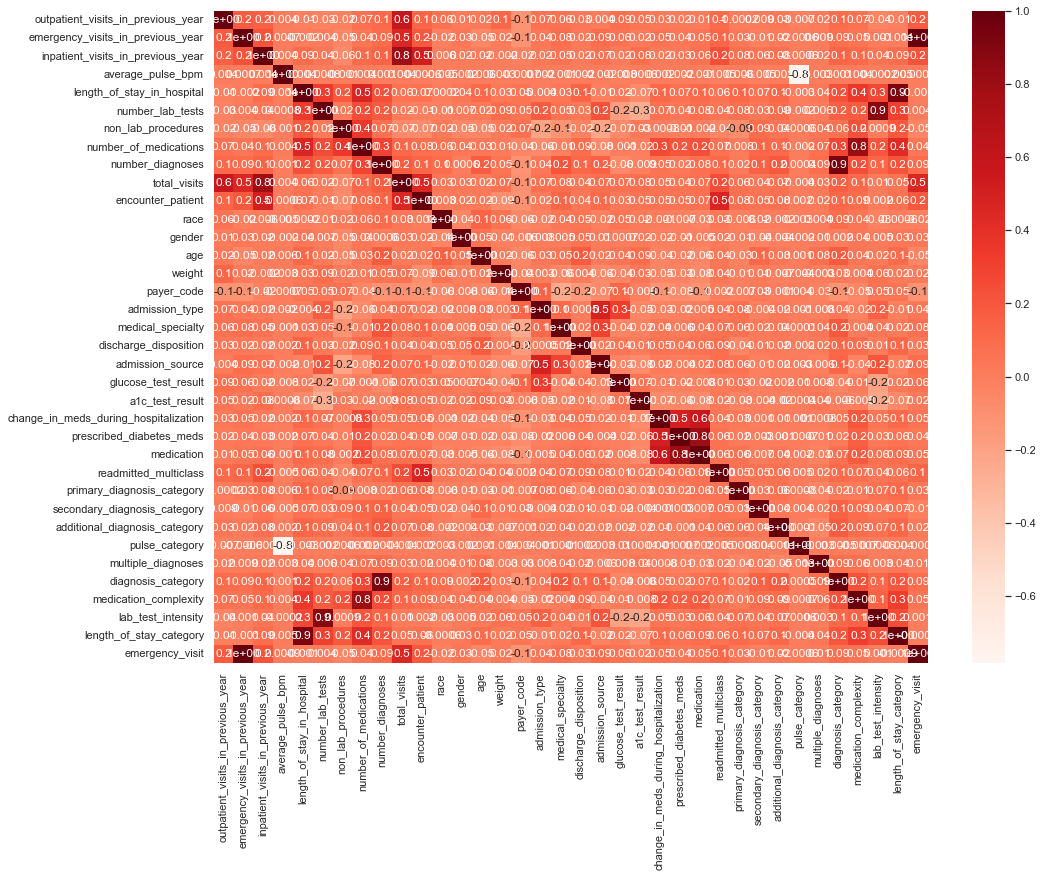

In [415]:
cor_spearman = train_combinedm.corr(method ='spearman')
cor_spearman#use this correlation method due to pearson assumptions

def cor_heatmap(cor):
    plt.figure(figsize=(16,12))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
cor_heatmap(cor_spearman)
#drop total visits
#drop medication
#drop predescribed meds
#drop change in meds during hospitalization

In [416]:
train_combinedm.drop(columns = [  'readmitted_multiclass',
                       ], inplace=True)#we manteined only to check correlation among other variables

In [417]:
val_combinedm.drop(columns = [  'readmitted_multiclass',
                       ], inplace=True)

In [418]:
train_combinedm

,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,total_visits,...,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,pulse_category,multiple_diagnoses,diagnosis_category,medication_complexity,lab_test_intensity,length_of_stay_category,emergency_visit
0,0.0,0.0,2.0,0.692308,-0.50,0.153846,-0.5,0.5,0.000000,1.0,...,0.616601,0.503885,0.626777,0.569758,0.57313,0.624003,0.621113,0.591969,0.530963,0.543871
1,0.0,0.0,0.0,0.717949,2.50,1.038462,-0.5,1.0,0.333333,0.0,...,0.563914,0.534170,0.563929,0.569758,0.57313,0.624003,0.621113,0.591969,0.624764,0.543871
2,0.0,0.0,1.0,-0.153846,0.50,0.615385,0.0,0.7,-0.666667,0.5,...,0.595254,0.615260,0.502883,0.575820,0.57313,0.519300,0.621113,0.591969,0.606440,0.543871
3,0.0,0.0,1.0,-0.487179,0.50,0.153846,0.5,-0.6,-1.000000,0.5,...,0.595254,0.586197,0.576030,0.575820,0.57313,0.519300,0.549269,0.591969,0.606440,0.543871
4,1.0,0.0,0.0,0.666667,0.50,0.115385,0.0,0.0,0.333333,0.5,...,0.473582,0.589041,0.576030,0.569758,0.57313,0.624003,0.549269,0.591969,0.606440,0.543871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64108,3.0,1.0,1.0,0.923077,0.00,0.500000,-0.5,1.1,0.333333,2.5,...,0.555521,0.518399,0.576030,0.569758,0.57313,0.624003,0.621113,0.591969,0.606440,0.799526
64109,0.0,1.0,0.0,-0.256410,0.75,0.269231,0.0,0.3,0.333333,0.5,...,0.580119,0.534170,0.502883,0.575820,0.57313,0.624003,0.621113,0.591969,0.606440,0.799526
64110,0.0,0.0,0.0,-0.051282,1.25,-0.923077,-0.5,-0.6,-0.666667,0.0,...,0.450068,0.579345,0.561833,0.575820,0.57313,0.519300,0.549269,0.516848,0.624764,0.543871
64111,0.0,2.0,2.0,0.948718,0.25,-0.730769,-0.5,0.9,0.333333,2.0,...,0.580119,0.587605,0.502883,0.569758,0.57313,0.624003,0.621113,0.559696,0.606440,0.799526


In [419]:
#RFE LR

In [420]:
# Number of features
nof_list = np.arange(1, 10)

# Variable to store the optimum features
nof = 0

train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)  # Use 'multinomial' for multiclass
    
    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled2, y_train2)
    X_val_rfe = rfe.transform(X_val_num_scaled2)
    
    model.fit(X_train_rfe, y_train2)
    
    # Storing results on training data
    train_predictions = model.predict(X_train_rfe)
    train_score = f1_score(y_train2, train_predictions, average='weighted')
    train_score_list.append(train_score)
    
    # Storing results on validation data
    val_predictions = model.predict(X_val_rfe)
    val_score = f1_score(y_val2, val_predictions, average='weighted')
    val_score_list.append(val_score)

# Find the optimum number of features
optimal_nof = nof_list[np.argmax(val_score_list)]



In [421]:
high_score = 0

if val_score >= high_score:
    high_score = val_score
    nof = nof_list[n]
    # Adding mention of variables to keep
    features_to_select = pd.Series(rfe.support_, index=X_train_num_scaled2.columns)
    
print("Optimal number of features:", optimal_nof)
print("Weighted F1 score with optimal features on validation set:", max(val_score_list))
#mantain more features than in binary classification

Optimal number of features: 3
Weighted F1 score with optimal features on validation set: 0.4362738313217307


In [422]:
rfe = RFE(estimator=model, n_features_to_select =3)

In [423]:
X_rfe = rfe.fit_transform(X = X_train_num_scaled2, y =y_train2)



In [424]:
X_train_num_scaled2.columns

Index(['outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'average_pulse_bpm',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'total_visits',
       'encounter_patient'],
      dtype='object')

In [425]:
rfe.support_



array([False,  True, False, False, False, False, False, False,  True,
       False,  True])

In [426]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled2.columns)
selected_features

outpatient_visits_in_previous_year    False
emergency_visits_in_previous_year      True
inpatient_visits_in_previous_year     False
average_pulse_bpm                     False
length_of_stay_in_hospital            False
number_lab_tests                      False
non_lab_procedures                    False
number_of_medications                 False
number_diagnoses                       True
total_visits                          False
encounter_patient                      True
dtype: bool

In [427]:
#LASSO

In [428]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()


reg = LassoCV()


reg.fit(train_combinedm, df_y_train2)

coef = pd.Series(reg.coef_, index = train_combinedm.columns)
coef

C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


outpatient_visits_in_previous_year       0.011538
emergency_visits_in_previous_year       -0.005924
inpatient_visits_in_previous_year        0.009261
average_pulse_bpm                       -0.004980
length_of_stay_in_hospital               0.007296
number_lab_tests                         0.019475
non_lab_procedures                      -0.011992
number_of_medications                   -0.001463
number_diagnoses                         0.054155
total_visits                             0.000000
encounter_patient                        0.135604
race                                     0.000000
gender                                   0.000000
age                                      0.109600
weight                                   0.731929
payer_code                               0.000000
admission_type                           0.000000
medical_specialty                        0.035619
discharge_disposition                    0.867433
admission_source                         0.213415


In [429]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
coef.sort_values()
#drop


Lasso picked 21 variables and eliminated the other 14 variables


non_lab_procedures                      -0.011992
emergency_visits_in_previous_year       -0.005924
average_pulse_bpm                       -0.004980
number_of_medications                   -0.001463
diagnosis_category                      -0.000000
change_in_meds_during_hospitalization    0.000000
medication                               0.000000
length_of_stay_category                  0.000000
admission_type                           0.000000
payer_code                               0.000000
pulse_category                           0.000000
multiple_diagnoses                       0.000000
a1c_test_result                          0.000000
race                                     0.000000
glucose_test_result                      0.000000
total_visits                             0.000000
lab_test_intensity                       0.000000
gender                                   0.000000
length_of_stay_in_hospital               0.007296
inpatient_visits_in_previous_year        0.009261


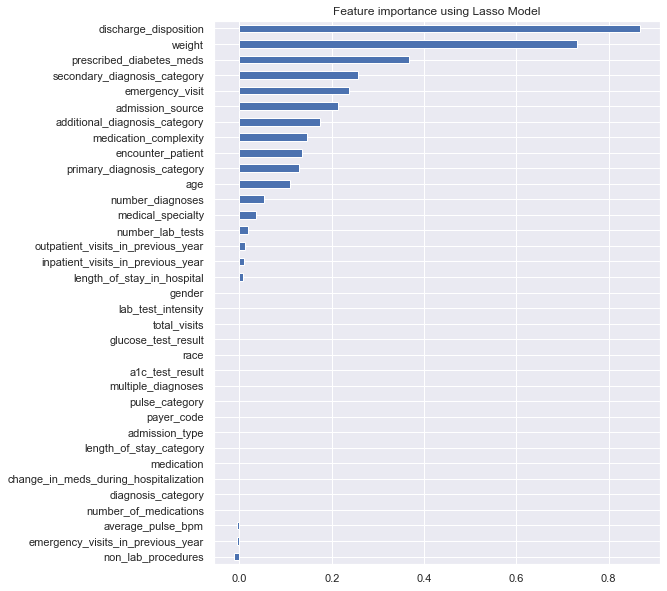

In [430]:
plot_importance(coef,'Lasso')

In [431]:
selector = sklearn.feature_selection.mutual_info_classif(
   train_combinedm,
    df_y_train2,
    discrete_features='auto',
    n_neighbors=18,
    copy=True,
    random_state=None)
selector
columns = list(train_combinedm.columns)
final_selector = pd.DataFrame({'Variable': columns, 'Value': selector})
final_selector



C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Variable,Value
0,outpatient_visits_in_previous_year,0.006518
1,emergency_visits_in_previous_year,0.009019
2,inpatient_visits_in_previous_year,0.032073
3,average_pulse_bpm,0.000000
4,length_of_stay_in_hospital,0.001792
5,number_lab_tests,0.001787
6,non_lab_procedures,0.001687
7,number_of_medications,0.004560
8,number_diagnoses,0.006057
9,total_visits,0.031308


In [432]:
#variables that have no influence on the target
selected_columns = final_selector[final_selector['Value'] < 0.001]['Variable'].tolist()

print("Columns with Value < 0.001:")
print(selected_columns)

Columns with Value < 0.001:
['average_pulse_bpm', 'race', 'payer_code', 'change_in_meds_during_hospitalization', 'pulse_category', 'lab_test_intensity', 'length_of_stay_category']


In [433]:
#for the multiclass target the models are not so selective about the features that we need for the predictions

# Drops After Feature Selection Multiclass

In [434]:
train_combinedm.drop(columns = [ 'pulse_category', 'diagnosis_category', 'lab_test_intensity', 'length_of_stay_category', 'number_of_medications', 'total_visits'], inplace=True)

In [435]:
val_combinedm.drop(columns = [ 'pulse_category', 'diagnosis_category', 'lab_test_intensity', 'length_of_stay_category', 'number_of_medications', 'total_visits'], inplace=True)

In [436]:
train_combinedm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64113 entries, 0 to 64112
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   outpatient_visits_in_previous_year     64113 non-null  float64
 1   emergency_visits_in_previous_year      64113 non-null  float64
 2   inpatient_visits_in_previous_year      64113 non-null  float64
 3   average_pulse_bpm                      64113 non-null  float64
 4   length_of_stay_in_hospital             64113 non-null  float64
 5   number_lab_tests                       64113 non-null  float64
 6   non_lab_procedures                     64113 non-null  float64
 7   number_diagnoses                       64113 non-null  float64
 8   encounter_patient                      64113 non-null  float64
 9   race                                   64113 non-null  float64
 10  gender                                 64113 non-null  float64
 11  ag

In [437]:
#we search for other techniques to handle imbalaced data sets and we find out class weights

In [438]:
#Class weights in machine learning models are used to assign different levels of importance to different classes. This is particularly useful in situations where the classes are imbalanced, meaning that some classes have significantly fewer instances than others. By assigning appropriate class weights, you can help the model to better handle the imbalanced distribution of classes during training.

In [439]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)#to balance the inbalanced classes
clf.fit(train_combinedm,y_train2)#Unlike resampling techniques (undersampling, oversampling, SMOTE), class weights do not require altering the size of the dataset through duplication or removal of instances. This can be beneficial in scenarios where maintaining the original distribution of instances is crucial.


RandomForestClassifier(class_weight='balanced', random_state=42)

# Resampling in Multiclass (Undersample)

In [440]:
#We performed the undersampling
# Desired number of samples for each class, adjusted many times
desired_class_samples = {
    'No':  5000,
    '>30 days':  5000,
    '<30 days':  5000
}

# Initialize RandomUnderSampler with custom parameters
rus = RandomUnderSampler(sampling_strategy=desired_class_samples, random_state=42, replacement=True)

# Fit and transform the training data
X_train_resampled2, y_train_resampled2 = rus.fit_resample(train_combinedm, y_train2)

# Display the count of samples for each class
print(y_train_resampled2.value_counts())


<30 days    5000
>30 days    5000
No          5000
Name: readmitted_multiclass, dtype: int64


In [441]:
#X_train2 =  train_combinedm
#Y_train2 =  y_train2
X_train2 = X_train_resampled2
Y_train2 = y_train_resampled2

# Models Multiclass W Resampling

## Optimized KNeighbors

In [442]:
#param_grid = {
#    'n_neighbors': [3, 5, 7, 9, 11],
#    'weights': ['uniform', 'distance'],
#    'metric': ['euclidean', 'manhattan', 'minkowski']
#}

#modelKNN2 = KNeighborsClassifier(algorithm='kd_tree')

#grid_search = GridSearchCV(modelKNN2, param_grid, cv=5, scoring='f1_weighted')

#grid_search.fit(X_train2, Y_train2)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_

#print("Best Parameters:", best_params)
#print("Best Score:", best_score)

#best_model = grid_search.best_estimator_

### Create KNeighbors Classifier with the best parameters

In [443]:
# Create a KNeighborsClassifier with KD-tree
knn_model2 = KNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=11, weights='distance')

# Fit the model to the training data
knn_model2.fit(X_train2, Y_train2)

# Make predictions on the training set
y_train_pred = knn_model2.predict(X_train2)

# Calculate F1 score on the training set
f1_train = f1_score(Y_train2, y_train_pred, average='weighted')
print(f"F1 Score on Training Set: {f1_train}")

# Make predictions on the validation set
y_pred = knn_model2.predict(val_combinedm)

# Calculate F1 score on the validation set
f1 = f1_score(y_val2, y_pred, average='weighted')
print(f"F1 Score on Validation Set: {f1}")

F1 Score on Training Set: 1.0
F1 Score on Validation Set: 0.48690212150005197


In [444]:
print('----------------------- TRAIN -----------------------')
print(classification_report(Y_train2, y_train_pred))

print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val2, y_pred))

----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

    <30 days       1.00      1.00      1.00      5000
    >30 days       1.00      1.00      1.00      5000
          No       1.00      1.00      1.00      5000

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

    <30 days       0.18      0.28      0.22       795
    >30 days       0.42      0.25      0.31      2488
          No       0.61      0.70      0.66      3840

    accuracy                           0.50      7123
   macro avg       0.40      0.41      0.40      7123
weighted avg       0.50      0.50      0.49      7123



## Logistic Regression

In [445]:
# Create a logistic regression model
logreg = LogisticRegression(random_state=42, max_iter = 400)

# Fit the model on the training data
logreg.fit(X_train2,Y_train2)

# Predictions on the training set
train_predictions = logreg.predict(X_train2)

# Predictions on the validation set
validation_predictions = logreg.predict(val_combinedm)

# Calculate F1 score on the training set
f1_train = f1_score(Y_train2, train_predictions, average='weighted')
print(f"F1 Score on Training Set: {f1_train}")

# Calculate F1 score on the validation set
f1 = f1_score(y_val2, validation_predictions, average='weighted')
print(f"F1 Score on Validation Set: {f1}")

C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score on Training Set: 0.5029083777420061
F1 Score on Validation Set: 0.46546079973020693


In [446]:
print('----------------------- TRAIN -----------------------')
print(classification_report(Y_train2, train_predictions))
print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val2, validation_predictions))#by adjusting the classes with undersampling we obtain better f1s

----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

    <30 days       0.52      0.41      0.46      5000
    >30 days       0.47      0.35      0.40      5000
          No       0.55      0.81      0.65      5000

    accuracy                           0.52     15000
   macro avg       0.51      0.52      0.50     15000
weighted avg       0.51      0.52      0.50     15000

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

    <30 days       0.24      0.15      0.18       795
    >30 days       0.57      0.10      0.18      2488
          No       0.58      0.93      0.71      3840

    accuracy                           0.55      7123
   macro avg       0.46      0.39      0.36      7123
weighted avg       0.54      0.55      0.47      7123



## Optimized Decision Tree

In [447]:
#param_dist = {
#    'criterion': ['gini', 'entropy'],
#    'splitter': ['best', 'random'],
#    'max_depth': [None, 2, 5],
#    'min_samples_split': [2, 5],
#    'min_samples_leaf': [1, 2],
#    'max_features': [None, 'sqrt'],
#    'max_leaf_nodes': [None, 10, 20],
#    'min_impurity_decrease': [0.0, 0.1]
#}

#dt_classifier = DecisionTreeClassifier()

#random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1_weighted', random_state=42)
#random_search.fit(X_train2, Y_train2)

#best_params = random_search.best_params_
#best_dt_classifier = DecisionTreeClassifier(**best_params)

#best_dt_classifier.fit(X_train2, Y_train2)
#y_train_pred = best_dt_classifier.predict(X_train2)
#y_val_pred = best_dt_classifier.predict(val_combinedm)

#accuracy = accuracy_score(y_val2, y_val_pred)
#print("Validation Accuracy: {:.4f}".format(accuracy))

#f1_train = f1_score(Y_train2, y_train_pred, average='weighted')
#print("Train F1 Score: {:.4f}".format(f1_train))

#f1_val = f1_score(y_val2, y_val_pred, average='weighted')
#print("Validation F1 Score: {:.4f}".format(f1_val))

#print("Best Parameters:", best_params)

### Create Decision Tree with the best parameters

In [448]:
modelDT3 = DecisionTreeClassifier(splitter= 'best', 
                                  min_samples_split= 5, 
                                  min_samples_leaf= 1, 
                                  min_impurity_decrease= 0.0, 
                                  max_leaf_nodes= 10, 
                                  max_features= None, 
                                  max_depth= 5, 
                                  criterion= 'entropy'
                                 )
modelDT3.fit(X_train2, Y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10,
                       min_samples_split=5)

In [449]:
y_train_pred = modelDT3.predict(X_train2)
y_val_pred = modelDT3.predict(val_combinedm)

f1_train = f1_score(Y_train2, y_train_pred, average='weighted')
print("Train F1 Score: {:.4f}".format(f1_train))

f1_val = f1_score(y_val2, y_val_pred, average='weighted')
print("Validation F1 Score: {:.4f}".format(f1_val))

Train F1 Score: 0.4990
Validation F1 Score: 0.5383


In [450]:
print(classification_report(Y_train2, modelDT3.predict(X_train2)))

              precision    recall  f1-score   support

    <30 days       0.54      0.31      0.39      5000
    >30 days       0.41      0.49      0.45      5000
          No       0.59      0.73      0.65      5000

    accuracy                           0.51     15000
   macro avg       0.52      0.51      0.50     15000
weighted avg       0.52      0.51      0.50     15000



In [451]:
print(classification_report(y_val2, modelDT3.predict(val_combinedm)))

              precision    recall  f1-score   support

    <30 days       0.44      0.03      0.06       795
    >30 days       0.46      0.45      0.45      2488
          No       0.63      0.76      0.69      3840

    accuracy                           0.57      7123
   macro avg       0.51      0.41      0.40      7123
weighted avg       0.55      0.57      0.54      7123



## Gaussian NB

In [452]:
# Gaussian NB

# Step 1: Create the Naive Bayes model
naive_bayes_model2 = GaussianNB()

# Step 2: Fit the model on the training data
naive_bayes_model2.fit(X_train2, Y_train2)

# Step 3: Predict on the validation set
y_val_pred = naive_bayes_model2.predict(val_combinedm)

# Step 4: Predict on the training set
y_train_pred = naive_bayes_model2.predict(X_train2)

f1_train = f1_score(Y_train2, y_train_pred, average='weighted')
print("Train F1 Score: {:.4f}".format(f1_train))

f1_val = f1_score(y_val2, y_val_pred, average='weighted')
print("Validation F1 Score: {:.4f}".format(f1_val))

Train F1 Score: 0.4191
Validation F1 Score: 0.5120


In [453]:
print('----------------------- TRAIN -----------------------')
print(classification_report(Y_train2,  y_train_pred))
print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val2, y_val_pred))

----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

    <30 days       0.53      0.22      0.31      5000
    >30 days       0.44      0.31      0.37      5000
          No       0.44      0.83      0.58      5000

    accuracy                           0.45     15000
   macro avg       0.47      0.45      0.42     15000
weighted avg       0.47      0.45      0.42     15000

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

    <30 days       0.27      0.15      0.19       795
    >30 days       0.51      0.23      0.32      2488
          No       0.60      0.86      0.70      3840

    accuracy                           0.56      7123
   macro avg       0.46      0.41      0.41      7123
weighted avg       0.53      0.56      0.51      7123



## Neural Networks

In [454]:
modelNN2 = MLPClassifier(max_iter=400).fit(X_train2, Y_train2)
labels_train_nn = modelNN2.predict(X_train2)
labels_val_nn = modelNN2.predict(val_combinedm)

In [455]:
# Calculate F1 score for the training set
f1_train = f1_score(Y_train2, labels_train_nn, average='weighted')

# Calculate F1 score for the validation set
f1_val = f1_score(y_val2, labels_val_nn, average='weighted')

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.5678520098176906
Validation F1: 0.5130886273529112


## Optimized Neural Network

In [456]:
# Step 1: Define your neural network model
#def create_model(hidden_layer_sizes=(100,), activation='relu', solver='adam'):
#    return MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver)

# Step 2: Create a parameter grid
#param_grid = {
#    'hidden_layer_sizes': [(1,), (8,), (10,), (20, 10)],
#    'activation': ['relu', 'tanh'],
#    'solver': ['adam', 'sgd']
#}

# Step 3: Choose evaluation metric
#f1_scorer = make_scorer(f1_score, average='weighted')

# Step 4: GridSearchCV
#grid_search = GridSearchCV(estimator=create_model(),
#                           param_grid=param_grid,
#                           #scoring=f1_scorer,
#                           cv=3)  # You can adjust the number of cross-validation folds

# Step 5: Fit the model
#grid_search.fit(X_train2, Y_train2)

#print("Best Parameters: ", grid_search.best_params_)

#best_model = grid_search.best_estimator_

#labels_train_nn = best_model.predict(X_train2)
#labels_val_nn = best_model.predict(val_combinedm)

# Calculate F1 score for the training set
#f1_train = f1_score(Y_train2, labels_train_nn, average='weighted')

# Calculate F1 score for the validation set
#f1_val = f1_score(y_val2, labels_val_nn, average='weighted')

# Print the F1 scores
#print('Train F1:', f1_train)
#print('Validation F1:', f1_val)

### Create Neural Network with the best parameters

In [457]:
model_best2 = MLPClassifier(hidden_layer_sizes=(20, 10), activation='relu', solver='adam', max_iter=400).fit(X_train2, Y_train2)

labels_train_nn = model_best2.predict(X_train2)
labels_val_nn = model_best2.predict(val_combinedm)

# Calculate F1 score for the training set
f1_train = f1_score(Y_train2, labels_train_nn, average='weighted')

# Calculate F1 score for the validation set
f1_val = f1_score(y_val2, labels_val_nn, average='weighted')

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)
#'weighted': Calculate metrics for each label and average them weighted by the number of true instances for each label.

Train F1: 0.5313565959742991
Validation F1: 0.5076146273446276


In [458]:
print('----------------------- TRAIN -----------------------')
print(classification_report(Y_train2,  labels_train_nn))
print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val2, labels_val_nn))

----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

    <30 days       0.53      0.52      0.53      5000
    >30 days       0.49      0.32      0.39      5000
          No       0.59      0.80      0.68      5000

    accuracy                           0.55     15000
   macro avg       0.54      0.55      0.53     15000
weighted avg       0.54      0.55      0.53     15000

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

    <30 days       0.22      0.27      0.25       795
    >30 days       0.49      0.20      0.28      2488
          No       0.62      0.83      0.71      3840

    accuracy                           0.55      7123
   macro avg       0.44      0.43      0.41      7123
weighted avg       0.53      0.55      0.51      7123



## Random Forest

In [459]:
modelRF2 = RandomForestClassifier(bootstrap=True, random_state=42)
modelRF2 = modelRF2.fit(X_train2, Y_train2)

In [460]:
labels_train_rf2 = modelRF2.predict(X_train2)
labels_val_rf2 = modelRF2.predict(val_combinedm)

In [461]:
# Assuming the positive class
pos_label = 'Yes'

# Calculate F1 score for the training set
f1_train = f1_score(Y_train2, labels_train_rf2, average='weighted')

# Calculate F1 score for the validation set
f1_val = f1_score(y_val2, labels_val_rf2, average='weighted')

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 1.0
Validation F1: 0.5371440410287527


## Ensemble Learning

## Stacking

In [462]:
# Define base learners
base_learners = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(random_state=42))
]

# Define meta-model
meta_model = LogisticRegression(random_state=42)

# Create stacking model
stacking_model2 = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Fit and predict
stacking_model2.fit(X_train2, Y_train2)

C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('svm', SVC(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [463]:
labels_train_els2 = stacking_model2.predict(X_train2)
labels_val_els2 = stacking_model2.predict(val_combinedm)

# Calculate F1 score for the training set
f1_train = f1_score(Y_train2, labels_train_els2, average='weighted')

# Calculate F1 score for the validation set
f1_val = f1_score(y_val2, labels_val_els2, average='weighted')

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.8590024418751356
Validation F1: 0.4878803818236682


## Boosting

### AdaBoost

In [464]:
# AdaBoost
ada_boost_model2 = AdaBoostClassifier(random_state=42)
ada_boost_model2.fit(X_train2, Y_train2)

AdaBoostClassifier(random_state=42)

In [465]:
labels_train_elab2 = ada_boost_model2.predict(X_train2)
labels_val_elab2 = ada_boost_model2.predict(val_combinedm)

# Calculate F1 score for the training set
f1_train = f1_score(Y_train2, labels_train_elab2, average='weighted')

# Calculate F1 score for the validation set
f1_val = f1_score(y_val2, labels_val_elab2, average='weighted')

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.5112727646963311
Validation F1: 0.4716279588190557


### Optimizing the AdaBoost Model

In [466]:
#param_grid_ada = {
#    'n_estimators': [50, 100, 200],
#    'learning_rate': [0.01, 0.1, 0.5, 1.0],
#    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
#}

#ada_boost_model2 = AdaBoostClassifier(random_state=42)

#random_search = RandomizedSearchCV(ada_boost_model2, param_distributions=param_grid_ada, scoring='f1_weighted', n_iter=10, cv=5)
#random_search.fit(X_train2, Y_train2)

#print("Best Parameters: ", random_search.best_params_)
#print("Best Score: {:.4f}".format(random_search.best_score_))

#best_params = random_search.best_params_
#best_model = random_search.best_estimator_

#y_val_pred = best_model.predict(val_combinedm)
#accuracy = accuracy_score(y_val2, y_val_pred)
#print("Validation Accuracy: {:.4f}".format(accuracy))
#f1_val = f1_score(y_val2, y_val_pred, average='weighted')
#print("Validation F1 Score: {:.4f}".format(f1_val))

### Create AdaBoost Classifier model with the best parameters

In [467]:
ada_boost_best_model = AdaBoostClassifier(random_state=42, n_estimators= 100, learning_rate= 0.5, estimator= DecisionTreeClassifier(max_depth=2))
ada_boost_best_model.fit(X_train2, Y_train2)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [468]:
labels_train_best_elab2 = ada_boost_best_model.predict(X_train2)
labels_val_best_elab2 = ada_boost_best_model.predict(val_combinedm)

# Calculate F1 score for the training set
f1_train = f1_score(Y_train2, labels_train_best_elab2, average='weighted')

# Calculate F1 score for the validation set
f1_val = f1_score(y_val2, labels_val_best_elab2, average='weighted')

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.5523125640231674
Validation F1: 0.5264356005247303


### Gradient Boosting

In [469]:
gradient_boost_model2 = GradientBoostingClassifier(random_state=42)
gradient_boost_model2.fit(X_train2, Y_train2)

GradientBoostingClassifier(random_state=42)

In [470]:
labels_train_elgb2 = gradient_boost_model2.predict(X_train2)
labels_val_elgb2 = gradient_boost_model2.predict(val_combinedm)

# Calculate F1 score for the training set
f1_train = f1_score(Y_train2, labels_train_elgb2, average='weighted')

# Calculate F1 score for the validation set
f1_val = f1_score(y_val2, labels_val_elgb2, average='weighted')

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.5774071586429388
Validation F1: 0.526153529239756


### Optimizing the Gradient Boosting Model

In [471]:
#param_grid_gradient_boosting = {
#    'n_estimators': [100, 200, 300],
#    'learning_rate': [0.01, 0.1, 0.2],
#    'max_depth': [3, 4, 5],
#    'min_samples_split': [2, 3, 4],
#    'min_samples_leaf': [1, 2, 3],
#    'subsample': [0.8, 0.9, 1.0],
#    'max_features': ['sqrt', 'log2', None]
#}

#gradient_boosting_model2 = GradientBoostingClassifier(random_state=42)

#random_search = RandomizedSearchCV(gradient_boosting_model2, param_distributions=param_grid_gradient_boosting, scoring='f1_weighted', n_iter=10, cv=5)
#random_search.fit(X_train2, Y_train2)

#print("Best Parameters: ", random_search.best_params_)
#print("Best Score: {:.4f}".format(random_search.best_score_))

#best_params = random_search.best_params_
#best_model = random_search.best_estimator_

#y_val_pred = best_model.predict(val_combinedm)
#accuracy = accuracy_score(y_val2, y_val_pred)
#print("Validation Accuracy: {:.4f}".format(accuracy))
#f1_val = f1_score(y_val2, y_val_pred, average='weighted')
#print("Validation F1 Score: {:.4f}".format(f1_val))

### Create Gradient Boosting Classifier model with the best parameters

In [472]:
gradient_boost_best_model2 = GradientBoostingClassifier(random_state=42, subsample= 0.9, n_estimators= 300, min_samples_split= 4, min_samples_leaf= 1, max_features= 'log2', max_depth= 5, learning_rate= 0.2)
gradient_boost_best_model2.fit(X_train2, Y_train2)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_features='log2',
                           min_samples_split=4, n_estimators=300,
                           random_state=42, subsample=0.9)

In [473]:
labels_train_best_elgb2 = gradient_boost_best_model2.predict(X_train2)
labels_val_best_elgb2 = gradient_boost_best_model2.predict(val_combinedm)

# Calculate F1 score for the training set
f1_train = f1_score(Y_train2, labels_train_best_elgb2, average='weighted')

# Calculate F1 score for the validation set
f1_val = f1_score(y_val2, labels_val_best_elgb2, average='weighted')

# Print the F1 scores
print('Train F1:', f1_train)
print('Validation F1:', f1_val)

Train F1: 0.8604021979543681
Validation F1: 0.5267622535223906


# F1 Scores with Undersample Multiclass

Note: values may be different (while still close) in the cells output, since the table was made with 1 iteration and the resampling may change scores a bit

| Model                           | Average F1 Score (Train) | Average F1 Score (Validation) |
|---------------------------------|------------|------------|
| Bayes Classifier                |  0.4191    | 0.5120    |
| Logistic Regression             |  0.5031    | 0.4654    |
| K-Nearest Neighbours Classifier |  1.0       | 0.4869    |
| Neural Networks                 |  0.5252    | 0.4990    |
| Decision Trees                  |  0.4990    | 0.5383    |
| Random Forest                   |  1.0       | 0.5371    |
| Stacking Ensemble               |  0.8590    | 0.4878    |
| Ada Boosting Ensemble           |  0.5523    | 0.5264    |
| Gradient Boosting Ensemble      |  0.8604    | 0.5268    |


# Test

In [474]:
#used for binary and multiclass

In [475]:
test = pd.read_csv('C:/Users/Utilizador/OneDrive/Ambiente de Trabalho/ML/test.csv')

encounter_ids = test['encounter_id']

In [476]:
test = test.set_index('encounter_id', drop=False)

In [477]:
# replace the ? with NaNs in order to correctly assess the features
test = test.replace('?',np.nan)
test = test.replace('Unknown/Invalid',np.nan)
test= test.replace('[]',np.nan)

# check how many NAs we have in each column
test.isna().sum()

encounter_id                                 0
country                                      0
patient_id                                   0
race                                      2191
gender                                       0
age                                       1531
weight                                   29579
payer_code                               12055
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            1585
medical_specialty                        15027
average_pulse_bpm                            0
discharge_disposition                     1101
admission_source                          2063
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            5
secondary_dia

In [478]:


numerical_features = ['outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'average_pulse_bpm',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses']

non_numerical_features = test.columns.drop(numerical_features).to_list()

In [479]:


test['payer_code'] = test['payer_code'].fillna('No Insurance')

test['medical_specialty'].fillna('Unknown', inplace = True)
test['weight'].fillna('Unknown', inplace = True)

test['admission_type'].fillna('Not Mapped', inplace = True)
test['admission_source'].fillna('Not Mapped', inplace = True)



test['discharge_disposition'].fillna('Not Mapped', inplace = True)


test['glucose_test_result'].fillna('Not Tested', inplace = True)
test['a1c_test_result'].fillna('Not Tested', inplace = True)

test['medication'].fillna('No medication', inplace = True)

#diagnosis
test['primary_diagnosis'].fillna('No Diagnosis', inplace = True)
test['secondary_diagnosis'].fillna('No Diagnosis', inplace = True)
test['additional_diagnosis'].fillna('No Diagnosis', inplace = True)

#how can i do target encoding here if i dont have a target

In [480]:
test.isna().sum()

encounter_id                                0
country                                     0
patient_id                                  0
race                                     2191
gender                                      0
age                                      1531
weight                                      0
payer_code                                  0
outpatient_visits_in_previous_year          0
emergency_visits_in_previous_year           0
inpatient_visits_in_previous_year           0
admission_type                              0
medical_specialty                           0
average_pulse_bpm                           0
discharge_disposition                       0
admission_source                            0
length_of_stay_in_hospital                  0
number_lab_tests                            0
non_lab_procedures                          0
number_of_medications                       0
primary_diagnosis                           0
secondary_diagnosis               

In [481]:
test['primary_diagnosis_category'] = test['primary_diagnosis'].apply(map_to_category)
test['secondary_diagnosis_category'] = test['secondary_diagnosis'].apply(map_to_category)
test['additional_diagnosis_category'] = test['additional_diagnosis'].apply(map_to_category)

In [482]:
test

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,499502,USA,103232799,Caucasian,Male,[80-90),Unknown,HM,0,0,...,250,6,Not Tested,Not Tested,No,Yes,['metformin'],Diseases of the Respiratory System,Diseases of the Circulatory System,"Endocrine, Nutritional and Metabolic Diseases,..."
447319,447319,USA,93395304,Caucasian,Male,[20-30),Unknown,HM,0,0,...,794,7,>300,Not Tested,No,No,No medication,Other,Infectious and Parasitic Diseases,"Symptoms, Signs, and Ill-Defined Conditions"
309126,309126,USA,6281586,AfricanAmerican,Male,[30-40),Unknown,No Insurance,0,0,...,536,6,Not Tested,Not Tested,No,Yes,['insulin'],"Symptoms, Signs, and Ill-Defined Conditions",Other,Diseases of the Digestive SysAtem
181183,181183,USA,67381308,Caucasian,Male,[50-60),Unknown,BC,0,0,...,E884,9,Not Tested,Not Tested,Ch,Yes,"['metformin', 'glyburide', 'insulin']",Injury and Poisoning,Injury and Poisoning,External Causes of Injury and Supplemental Cla...
359339,359339,USA,71670204,Caucasian,Male,[60-70),Unknown,No Insurance,0,0,...,414,9,Not Tested,Not Tested,No,Yes,['metformin'],Diseases of the Genitourinary System,Diseases of the Circulatory System,Diseases of the Circulatory System
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451150,451150,USA,85707450,Caucasian,Male,[70-80),Unknown,HM,0,0,...,276,9,Not Tested,Not Tested,No,No,No medication,Diseases of the Genitourinary System,"Endocrine, Nutritional and Metabolic Diseases,...","Endocrine, Nutritional and Metabolic Diseases,..."
549298,549298,USA,328887,Caucasian,Male,[60-70),Unknown,No Insurance,0,0,...,276,9,Not Tested,Not Tested,No,Yes,['insulin'],Diseases of the Circulatory System,Other,"Endocrine, Nutritional and Metabolic Diseases,..."
327586,327586,USA,21915459,Caucasian,Female,[80-90),Unknown,No Insurance,0,0,...,250,6,Not Tested,Not Tested,No,Yes,['insulin'],Injury and Poisoning,Diseases of the Circulatory System,"Endocrine, Nutritional and Metabolic Diseases,..."


In [483]:
test['admission_type'] = test['admission_type'].replace('Not Available', 'Not Mapped')
test['admission_source'] = test['admission_source'].replace('Not Available', 'Not Mapped')

In [484]:
category_mapping = {
    'Caucasian': 'caucasian',
    'AfricanAmerican': 'not caucasian',
    'Hispanic': 'not caucasian',
    'Asian': 'not caucasian',
    'Other': 'not caucasian'
}
test['race'] = test['race'].replace(category_mapping)

In [485]:
category_mapping = {
    '[0-10)': 'child',
    '[10-20)': 'child',
    '[20-30)': 'Adult',
    '[30-40)': 'Adult',
    '[40-50)': 'Adult',
    '[50-60)': 'Middle Age',
    '[60-70)': 'Middle Age',
    '[70-80)': 'Old',
    '[80-90)': 'Old',
    '[90-100)':'Old'
    
}
test['age'] = test['age'].replace(category_mapping)

In [486]:
test['age'].value_counts()

Old           12989
Middle Age    11440
Adult          4336
child           234
Name: age, dtype: int64

In [487]:
def set_insurance2(value):
    if value != 'No Insurance':
        return 'Insurance'
    else:
        return value

# Apply the custom function to 'payer_code' column
test['payer_code'] = test['payer_code'].apply(set_insurance2)

In [488]:
test

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,499502,USA,103232799,caucasian,Male,Old,Unknown,Insurance,0,0,...,250,6,Not Tested,Not Tested,No,Yes,['metformin'],Diseases of the Respiratory System,Diseases of the Circulatory System,"Endocrine, Nutritional and Metabolic Diseases,..."
447319,447319,USA,93395304,caucasian,Male,Adult,Unknown,Insurance,0,0,...,794,7,>300,Not Tested,No,No,No medication,Other,Infectious and Parasitic Diseases,"Symptoms, Signs, and Ill-Defined Conditions"
309126,309126,USA,6281586,not caucasian,Male,Adult,Unknown,No Insurance,0,0,...,536,6,Not Tested,Not Tested,No,Yes,['insulin'],"Symptoms, Signs, and Ill-Defined Conditions",Other,Diseases of the Digestive SysAtem
181183,181183,USA,67381308,caucasian,Male,Middle Age,Unknown,Insurance,0,0,...,E884,9,Not Tested,Not Tested,Ch,Yes,"['metformin', 'glyburide', 'insulin']",Injury and Poisoning,Injury and Poisoning,External Causes of Injury and Supplemental Cla...
359339,359339,USA,71670204,caucasian,Male,Middle Age,Unknown,No Insurance,0,0,...,414,9,Not Tested,Not Tested,No,Yes,['metformin'],Diseases of the Genitourinary System,Diseases of the Circulatory System,Diseases of the Circulatory System
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451150,451150,USA,85707450,caucasian,Male,Old,Unknown,Insurance,0,0,...,276,9,Not Tested,Not Tested,No,No,No medication,Diseases of the Genitourinary System,"Endocrine, Nutritional and Metabolic Diseases,...","Endocrine, Nutritional and Metabolic Diseases,..."
549298,549298,USA,328887,caucasian,Male,Middle Age,Unknown,No Insurance,0,0,...,276,9,Not Tested,Not Tested,No,Yes,['insulin'],Diseases of the Circulatory System,Other,"Endocrine, Nutritional and Metabolic Diseases,..."
327586,327586,USA,21915459,caucasian,Female,Old,Unknown,No Insurance,0,0,...,250,6,Not Tested,Not Tested,No,Yes,['insulin'],Injury and Poisoning,Diseases of the Circulatory System,"Endocrine, Nutritional and Metabolic Diseases,..."


In [489]:
# Filter categories as in the training set
test['discharge_disposition'] = test['discharge_disposition'].apply(
    lambda x: x if x in categories_above_threshold_discharge else 'Other'
)

In [490]:
test['discharge_disposition'].value_counts()

Other                                                                                28012
Not Mapped                                                                            1411
Discharged/transferred to another rehab fac including rehab units of a hospital .      600
Expired                                                                                507
Name: discharge_disposition, dtype: int64

In [491]:
# Filter categories as in the training set
test['admission_source'] = test['admission_source'].apply(
    lambda x: x if x in categories_above_threshold_admission else 'Other'
)

In [492]:
test['admission_source'].value_counts()

 Emergency Room        17175
 Physician Referral     8887
Other                   2405
Not Mapped              2063
Name: admission_source, dtype: int64

In [493]:
# Identify lines containing the word 'Insulin' and assign them to 'Insulin' category
test.loc[test['medication'].str.contains('No medication', case=False), 'medication'] = 'No medication'

#Lines classified as 'No Insulin'

no_insulin_no_medication_mask = ~test['medication'].isin(['Insulin', 'No medication'])

test.loc[no_insulin_no_medication_mask, 'medication'] = 'No Insulin'

In [494]:
# Filter categories as in the training set
test['primary_diagnosis_category'] = test['primary_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_primary else 'Other'
)

In [495]:
test['primary_diagnosis_category'].value_counts()

Other               28834
Neoplasms            1009
Mental Disorders      687
Name: primary_diagnosis_category, dtype: int64

In [496]:
# Filter categories as in the training set
test['secondary_diagnosis_category'] = test['secondary_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_secondary else 'Other'
)

In [497]:
test['secondary_diagnosis_category'].value_counts()

Other               28929
Mental Disorders      819
Neoplasms             782
Name: secondary_diagnosis_category, dtype: int64

In [498]:
# Filter categories as in the training set
test['additional_diagnosis_category'] = test['additional_diagnosis_category'].apply(
    lambda x: x if x in categories_above_threshold_additional else 'Other'
)

In [499]:
test['additional_diagnosis_category'].value_counts()

Other               29056
Mental Disorders      915
Neoplasms             559
Name: additional_diagnosis_category, dtype: int64

In [500]:
test.isna().sum()

encounter_id                                0
country                                     0
patient_id                                  0
race                                     2191
gender                                      0
age                                      1531
weight                                      0
payer_code                                  0
outpatient_visits_in_previous_year          0
emergency_visits_in_previous_year           0
inpatient_visits_in_previous_year           0
admission_type                              0
medical_specialty                           0
average_pulse_bpm                           0
discharge_disposition                       0
admission_source                            0
length_of_stay_in_hospital                  0
number_lab_tests                            0
non_lab_procedures                          0
number_of_medications                       0
primary_diagnosis                           0
secondary_diagnosis               

In [501]:
test['medical_specialty'] = test['medical_specialty'].replace({
    'Surgery-General': 'Surgery',
    'Surgery-Thoracic': 'Surgery',
    'Surgery-Vascular': 'Surgery',
    'Orthopedics-Reconstructive': 'Surgery',
    'Surgery-Neuro': 'Surgery',
    'Surgery-Cardiovascular/Thoracic': 'Surgery',
    'Surgery-Maxillofacial': 'Surgery',
    'Surgery-Cardiovascular': 'Surgery',
    'Surgery-Plastic': 'Surgery',
    'Surgery-Colon&Rectal': 'Surgery',
    'Surgery-Pediatric': 'Surgery',

    'Pediatrics': 'Pediatrics',
    'Pediatrics-Endocrinology': 'Pediatrics',
    'Pediatrics-CriticalCare': 'Pediatrics',
    'Pediatrics-Neurology': 'Pediatrics',
    'Pediatrics-Pulmonology': 'Pediatrics',
    'Pediatrics-EmergencyMedicine': 'Pediatrics',
    'Pediatrics-AllergyandImmunology': 'Pediatrics',
    'Pediatrics-Hematology-Oncology': 'Pediatrics',
    'Pediatrics-InfectiousDiseases': 'Pediatrics',
    'Pediatrics-Pediatric': 'Pediatrics',

    'InternalMedicine': 'Internal Medicine',
    'Hospitalist': 'Internal Medicine',

    'ObstetricsandGynecology': 'Obstetrics/Gynecology',
    'Gynecology': 'Obstetrics/Gynecology',
    'Obstetrics': 'Obstetrics/Gynecology',
    'Obsterics&Gynecology-GynecologicOnco': 'Obstetrics/Gynecology',

    'Cardiology': 'Cardiology',
    'Cardiology-Pediatric': 'Cardiology',

    'Radiologist': 'Radiology',
    'Radiology': 'Radiology',

    'Psychiatry': 'Psychiatry/Psychology',
    'Psychology': 'Psychiatry/Psychology',
    'Psychiatry-Child/Adolescent': 'Psychiatry/Psychology',

    '?': 'Unknown'
    
})

In [502]:
# Filter categories as in the training set
test['medical_specialty'] = test['medical_specialty'].apply(
    lambda x: x if x in categories_above_threshold_medical else 'Other'
)

In [503]:
test['medical_specialty'].value_counts()

Unknown                   15027
Internal Medicine          4362
Emergency/Trauma           2246
Family/GeneralPractice     2223
Surgery                    1910
Cardiology                 1638
Other                      1314
Nephrology                  477
Orthopedics                 446
Radiology                   337
Psychiatry/Psychology       290
Pulmonology                 260
Name: medical_specialty, dtype: int64

In [504]:
# Category of BPM considering its values
test['pulse_category'] = pd.cut(test['average_pulse_bpm'], bins=[0, 60, 100, float('inf')], labels=['Low', 'Normal', 'High'])

# Multiple or not
test['multiple_diagnoses'] = test['number_diagnoses'].apply(lambda x: 'Yes' if x > 1 else 'No')

# Define the bins and labels for the new categories related to the diagnosis number
bins = [0, 5, 8, float('inf')]
labels = ['Low Number', 'Medium Number', 'High Number']

# Create a new column 'diagnosis_category' based on the modified criteria
test['diagnosis_category'] = pd.cut(test['number_diagnoses'], bins=bins, labels=labels, right=False)

# Medication complexity, considering categories related to the number of medications
test['medication_complexity'] = pd.cut(test['number_of_medications'], bins=[0, 5, 15, 40, float('inf')],
                                       labels=['Low', 'Medium', 'High', 'Very high'])

# Lab Tests and Procedures
test['lab_test_intensity'] = pd.cut(test['number_lab_tests'], bins=[0, 20, 40, float('inf')],
                                     labels=['Low', 'Medium', 'High'])
# Define'length_of_stay_in_hospital'
bins = [0, 3, 7, float('inf')]  
labels = ['Short Stay', 'Medium Stay', 'Long Stay']
test['length_of_stay_category'] = pd.cut(test['length_of_stay_in_hospital'], bins=bins, labels=labels)

# Define binary variable for emergency visits
test['emergency_visit'] = test['emergency_visits_in_previous_year'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Create a new column 'total_visits' by summing the values of the three columns
test['total_visits'] = test['outpatient_visits_in_previous_year'] + test['emergency_visits_in_previous_year'] + test['inpatient_visits_in_previous_year']

# Create a new column 'encounter_patient' by counting the visits that the same patient made to the hospital (groupby count of patient_id's in the dataset)
test['encounter_patient'] = test.groupby('patient_id')['patient_id'].transform('count')

#add these new variables in feature selection
test.head()



,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,additional_diagnosis_category,pulse_category,multiple_diagnoses,diagnosis_category,medication_complexity,lab_test_intensity,length_of_stay_category,emergency_visit,total_visits,encounter_patient
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,499502,USA,103232799,caucasian,Male,Old,Unknown,Insurance,0,0,...,Other,High,Yes,Medium Number,Medium,High,Short Stay,No,0,1
447319,447319,USA,93395304,caucasian,Male,Adult,Unknown,Insurance,0,0,...,Other,High,Yes,Medium Number,Medium,High,Long Stay,No,1,2
309126,309126,USA,6281586,not caucasian,Male,Adult,Unknown,No Insurance,0,0,...,Other,Normal,Yes,Medium Number,Medium,High,Short Stay,No,0,1
181183,181183,USA,67381308,caucasian,Male,Middle Age,Unknown,Insurance,0,0,...,Other,High,Yes,High Number,High,High,Medium Stay,No,0,1
359339,359339,USA,71670204,caucasian,Male,Middle Age,Unknown,No Insurance,0,0,...,Other,High,Yes,High Number,Medium,High,Short Stay,No,0,1


In [505]:
test['emergency_visit'] = test['emergency_visit'].astype('object')
test['multiple_diagnoses'] = test['multiple_diagnoses'].astype('object')

for column in test.columns:
    
    if test[column].dtype.name == 'category':

        test[column] = test[column].astype('object')

In [506]:
test['total_visits'].astype('int64')

test.drop(columns = ['patient_id',
                      'country',
                     'encounter_id'
    
                       ], inplace=True)
test.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis'], axis=1, inplace=True)#due to the new columns created


X_test_num = test.select_dtypes(include=['int64']).set_index(test.index)


X_test_cat = test.select_dtypes(exclude=['int64']).set_index(test.index)

In [507]:
X_test_cat = X_test_cat.astype(str)


In [508]:
X_test_cat

,race,gender,age,weight,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,glucose_test_result,...,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,pulse_category,multiple_diagnoses,diagnosis_category,medication_complexity,lab_test_intensity,length_of_stay_category,emergency_visit
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,caucasian,Male,Old,Unknown,Insurance,Emergency,Unknown,Other,Emergency Room,Not Tested,...,Other,Other,Other,High,Yes,Medium Number,Medium,High,Short Stay,No
447319,caucasian,Male,Adult,Unknown,Insurance,Emergency,Unknown,Other,Emergency Room,>300,...,Other,Other,Other,High,Yes,Medium Number,Medium,High,Long Stay,No
309126,not caucasian,Male,Adult,Unknown,No Insurance,Emergency,Pulmonology,Other,Emergency Room,Not Tested,...,Other,Other,Other,Normal,Yes,Medium Number,Medium,High,Short Stay,No
181183,caucasian,Male,Middle Age,Unknown,Insurance,Not Mapped,Unknown,Other,Emergency Room,Not Tested,...,Other,Other,Other,High,Yes,High Number,High,High,Medium Stay,No
359339,caucasian,Male,Middle Age,Unknown,No Insurance,Emergency,Internal Medicine,Other,Emergency Room,Not Tested,...,Other,Other,Other,High,Yes,High Number,Medium,High,Short Stay,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451150,caucasian,Male,Old,Unknown,Insurance,Emergency,Unknown,Other,Emergency Room,Not Tested,...,Other,Other,Other,High,Yes,High Number,Medium,High,Medium Stay,No
549298,caucasian,Male,Middle Age,Unknown,No Insurance,Emergency,Family/GeneralPractice,Other,Emergency Room,Not Tested,...,Other,Other,Other,Normal,Yes,High Number,High,High,Short Stay,No
327586,caucasian,Female,Old,Unknown,No Insurance,Emergency,Nephrology,Other,Emergency Room,Not Tested,...,Other,Other,Other,High,Yes,Medium Number,High,Medium,Short Stay,No


In [509]:
X_test_cat['race'].fillna(mode_race, inplace = True)
X_test_cat['gender'].fillna(mode_gender, inplace = True)
X_test_cat['age'].fillna(mode_age, inplace = True)

In [510]:
X_test_cat.isna().sum()

race                                     0
gender                                   0
age                                      0
weight                                   0
payer_code                               0
admission_type                           0
medical_specialty                        0
discharge_disposition                    0
admission_source                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_meds_during_hospitalization    0
prescribed_diabetes_meds                 0
medication                               0
primary_diagnosis_category               0
secondary_diagnosis_category             0
additional_diagnosis_category            0
pulse_category                           0
multiple_diagnoses                       0
diagnosis_category                       0
medication_complexity                    0
lab_test_intensity                       0
length_of_stay_category                  0
emergency_v

In [511]:
#encoding test
X_test_cat = encoder.transform(X_test_cat)

In [512]:
X_test_cat

,race,gender,age,weight,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,glucose_test_result,...,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,pulse_category,multiple_diagnoses,diagnosis_category,medication_complexity,lab_test_intensity,length_of_stay_category,emergency_visit
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,0.113591,0.109856,0.119851,0.111675,0.109293,0.115314,0.116155,0.126251,0.116788,0.110581,...,0.126267,0.124635,0.126372,0.111118,0.111731,0.100045,0.103191,0.116285,0.098665,0.105085
447319,0.113591,0.109856,0.108129,0.111675,0.109293,0.115314,0.116155,0.126251,0.116788,0.149134,...,0.126267,0.124635,0.126372,0.111118,0.111731,0.100045,0.103191,0.116285,0.129958,0.105085
309126,0.108502,0.109856,0.108129,0.111675,0.115124,0.115314,0.106762,0.126251,0.116788,0.110581,...,0.126267,0.124635,0.126372,0.112427,0.111731,0.100045,0.103191,0.116285,0.098665,0.105085
181183,0.113591,0.109856,0.105010,0.111675,0.109293,0.108666,0.116155,0.126251,0.116788,0.110581,...,0.126267,0.124635,0.126372,0.111118,0.111731,0.123225,0.125590,0.116285,0.121247,0.105085
359339,0.113591,0.109856,0.105010,0.111675,0.115124,0.115314,0.110715,0.126251,0.116788,0.110581,...,0.126267,0.124635,0.126372,0.111118,0.111731,0.123225,0.103191,0.116285,0.098665,0.105085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451150,0.113591,0.109856,0.119851,0.111675,0.109293,0.115314,0.116155,0.126251,0.116788,0.110581,...,0.126267,0.124635,0.126372,0.111118,0.111731,0.123225,0.103191,0.116285,0.121247,0.105085
549298,0.113591,0.109856,0.105010,0.111675,0.115124,0.115314,0.118351,0.126251,0.116788,0.110581,...,0.126267,0.124635,0.126372,0.112427,0.111731,0.123225,0.125590,0.116285,0.098665,0.105085
327586,0.113591,0.113109,0.119851,0.111675,0.115124,0.115314,0.150244,0.126251,0.116788,0.110581,...,0.126267,0.124635,0.126372,0.111118,0.111731,0.100045,0.125590,0.108796,0.098665,0.105085


In [513]:
#transform the data
X_test_num_scaled = scaler.transform(X_test_num) # this will return an array, get the values of train

#show results
X_test_num_scaled

array([[ 0.        ,  0.        ,  0.        , ..., -0.66666667,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        , ..., -0.33333333,
         0.5       ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.66666667,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.66666667,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.5       ,  0.        ]])

In [514]:
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns).set_index(X_test_cat.index)
X_test_num_scaled #converting to a data frame

,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,total_visits,encounter_patient
encounter_id,,,,,,,,,,,
499502,0.0,0.0,0.0,1.000000,-0.25,0.153846,-0.5,-0.1,-0.666667,0.0,0.0
447319,0.0,0.0,1.0,0.076923,1.50,1.269231,0.0,-0.8,-0.333333,0.5,1.0
309126,0.0,0.0,0.0,-0.025641,-0.50,0.000000,1.0,-0.3,-0.666667,0.0,0.0
181183,0.0,0.0,0.0,0.923077,0.00,0.153846,0.0,0.1,0.333333,0.0,0.0
359339,0.0,0.0,0.0,0.948718,-0.75,-0.038462,-0.5,-0.5,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
451150,0.0,0.0,0.0,0.846154,0.00,0.269231,-0.5,-0.4,0.333333,0.0,0.0
549298,0.0,0.0,4.0,-0.974359,-0.50,0.192308,-0.5,0.4,0.333333,2.0,1.0
327586,0.0,0.0,0.0,0.538462,-0.50,-0.461538,1.0,0.7,-0.666667,0.0,0.0


In [515]:
test_combined = pd.merge(X_test_num_scaled, X_test_cat, on='encounter_id', how='inner')

In [516]:
test_combined

,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,total_visits,...,primary_diagnosis_category,secondary_diagnosis_category,additional_diagnosis_category,pulse_category,multiple_diagnoses,diagnosis_category,medication_complexity,lab_test_intensity,length_of_stay_category,emergency_visit
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,0.0,0.0,0.0,1.000000,-0.25,0.153846,-0.5,-0.1,-0.666667,0.0,...,0.126267,0.124635,0.126372,0.111118,0.111731,0.100045,0.103191,0.116285,0.098665,0.105085
447319,0.0,0.0,1.0,0.076923,1.50,1.269231,0.0,-0.8,-0.333333,0.5,...,0.126267,0.124635,0.126372,0.111118,0.111731,0.100045,0.103191,0.116285,0.129958,0.105085
309126,0.0,0.0,0.0,-0.025641,-0.50,0.000000,1.0,-0.3,-0.666667,0.0,...,0.126267,0.124635,0.126372,0.112427,0.111731,0.100045,0.103191,0.116285,0.098665,0.105085
181183,0.0,0.0,0.0,0.923077,0.00,0.153846,0.0,0.1,0.333333,0.0,...,0.126267,0.124635,0.126372,0.111118,0.111731,0.123225,0.125590,0.116285,0.121247,0.105085
359339,0.0,0.0,0.0,0.948718,-0.75,-0.038462,-0.5,-0.5,0.333333,0.0,...,0.126267,0.124635,0.126372,0.111118,0.111731,0.123225,0.103191,0.116285,0.098665,0.105085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451150,0.0,0.0,0.0,0.846154,0.00,0.269231,-0.5,-0.4,0.333333,0.0,...,0.126267,0.124635,0.126372,0.111118,0.111731,0.123225,0.103191,0.116285,0.121247,0.105085
549298,0.0,0.0,4.0,-0.974359,-0.50,0.192308,-0.5,0.4,0.333333,2.0,...,0.126267,0.124635,0.126372,0.112427,0.111731,0.123225,0.125590,0.116285,0.098665,0.105085
327586,0.0,0.0,0.0,0.538462,-0.50,-0.461538,1.0,0.7,-0.666667,0.0,...,0.126267,0.124635,0.126372,0.111118,0.111731,0.100045,0.125590,0.108796,0.098665,0.105085


In [517]:
test_combined['age'].value_counts()

0.119851    12989
0.105010    11440
0.108129     4336
0.111600     1531
0.049713      234
Name: age, dtype: int64

In [518]:
#here we need to separate binary from multiclass

### Binary Prediction

In [519]:
df_binary = test_combined.copy()

In [520]:
df_binary = df_binary[X_train.columns]

In [521]:
kaggle_predict = gradient_boost_best_model.predict(df_binary)

# Convert kaggle_predict array elements to strings
kaggle_predict_str = np.array(kaggle_predict, dtype=str)

# Create a mapping dictionary
mapping = {'No': 0, 'Yes': 1}

# Use np.vectorize with mapping.get
kaggle_predict_mapped = np.vectorize(mapping.get)(kaggle_predict_str)

# Display the result
print(kaggle_predict_mapped)

# Assuming test_combined has a unique index for each record
ids = df_binary.index

# Create a DataFrame with 'ID' and 'Predicted' columns
result_df = pd.DataFrame({'encounter_id': ids, 'readmitted_binary': kaggle_predict_mapped})

encounter_ids = df_binary.index

binary_result_df = pd.DataFrame({'readmitted_binary': kaggle_predict_mapped}, index=encounter_ids)

# Create a mapping dictionary
readmission_mapping = {0: 'No', 1: 'Yes'}

# Map the values in 'Predicted' column
binary_result_df['readmitted_binary'] = binary_result_df['readmitted_binary'].map(readmission_mapping)

print(binary_result_df)

print(binary_result_df['readmitted_binary'].value_counts())

[0 1 0 ... 0 0 0]
             readmitted_binary
encounter_id                  
499502                      No
447319                     Yes
309126                      No
181183                      No
359339                      No
...                        ...
451150                      No
549298                     Yes
327586                      No
351214                      No
914270                      No

[30530 rows x 1 columns]
No     20828
Yes     9702
Name: readmitted_binary, dtype: int64


In [522]:
binary_result_df.to_csv('binary.csv', index=True)

### Multiclass Prediction

In [523]:
df_multiclass = test_combined.copy()

In [524]:
df_multiclass = df_multiclass[X_train2.columns]

In [525]:
multiclass_predictions = modelDT3.predict(df_multiclass)

# Display the result
print(multiclass_predictions)

# Assuming test_combined has a unique index for each record
ids = df_multiclass.index

# Create a DataFrame with 'ID' and 'Predicted' columns
multiclass_result_df = pd.DataFrame({'encounter_id': ids, 'readmitted_multiclass': multiclass_predictions})

print(multiclass_result_df['readmitted_multiclass'].value_counts())

['No' '>30 days' 'No' ... 'No' 'No' '>30 days']
No          17866
>30 days    10843
<30 days     1821
Name: readmitted_multiclass, dtype: int64


In [526]:
multiclass_result_df.to_csv('multiclass.csv', index=True)